Outline
1. load libraries and import data
Data processing
    I. Drop uneccessary columns
    II. Column Data Types
    III. Missing values
    III. Duplicated values
    IV. Negative values
    VI. Addressing Naming/Labeling Error
    VII. Data Entry Errors
EDA
    I. Distribution & Analyis Of Numerical Variables
    II. Distribution & Analysis of of Categorical Variables
    III. Distribution & Analysis of Binary Variables
    IV. Correlation Analysis
Feature Engineering
    I. New Features

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn. multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score
from tabulate import tabulate
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [2]:
# Load the dataset, convert 'Post Code' to string
data = pd.read_csv('Project2Data.csv', dtype={'Post Code': str})

# Data Processing

### I. Remove uneccesary columns

In [3]:
# Remove unnecessary columns
data = data.drop(columns=['Has_Transaction_Nov23_May24', 'CustomerID'])
data.head(5)

Total_Spent_1M  Transaction_Count_1M  Total_Spent_3M  Transaction_Count_3M  \
0          143.00                     1          143.00                     1   
1            0.00                     0            0.00                     0   
2            0.00                     0            0.00                     0   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_6M  Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0          143.00                     1          143.00                     1   
1          189.36                     1          189.36                     1   
2          161.59                     1          161.59                     1   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_12M  Transaction_Count_12M  ...  EAN_Pure10NiacinamideSerum  \
0           143.00                      1  ...                           0   
1           189.36                      1  ...                           0   
2           161.59                      1  ...                           0   
3            73.62                      1  ...                           0   
4             0.00                      0  ...                           0   

   EAN_CicaplastB5BaumeBothSKUs40ml  Post Code  \
0                                 0        NaN   
1                                 0        NaN   
2                                 1        NaN   
3                                 0        NaN   
4                                 0        NaN   

   Brand Description_Anthelios_Output  Brand Description_Cicaplast_Output  \
0                                   0                                   0   
1                                   0                                   1   
2                                   1                                   0   
3                                   1                                   1   
4                                   0                                   0   

   Brand Description_Effaclar_Output  Brand Description_Hyalu B5_Output  \
0                                  1                                  0   
1                                  1                                  1   
2                                  1                                  0   
3                                  0                                  0   
4                                  1                                  0   

   Brand Description_Lipikar_Output  Brand Description_Toleriane_Output  \
0                                 1                                   1   
1                                 1                                   1   
2                                 0                                   0   
3                                 1                                   0   
4                                 0                                   1   

   Brand Description_Vitamin C_Output  
0                                   1  
1                                   1  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 66 columns]

### II. Variable types

In [4]:
def binary(column):
    return column.nunique() == 2

numeric_var = data.select_dtypes(include=['int64', 'float64']).columns
categorical_var = data.select_dtypes(include=['object']).columns
binary_var = data.columns[data.apply(binary)]

total_var = len(data.columns)
numeric_count = len(numeric_var)
categorical_count = len(categorical_var)
binary_count = len(binary_var)

numeric_percent = (numeric_count / total_var) * 100
categorical_percent = (categorical_count / total_var) * 100
binary_percent = (binary_count / total_var) * 100

table_data = [
    ["Total Variables", total_var, "100%"],
    ["Numeric Variables", numeric_count, f"{numeric_percent:.2f}%"],
    ["Categorical Variables", categorical_count, f"{categorical_percent:.2f}%"],
    ["Binary Variables", binary_count, f"{binary_percent:.2f}%"]
]

print(tabulate(table_data, headers=["Variable Type", "Count", "Percentage"], tablefmt="grid"))


+-----------------------+---------+--------------+
| Variable Type         |   Count | Percentage   |
+=======================+=========+==============+
| Total Variables       |      66 | 100%         |
+-----------------------+---------+--------------+
| Numeric Variables     |      65 | 98.48%       |
+-----------------------+---------+--------------+
| Categorical Variables |       1 | 1.52%        |
+-----------------------+---------+--------------+
| Binary Variables      |       7 | 10.61%       |
+-----------------------+---------+--------------+


### III. Missing values

In [5]:
missing = data.isnull().sum()
missing_percent = 100 * data.isnull().sum() / len(data)
total_missing = data.isnull().sum().sum()
total_cells = np.product(data.shape)
overall_missing_percent = (total_missing / total_cells) * 100

# Creating the table for missing values
missing_table_data = [
    ["Total Missing Percent In Post Code", f"{missing_percent['Post Code']:.2f}%"],
    ["Total Number of Missing Values", total_missing],
    ["Percentage of Missing Values", f"{overall_missing_percent:.2f}%"]
]

# Display the missing values information in a tabulated format
print(tabulate(missing_table_data, headers=["Description", "Value"], tablefmt="grid"))

+------------------------------------+---------+
| Description                        | Value   |
+====================================+=========+
| Total Missing Percent In Post Code | 83.22%  |
+------------------------------------+---------+
| Total Number of Missing Values     | 5326    |
+------------------------------------+---------+
| Percentage of Missing Values       | 1.26%   |
+------------------------------------+---------+


### IV. Negative Values

In [6]:
# Check for values less than zero in all numeric columns
negative_values = data.select_dtypes(include=['int64', 'float64']).lt(0).any()

# Identify columns with negative values
columns_with_negatives = negative_values[negative_values].index.tolist()

# Count total negative values
total_negative_values = data[columns_with_negatives].lt(0).sum().sum() if columns_with_negatives else 0
total_cells = np.product(data.shape)
negative_percent = (total_negative_values / total_cells) * 100

# Creating the table for negative values
negative_table_data = [
    ["Columns with Negative Values", ', '.join(columns_with_negatives) if columns_with_negatives else "0"],
    ["Total Number of Negative Values", total_negative_values],
    ["Percentage of Negative Values", f"{negative_percent:.2f}%"]
]

# Display the negative values information in a tabulated format
print(tabulate(negative_table_data, headers=["Description", "Value"], tablefmt="grid"))


+---------------------------------+---------+
| Description                     | Value   |
+=================================+=========+
| Columns with Negative Values    | 0       |
+---------------------------------+---------+
| Total Number of Negative Values | 0       |
+---------------------------------+---------+
| Percentage of Negative Values   | 0.00%   |
+---------------------------------+---------+


### VI. Data ingestion errors

Identification and treatment of data ingestion error in the Category_Face Care variable.

Data owner flagged an ingestion error that resulted in the duplication of the Category_Face Care variable.

Recommended treatment is to summarize the values of the two columns together into a single Category_Face Care column.

In [7]:
data['Category_Face Care'] = data['Category_Face Care'] + data['Category_Face Care ']
data = data.drop(columns=['Category_Face Care '])
data.head(5)

Total_Spent_1M  Transaction_Count_1M  Total_Spent_3M  Transaction_Count_3M  \
0          143.00                     1          143.00                     1   
1            0.00                     0            0.00                     0   
2            0.00                     0            0.00                     0   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_6M  Transaction_Count_6M  Total_Spent_9M  Transaction_Count_9M  \
0          143.00                     1          143.00                     1   
1          189.36                     1          189.36                     1   
2          161.59                     1          161.59                     1   
3           73.62                     1           73.62                     1   
4            0.00                     0            0.00                     0   

   Total_Spent_12M  Transaction_Count_12M  ...  EAN_Pure10NiacinamideSerum  \
0           143.00                      1  ...                           0   
1           189.36                      1  ...                           0   
2           161.59                      1  ...                           0   
3            73.62                      1  ...                           0   
4             0.00                      0  ...                           0   

   EAN_CicaplastB5BaumeBothSKUs40ml  Post Code  \
0                                 0        NaN   
1                                 0        NaN   
2                                 1        NaN   
3                                 0        NaN   
4                                 0        NaN   

   Brand Description_Anthelios_Output  Brand Description_Cicaplast_Output  \
0                                   0                                   0   
1                                   0                                   1   
2                                   1                                   0   
3                                   1                                   1   
4                                   0                                   0   

   Brand Description_Effaclar_Output  Brand Description_Hyalu B5_Output  \
0                                  1                                  0   
1                                  1                                  1   
2                                  1                                  0   
3                                  0                                  0   
4                                  1                                  0   

   Brand Description_Lipikar_Output  Brand Description_Toleriane_Output  \
0                                 1                                   1   
1                                 1                                   1   
2                                 0                                   0   
3                                 1                                   0   
4                                 0                                   1   

   Brand Description_Vitamin C_Output  
0                                   1  
1                                   1  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 65 columns]

In [8]:
# Calculate sums for each category, excluding '_Output' in Brand Description columns
brand_description_sum = data[[col for col in data.columns if col.startswith('Brand Description_') and '_Output' not in col]].sum().sum()
class_description_sum = data[[col for col in data.columns if col.startswith('Class Description_')]].sum().sum()
category_sum = data[[col for col in data.columns if col.startswith('Category_')]].sum().sum()
sub_category_sum = data[[col for col in data.columns if col.startswith('Sub-Category_')]].sum().sum()
skin_concern_sum = data[[col for col in data.columns if col.startswith('Skin Concern_')]].sum().sum()
ean_sum = data[[col for col in data.columns if col.startswith('EAN_')]].sum().sum()

# Create a dictionary with the sums
sum_dict = {
    'Brand Description_All': brand_description_sum,
    'Class Description_All': class_description_sum,
    'Category_All': category_sum,
    'Sub_Category_All': sub_category_sum,
    'Skin Concern_All': skin_concern_sum,
    'EAN_All': ean_sum
}

# Convert the dictionary into a DataFrame
summed_values_table = pd.DataFrame(list(sum_dict.items()), columns=['Description', 'Sum'])

# Display the table in tabular format
print(tabulate(summed_values_table, headers='keys', tablefmt='grid'))


+----+-----------------------+-------+
|    | Description           |   Sum |
+====+=======================+=======+
|  0 | Brand Description_All | 24610 |
+----+-----------------------+-------+
|  1 | Class Description_All | 24610 |
+----+-----------------------+-------+
|  2 | Category_All          | 24349 |
+----+-----------------------+-------+
|  3 | Sub_Category_All      | 24349 |
+----+-----------------------+-------+
|  4 | Skin Concern_All      | 24610 |
+----+-----------------------+-------+
|  5 | EAN_All               |  9158 |
+----+-----------------------+-------+


### VII. Data Entry Errors

Identification and treatment of data entry errors in the Post Code variable.

In [9]:
from tabulate import tabulate

# Filter rows where the 'Post Code' column values are not exactly 4 characters long
invalid_postcodes = data[data['Post Code'].apply(lambda x: len(str(x)) != 4 if pd.notnull(x) else False)]

# Check if there are any invalid postcodes and summarize the row index and values
if not invalid_postcodes.empty:
    summary = invalid_postcodes[['Post Code']].reset_index()
    summary.columns = ['Row Index', 'Invalid Post Code']

    # Display the summary in tabular format
    print(tabulate(summary, headers=["Row Index", "Invalid Post Code"], tablefmt="grid"))
else:
    print("All 'Post Code' values have exactly 4 characters.")

+----+-------------+---------------------+
|    |   Row Index |   Invalid Post Code |
+====+=============+=====================+
|  0 |        1339 |                 836 |
+----+-------------+---------------------+
|  1 |        1439 |               96766 |
+----+-------------+---------------------+
|  2 |        1992 |                 810 |
+----+-------------+---------------------+
|  3 |        2119 |                 870 |
+----+-------------+---------------------+
|  4 |        3371 |                 810 |
+----+-------------+---------------------+
|  5 |        4812 |                 800 |
+----+-------------+---------------------+


In [10]:
# Function to correct invalid postcodes
def correct_postcode(postcode):
    postcode_str = str(postcode)
    # Add a zero at the start for postcodes that start with '8' and are shorter than 4 characters
    if postcode_str.startswith('8') and len(postcode_str) < 4:
        return '0' + postcode_str
    # Replace 5 digit postcodes with NaN
    elif len(postcode_str) == 5:
        return np.nan
    else:
        return postcode

# Apply the correction function to the 'Post Code' column
data['Post Code'] = data['Post Code'].apply(correct_postcode)

# Display a summary of the unique 'Post Code' values and their counts
postcode_summary = data['Post Code'].value_counts(dropna=False).reset_index()
postcode_summary.columns = ['Post Code', 'Count']

# Print the summary in a tabular format
from tabulate import tabulate
print(tabulate(postcode_summary, headers=["Post Code", "Count"], tablefmt="grid"))

+-----+-------------+---------+
|     |   Post Code |   Count |
+=====+=============+=========+
|   0 |         nan |    5327 |
+-----+-------------+---------+
|   1 |        2000 |      11 |
+-----+-------------+---------+
|   2 |        3000 |      10 |
+-----+-------------+---------+
|   3 |        4101 |       9 |
+-----+-------------+---------+
|   4 |        3030 |       8 |
+-----+-------------+---------+
|   5 |        3020 |       7 |
+-----+-------------+---------+
|   6 |        2017 |       7 |
+-----+-------------+---------+
|   7 |        2617 |       6 |
+-----+-------------+---------+
|   8 |        3216 |       6 |
+-----+-------------+---------+
|   9 |        2131 |       6 |
+-----+-------------+---------+
|  10 |        4000 |       6 |
+-----+-------------+---------+
|  11 |        3977 |       5 |
+-----+-------------+---------+
|  12 |        2320 |       5 |
+-----+-------------+---------+
|  13 |        2065 |       5 |
+-----+-------------+---------+
|  14 | 

### Cleaned dataset for EDA

In [11]:
def binary(column):
    return column.nunique() == 2

numeric_var = data.select_dtypes(include=['int64', 'float64']).columns
categorical_var = data.select_dtypes(include=['object']).columns
binary_var = data.columns[data.apply(binary)]

total_var = len(data.columns)
numeric_count = len(numeric_var)
categorical_count = len(categorical_var)
binary_count = len(binary_var)

numeric_percent = (numeric_count / total_var) * 100
categorical_percent = (categorical_count / total_var) * 100
binary_percent = (binary_count / total_var) * 100

table_data = [
    ["Total Variables", total_var, "100%"],
    ["Numeric Variables", numeric_count, f"{numeric_percent:.2f}%"],
    ["Categorical Variables", categorical_count, f"{categorical_percent:.2f}%"],
    ["Binary Variables", binary_count, f"{binary_percent:.2f}%"]
]

print(tabulate(table_data, headers=["Variable Type", "Count", "Percentage"], tablefmt="grid"))

+-----------------------+---------+--------------+
| Variable Type         |   Count | Percentage   |
+=======================+=========+==============+
| Total Variables       |      65 | 100%         |
+-----------------------+---------+--------------+
| Numeric Variables     |      64 | 98.46%       |
+-----------------------+---------+--------------+
| Categorical Variables |       1 | 1.54%        |
+-----------------------+---------+--------------+
| Binary Variables      |       7 | 10.77%       |
+-----------------------+---------+--------------+


# Exploratory Data Analysis (EDA)

### I. Analysis of numerical variables

#### Listing of numeric columns

In [12]:
# Ensure numeric_var does not include columns that are in binary_var
numeric_var = [col for col in numeric_var if col not in binary_var]

# Create numeric_var_transaction by filtering numeric_var
numeric_var_transaction = [col for col in numeric_var if col.startswith('Total_Spent') or col.startswith('Transaction_Count')]

# Create numeric_var_product by excluding variables in numeric_var_transaction from numeric_var
numeric_var_product = [col for col in numeric_var if col not in numeric_var_transaction]

# Display the identified variables
print("Variables labeled as numeric_var_transaction:")
print(numeric_var_transaction)

print("\nVariables labeled as numeric_var_product:")
print(numeric_var_product)

Variables labeled as numeric_var_transaction:
['Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M', 'Transaction_Count_3M', 'Total_Spent_6M', 'Transaction_Count_6M', 'Total_Spent_9M', 'Transaction_Count_9M', 'Total_Spent_12M', 'Transaction_Count_12M', 'Total_Spent_AllTime', 'Transaction_Count_AllTime']

Variables labeled as numeric_var_product:
['Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast', 'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5', 'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP', 'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea', 'Brand Description_Vitamin C', 'Class Description_Anti-Acne', 'Class Description_Anti-Ageing', 'Class Description_Body Care', 'Class Description_Bundle', 'Class Description_Face Care', 'Category_Body Care', 'Category_Face Care', 'Category_Sun Care', 'Sub-Category_Body Moisturi

#### Boxplots & histograms of brand/product variables

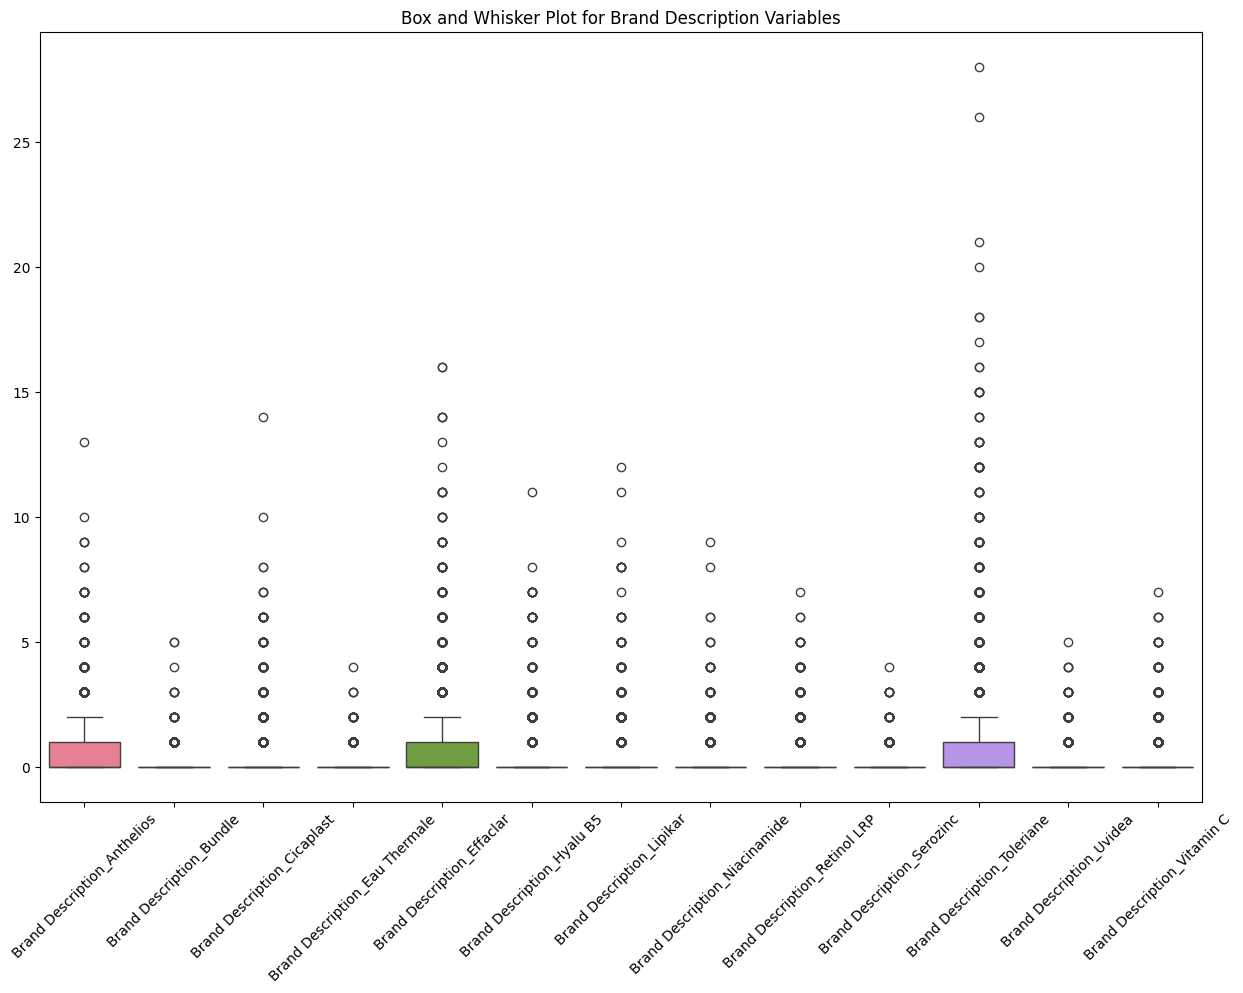

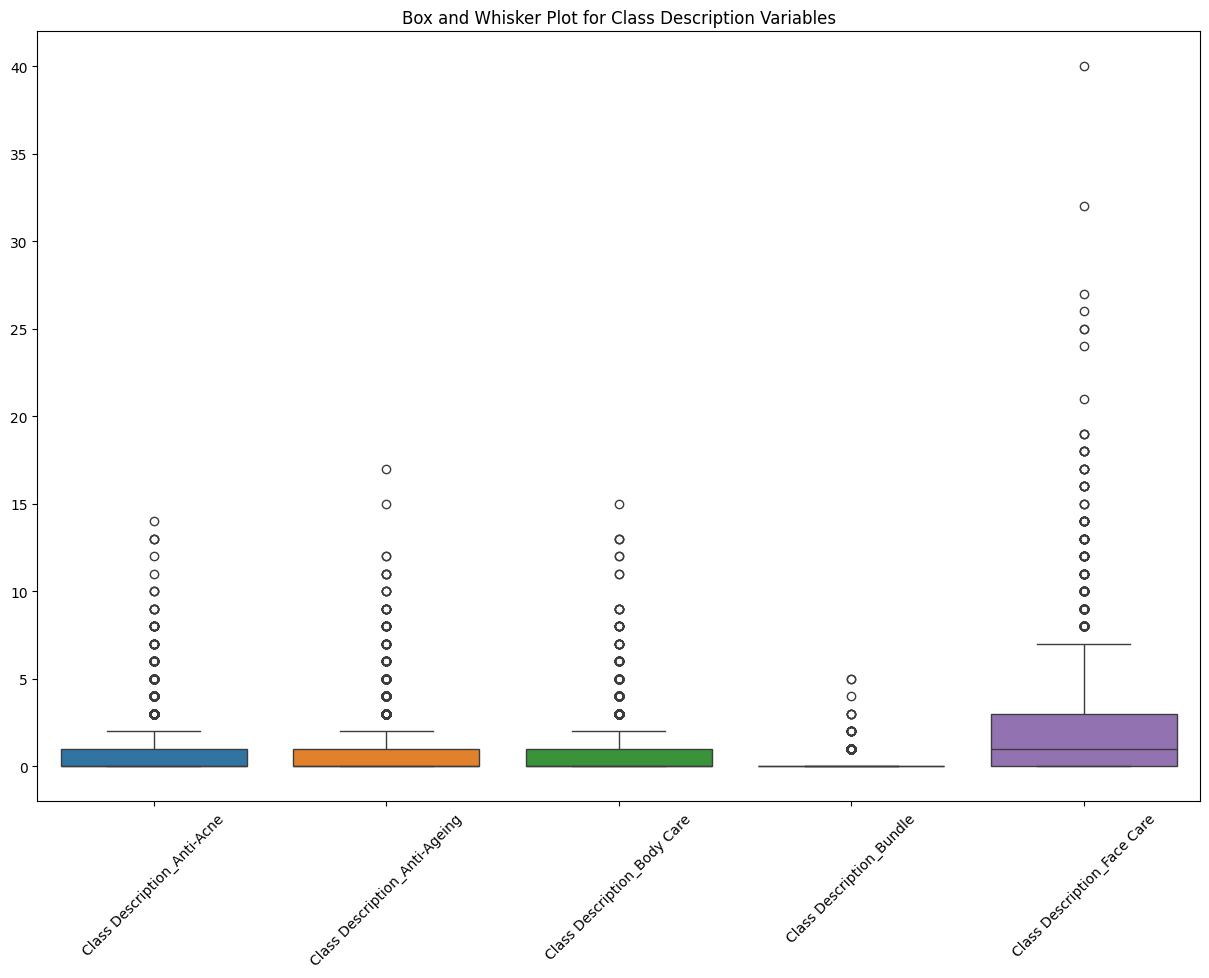

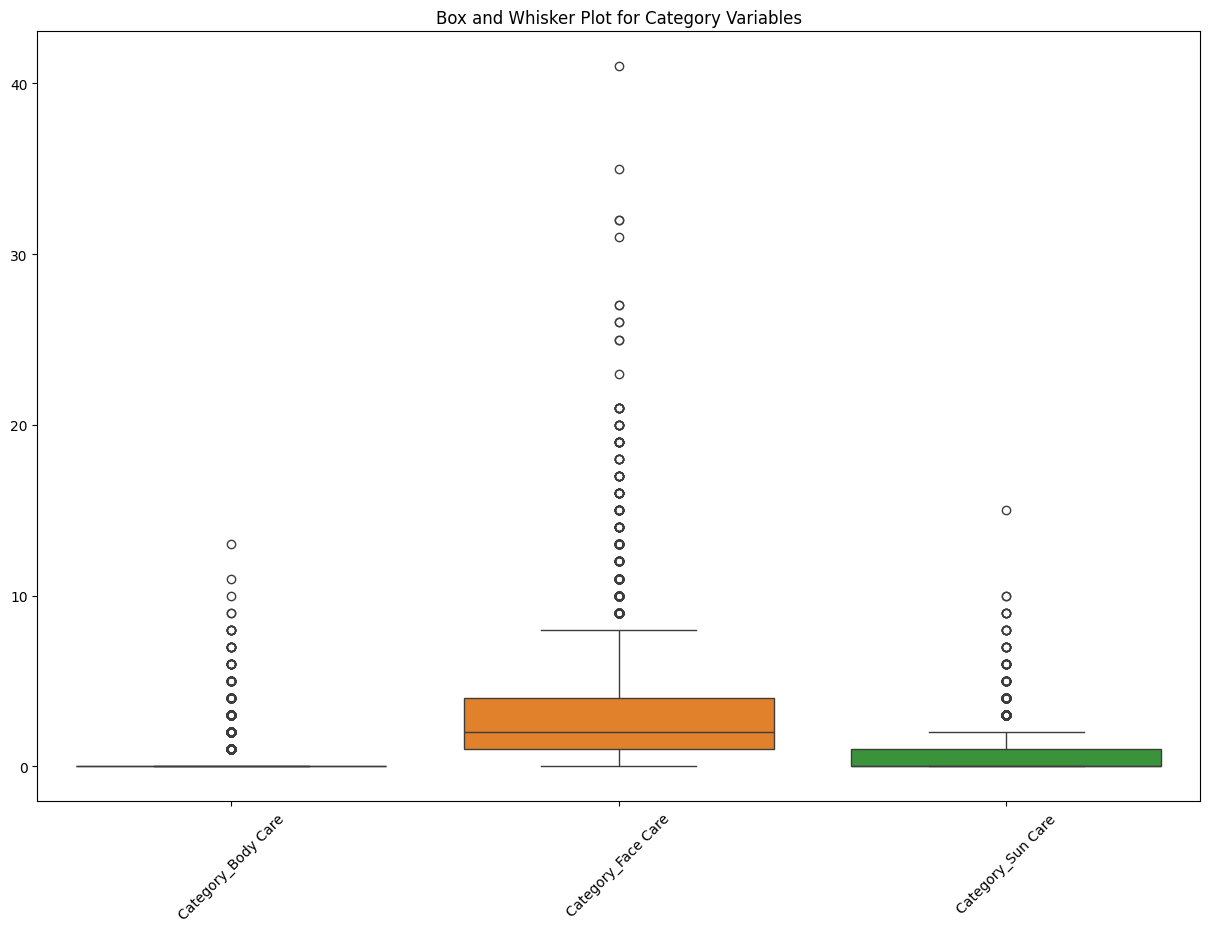

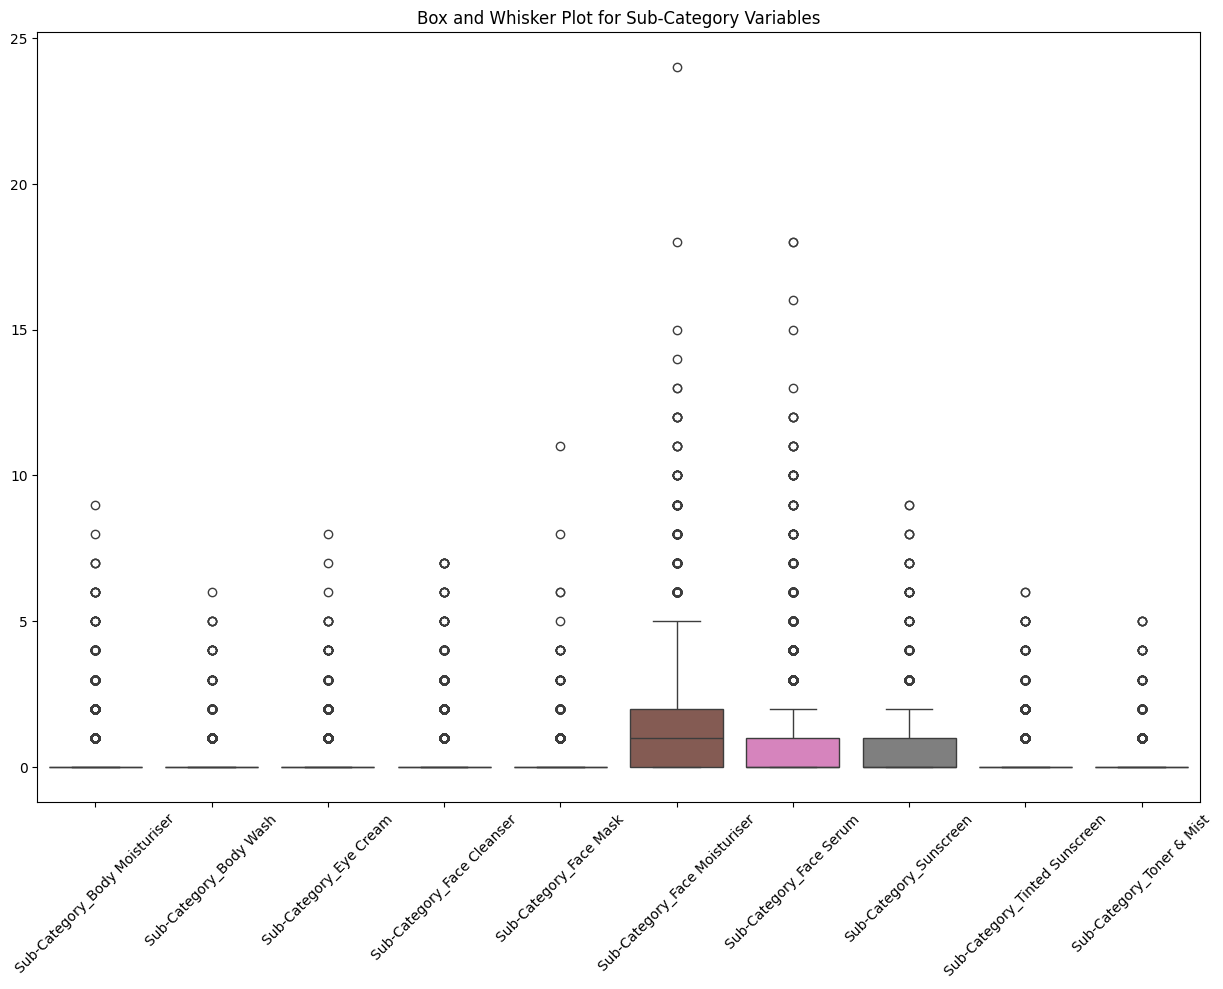

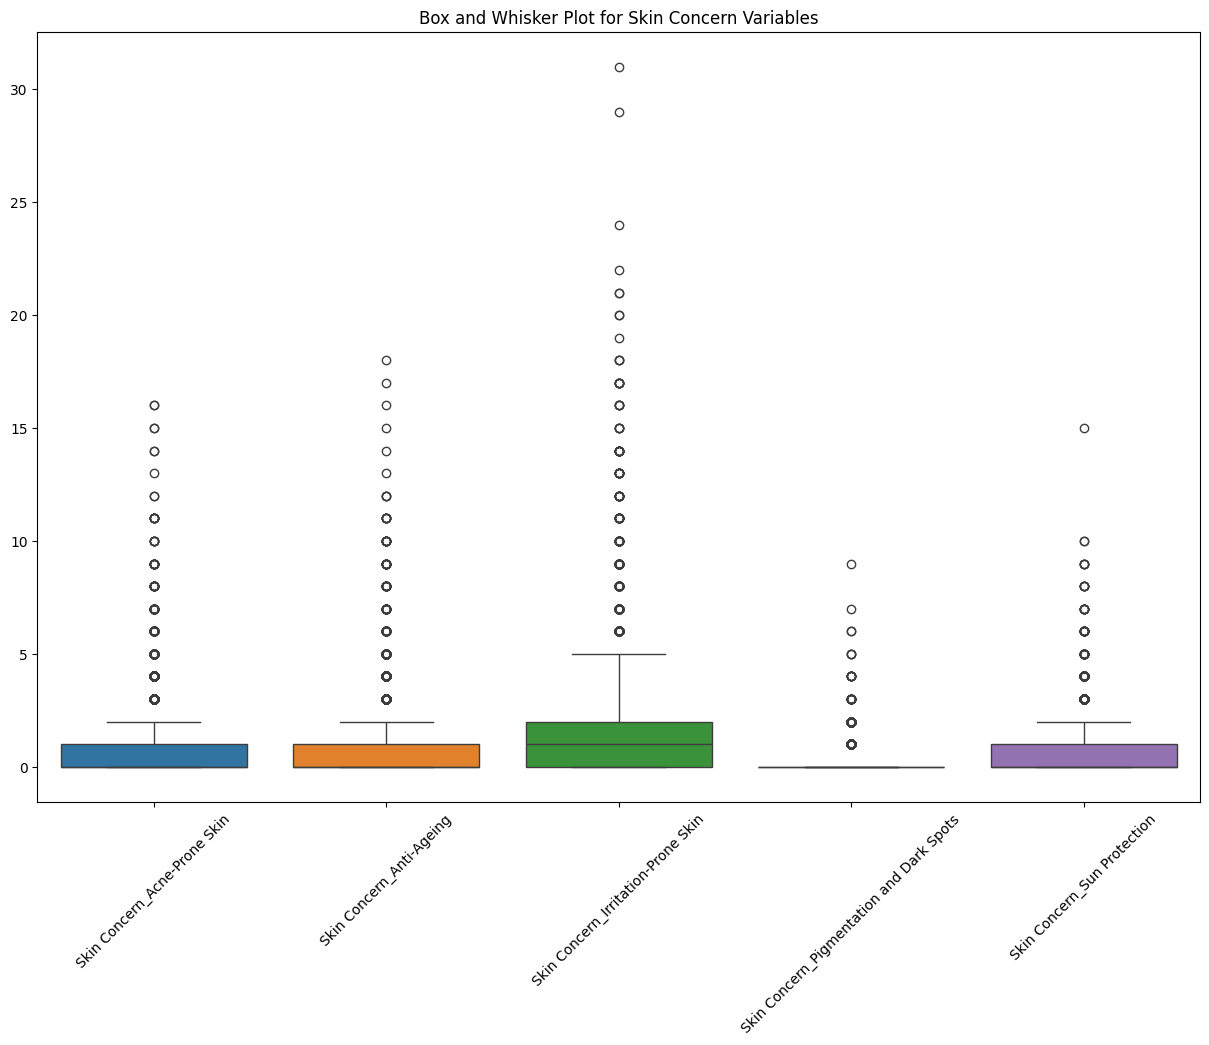

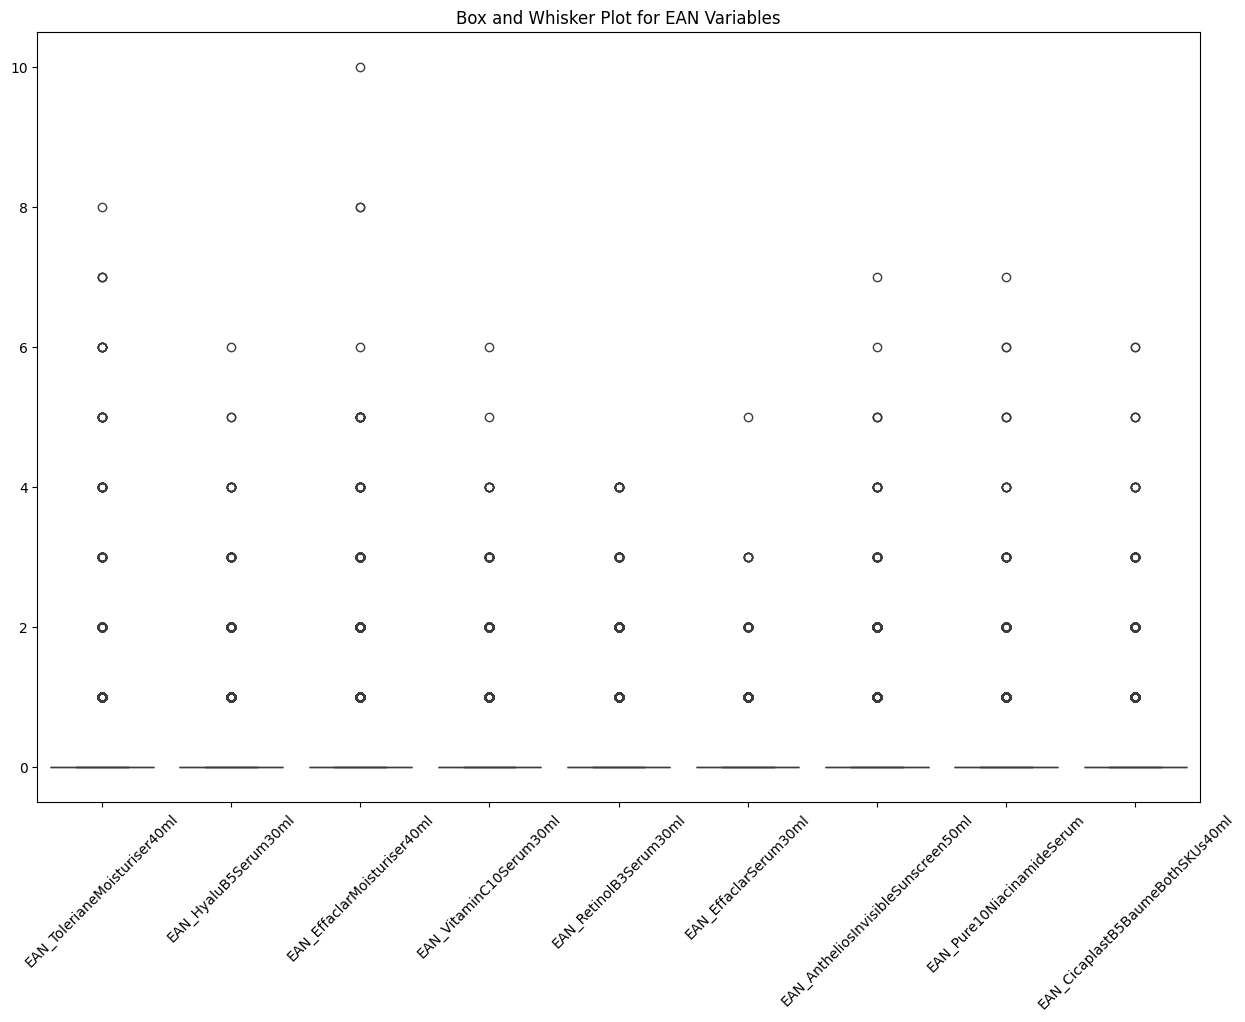

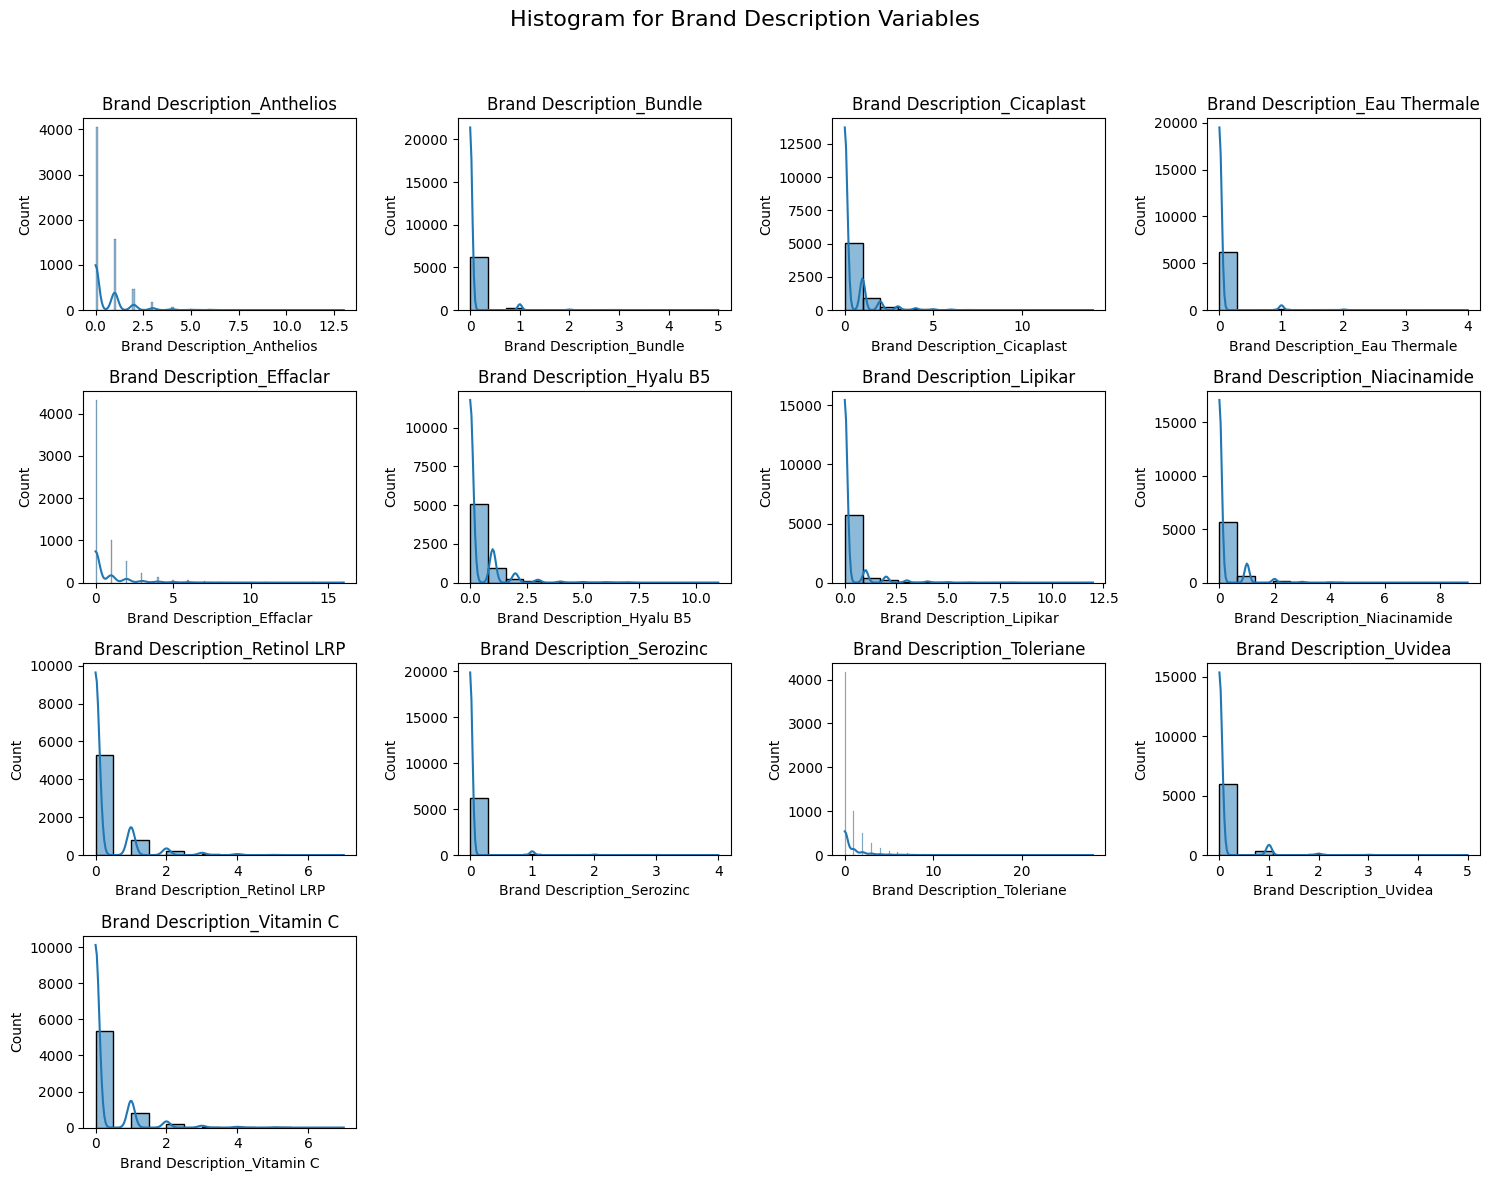

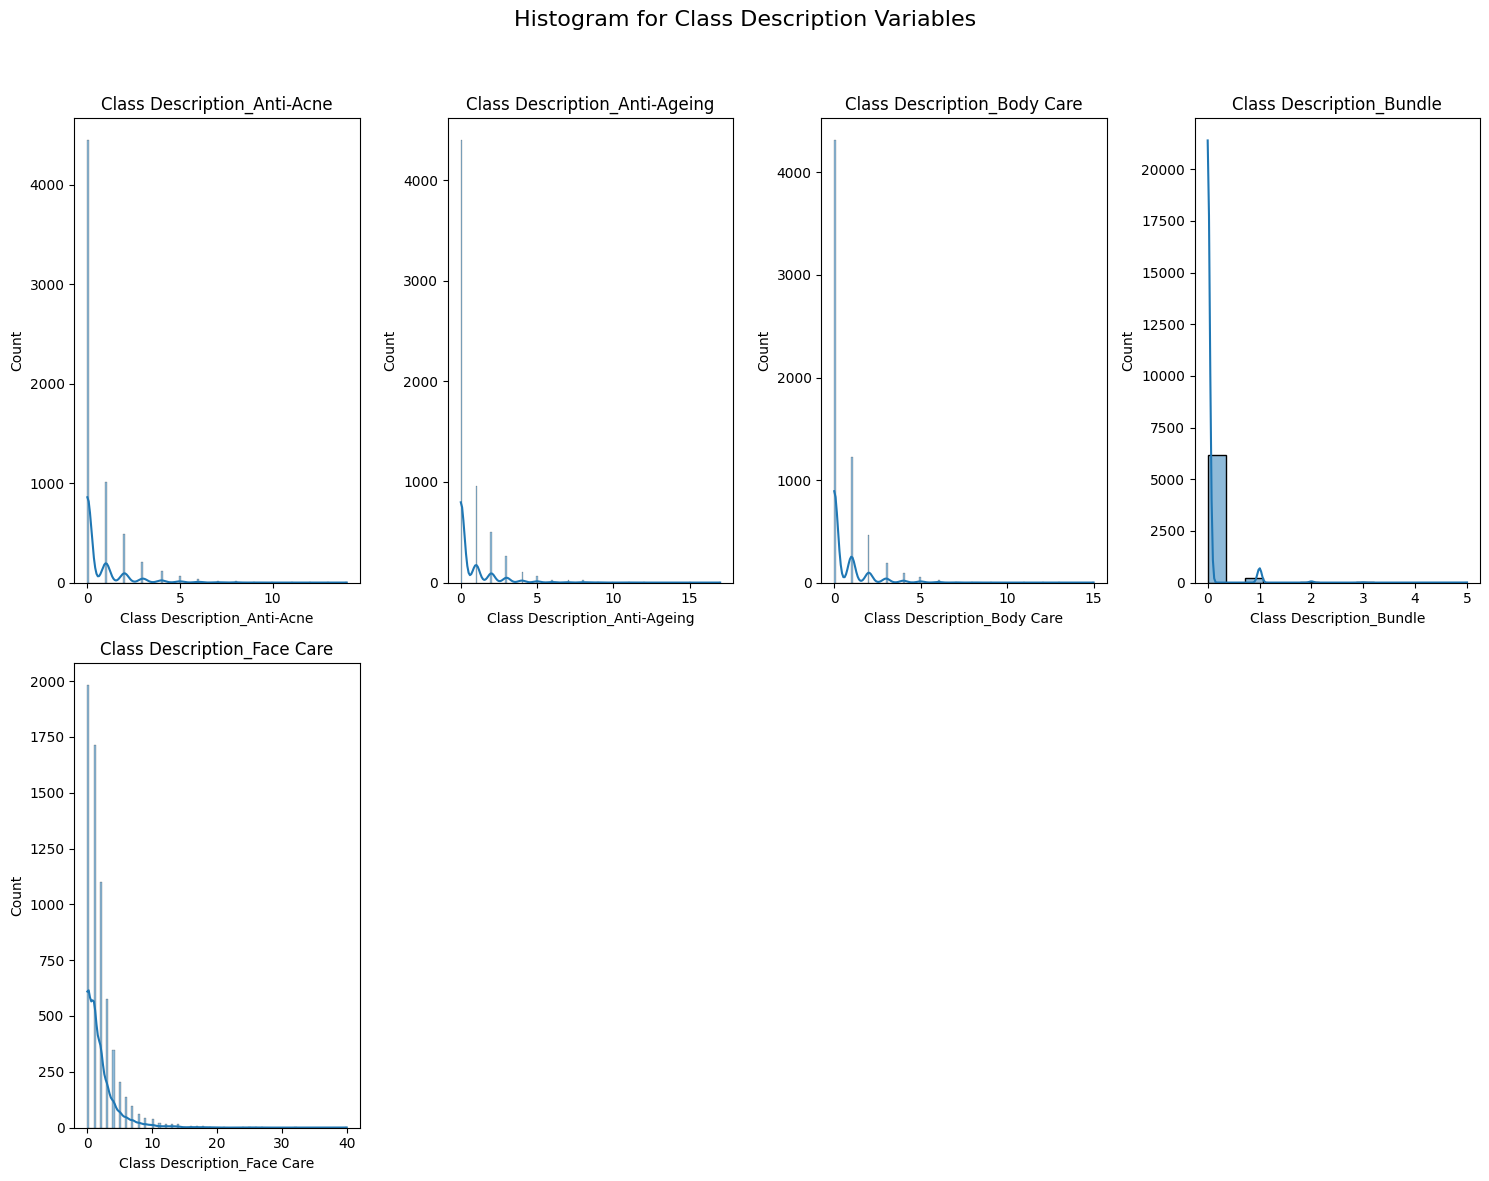

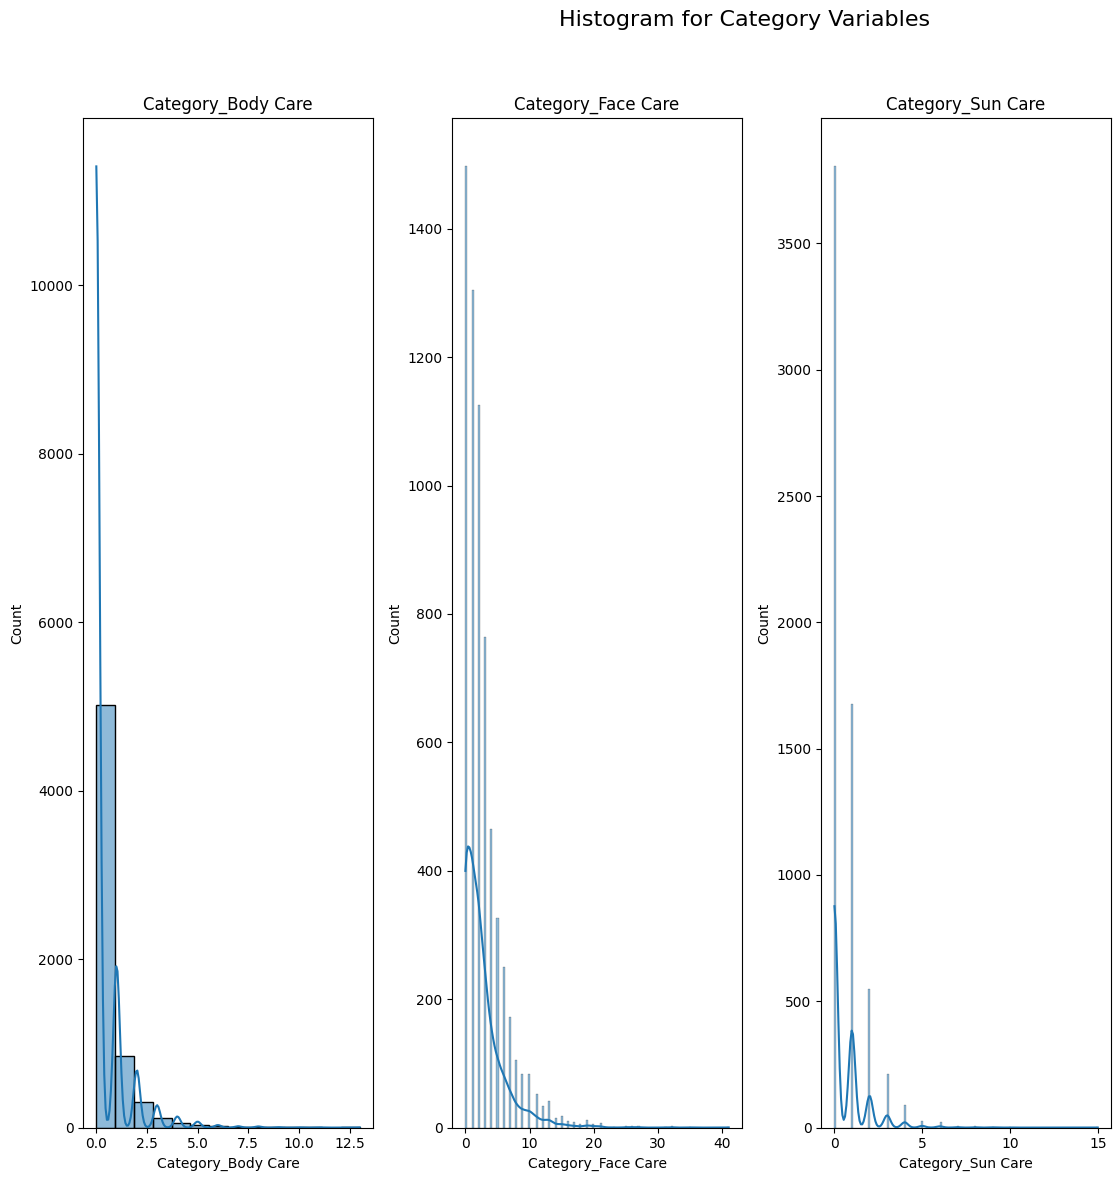

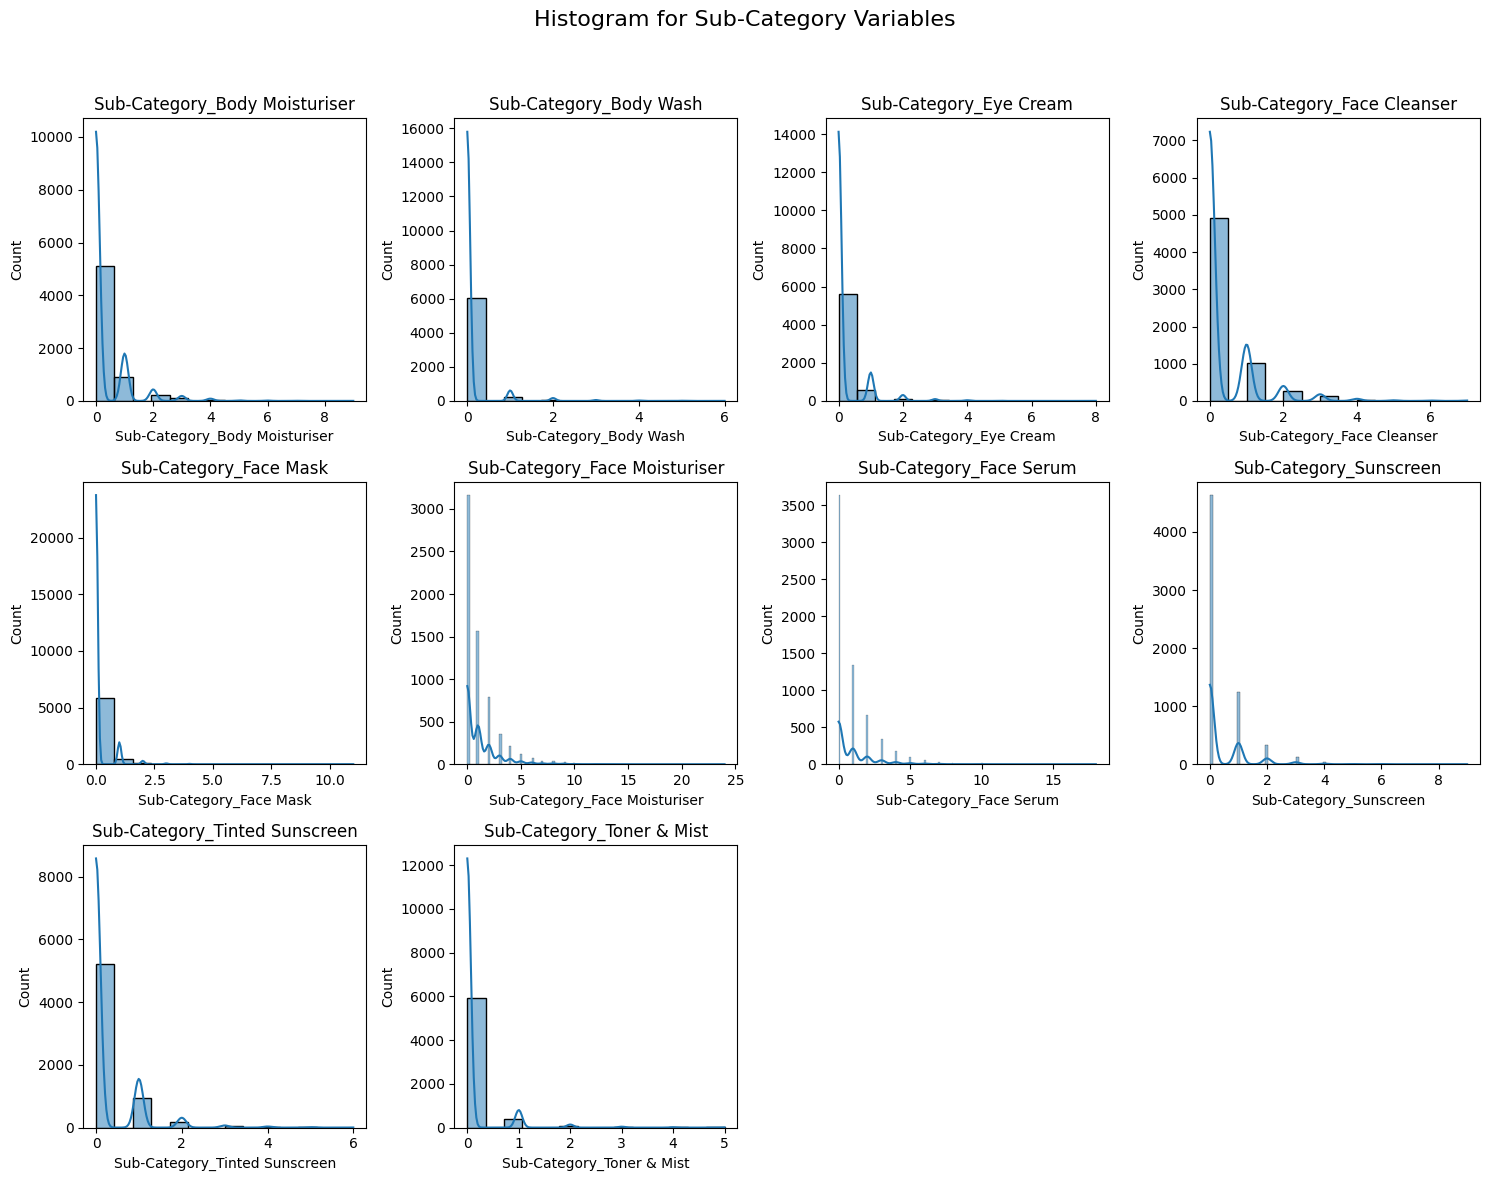

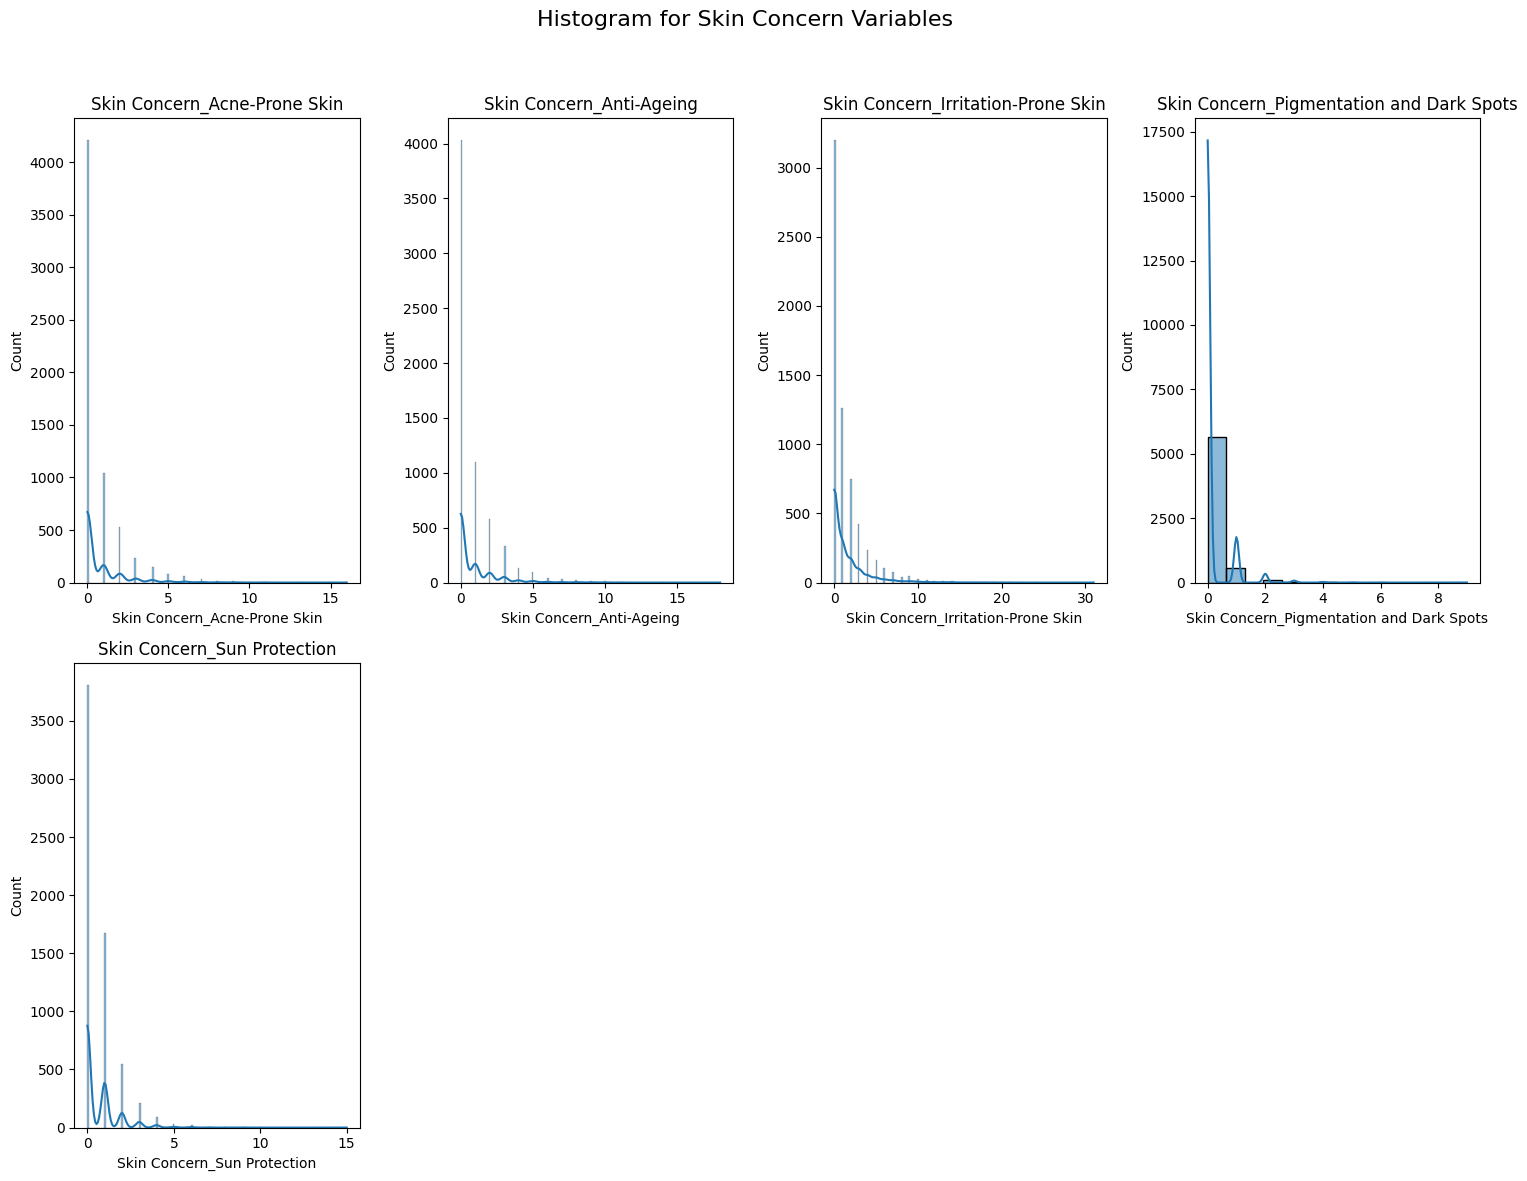

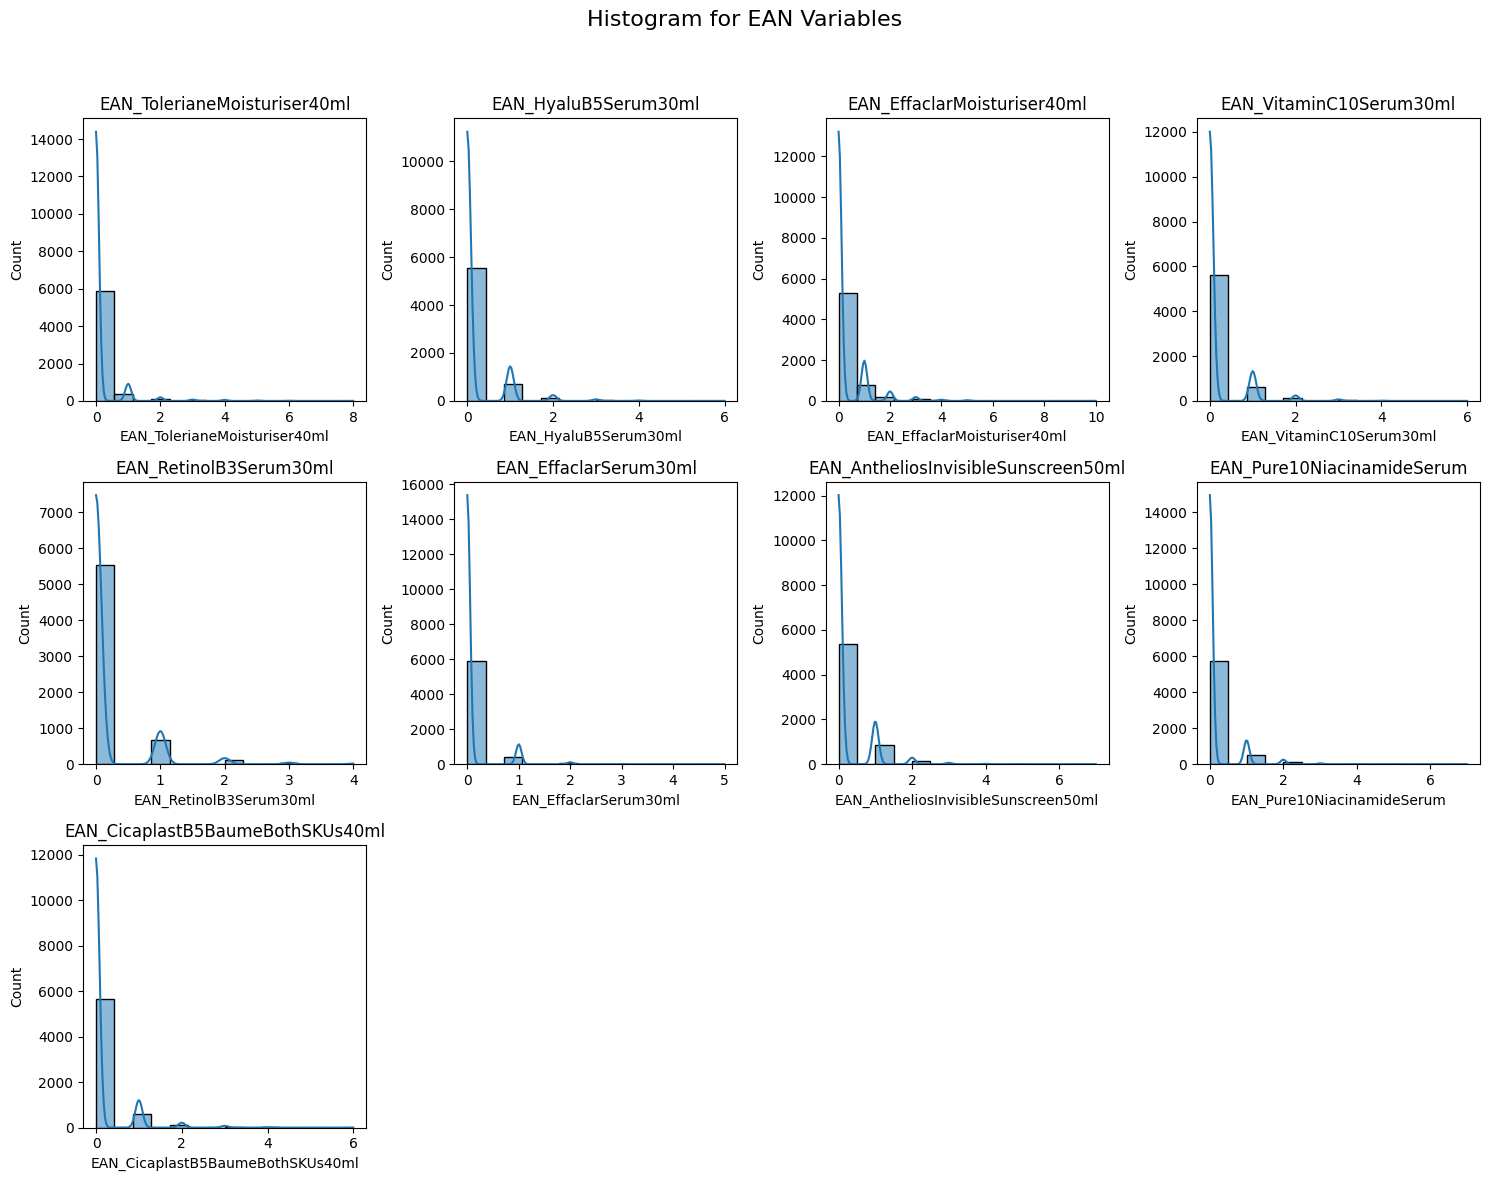

In [13]:
# Grouping variables in numeric_var_product by specific keywords
brand_vars = [col for col in numeric_var_product if 'Brand Description_' in col]
class_vars = [col for col in numeric_var_product if 'Class Description_' in col]
category_vars = [col for col in numeric_var_product if 'Category_' in col and 'Sub-Category_' not in col]
sub_category_vars = [col for col in numeric_var_product if 'Sub-Category_' in col]
skin_concern_vars = [col for col in numeric_var_product if 'Skin Concern_' in col]
ean_vars = [col for col in numeric_var_product if 'EAN_' in col]

# Function to plot box plots for each group of variables
def plot_boxplot(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=data[variable_list])
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()
    else:
        print(f"No variables found for {title}")

# Function to plot histograms for each group of variables
def plot_histogram(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 12))
        plt.suptitle(title, fontsize=16)
        num_plots = len(variable_list)
        for i, col in enumerate(variable_list):
            plt.subplot((num_plots // 4) + 1, 4, i + 1)  # Adjust rows and columns to fit plots
            sns.histplot(data[col], kde=True)
            plt.title(col)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"No variables found for {title}")

# Plotting box plots for each group
plot_boxplot(brand_vars, 'Box and Whisker Plot for Brand Description Variables')
plot_boxplot(class_vars, 'Box and Whisker Plot for Class Description Variables')
plot_boxplot(category_vars, 'Box and Whisker Plot for Category Variables')
plot_boxplot(sub_category_vars, 'Box and Whisker Plot for Sub-Category Variables')
plot_boxplot(skin_concern_vars, 'Box and Whisker Plot for Skin Concern Variables')
plot_boxplot(ean_vars, 'Box and Whisker Plot for EAN Variables')

# Plotting histograms for each group
plot_histogram(brand_vars, 'Histogram for Brand Description Variables')
plot_histogram(class_vars, 'Histogram for Class Description Variables')
plot_histogram(category_vars, 'Histogram for Category Variables')
plot_histogram(sub_category_vars, 'Histogram for Sub-Category Variables')
plot_histogram(skin_concern_vars, 'Histogram for Skin Concern Variables')
plot_histogram(ean_vars, 'Histogram for EAN Variables')


#### Boxplots & Histograms of log-transformed brand/product variables

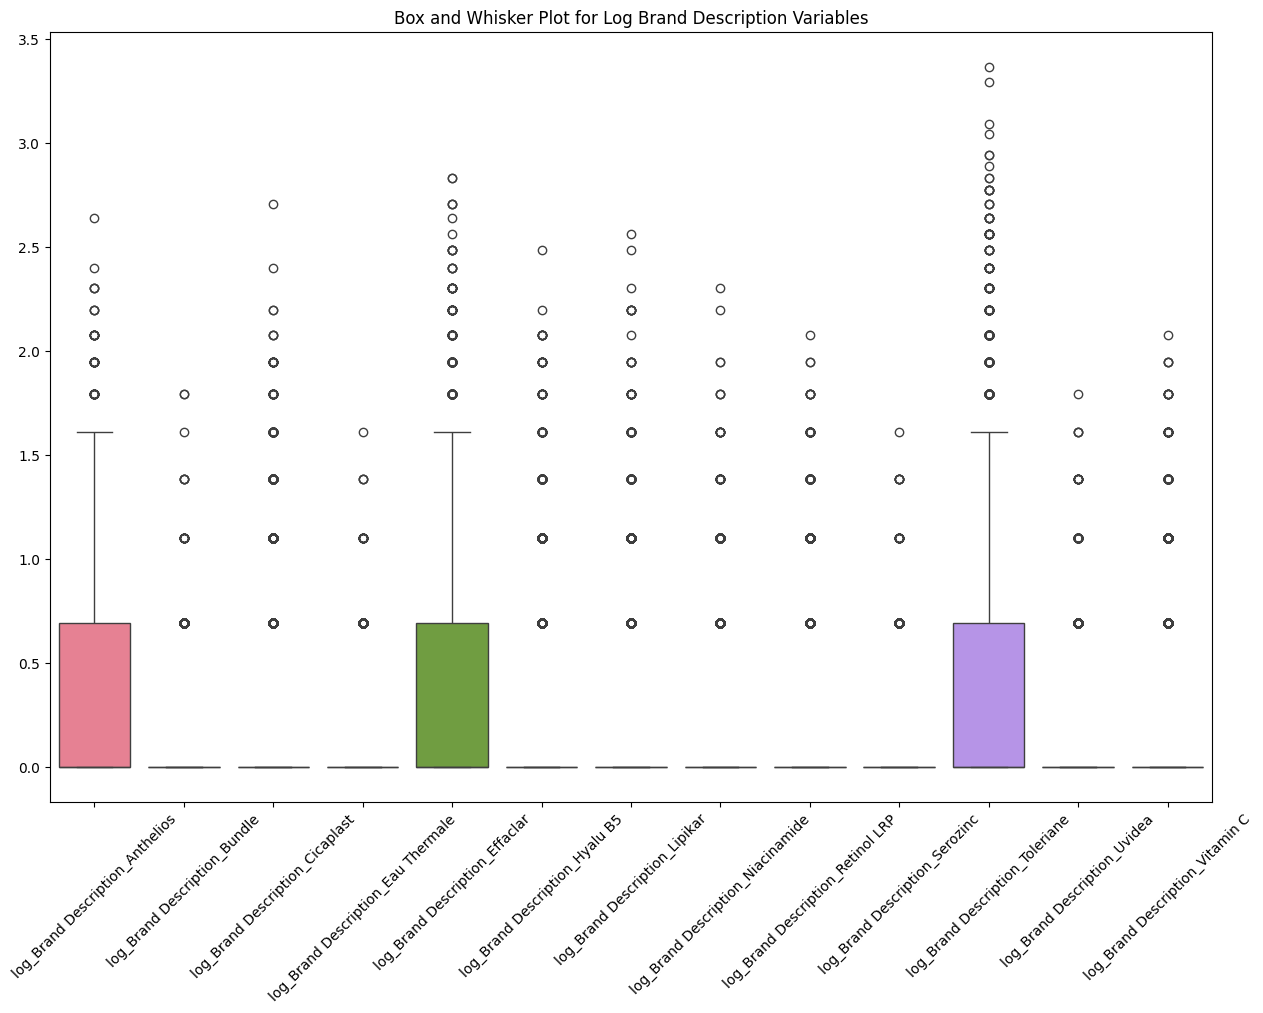

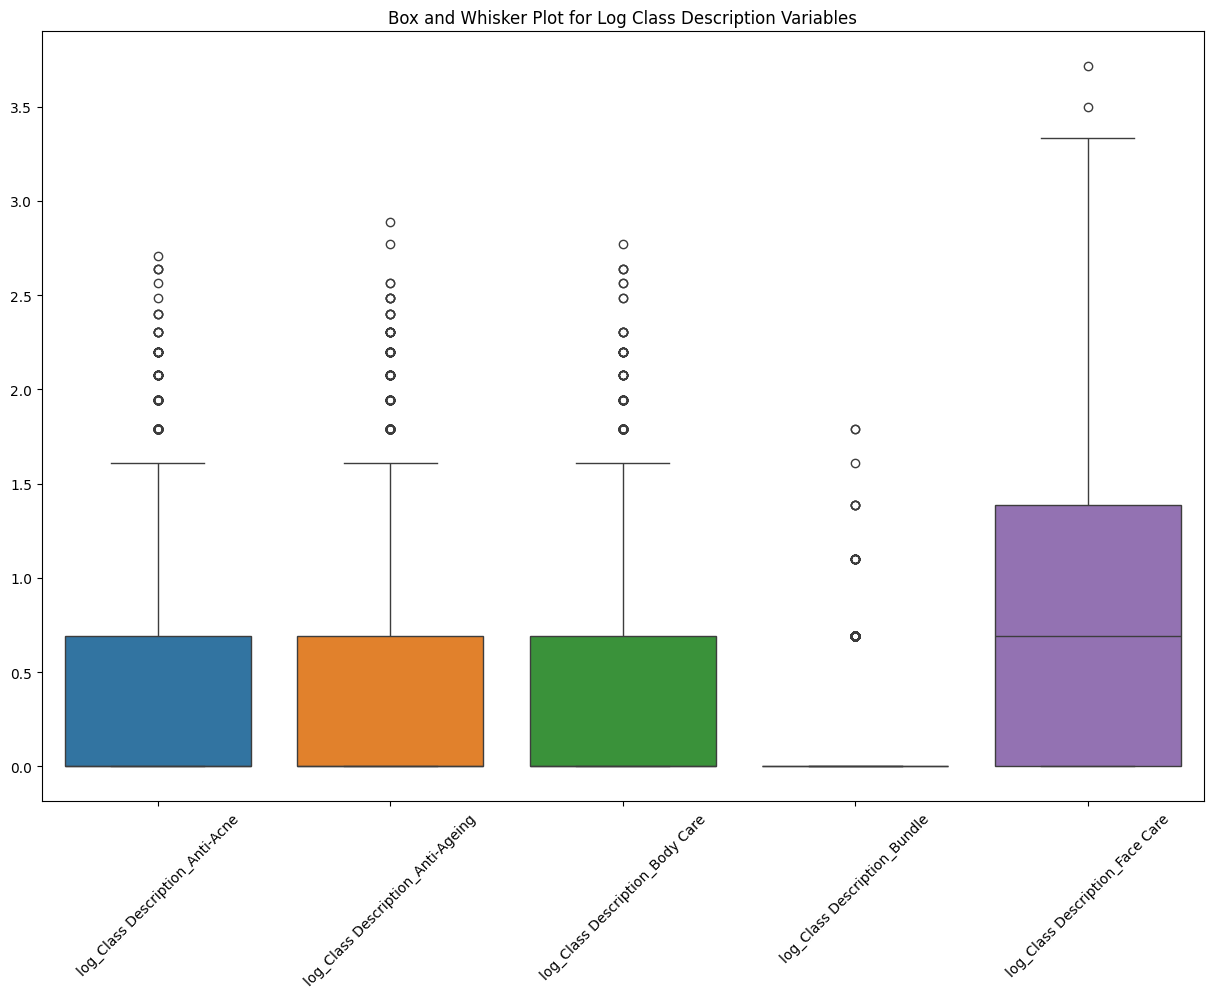

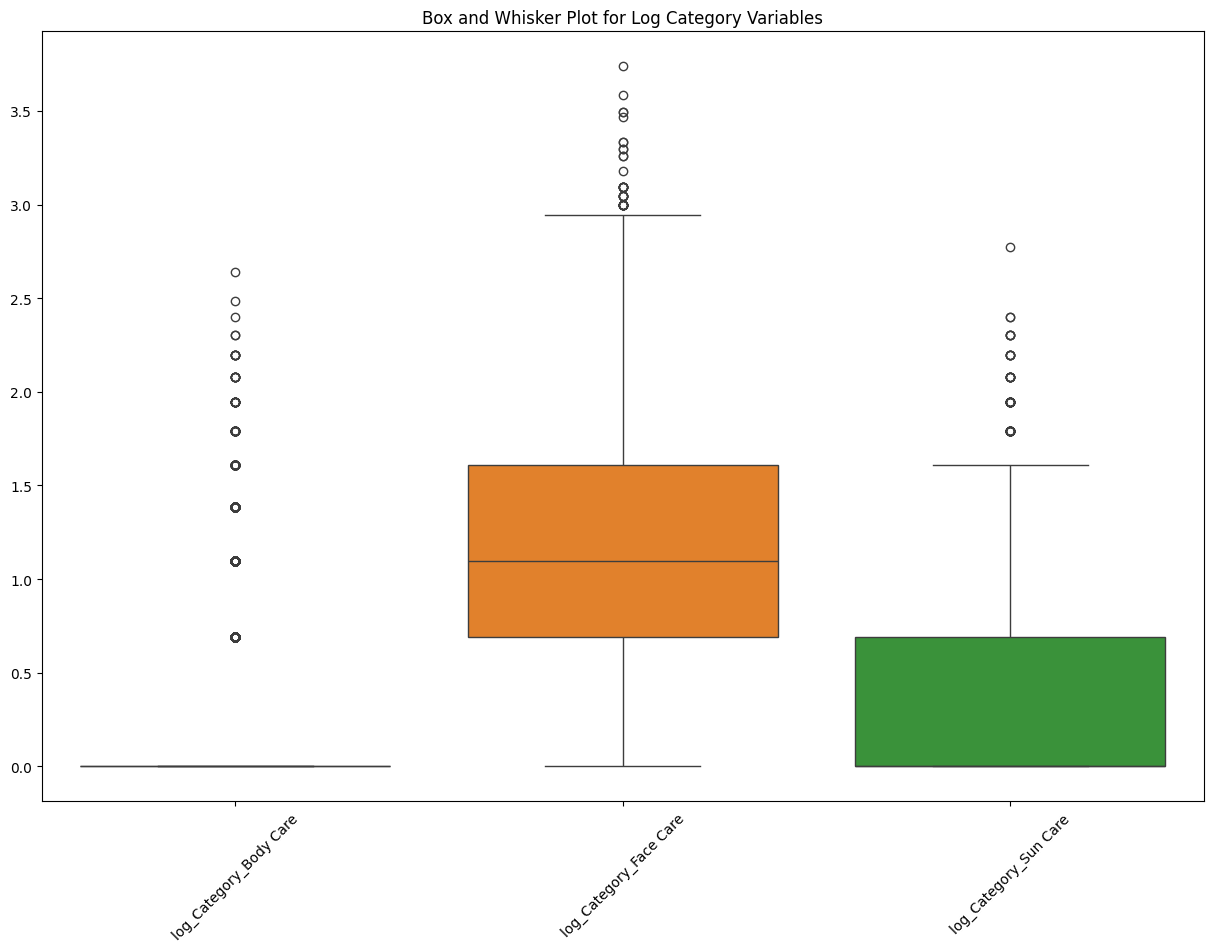

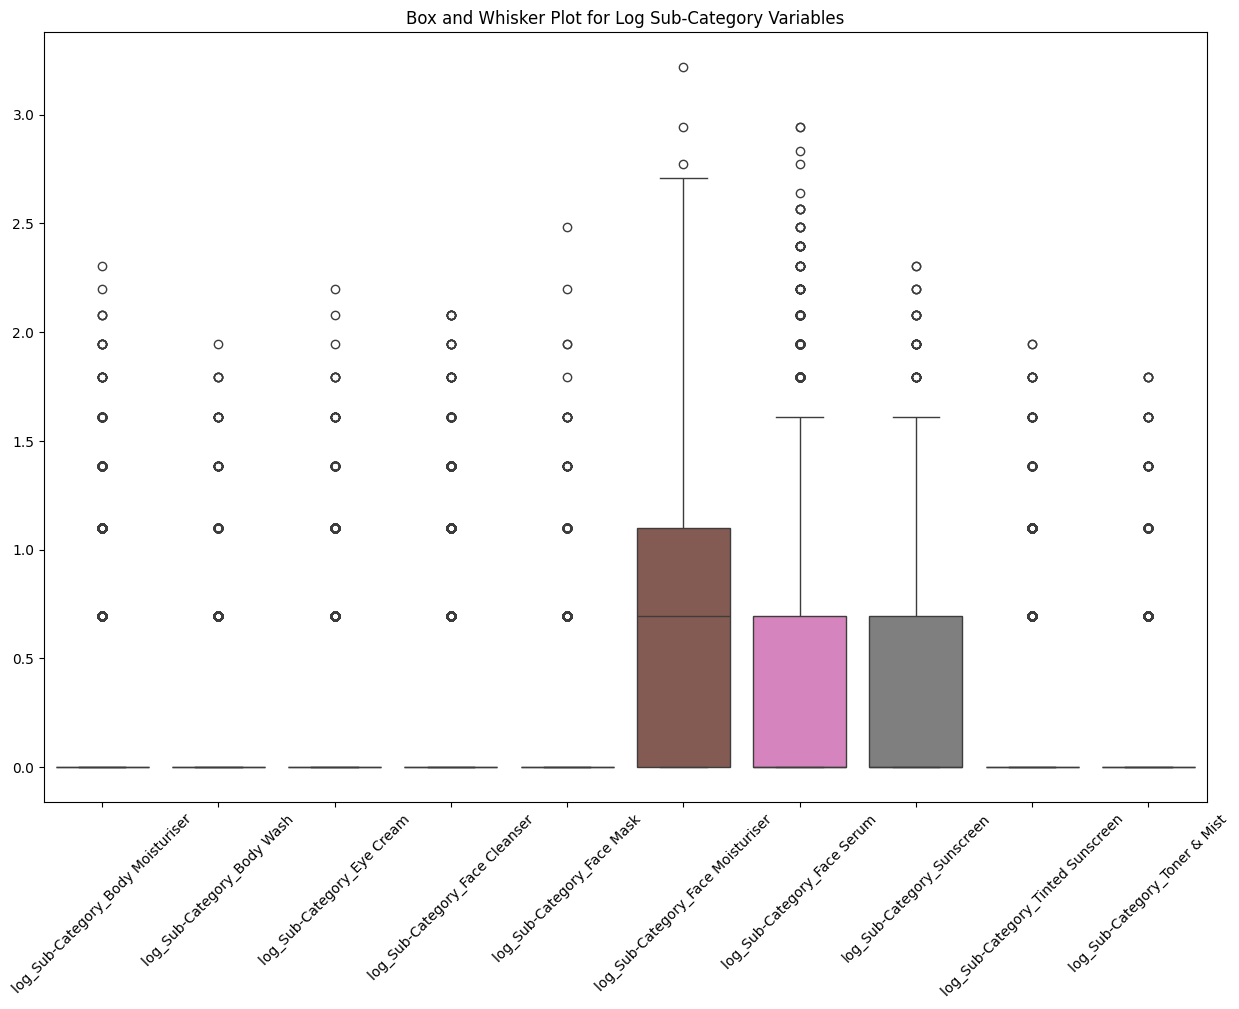

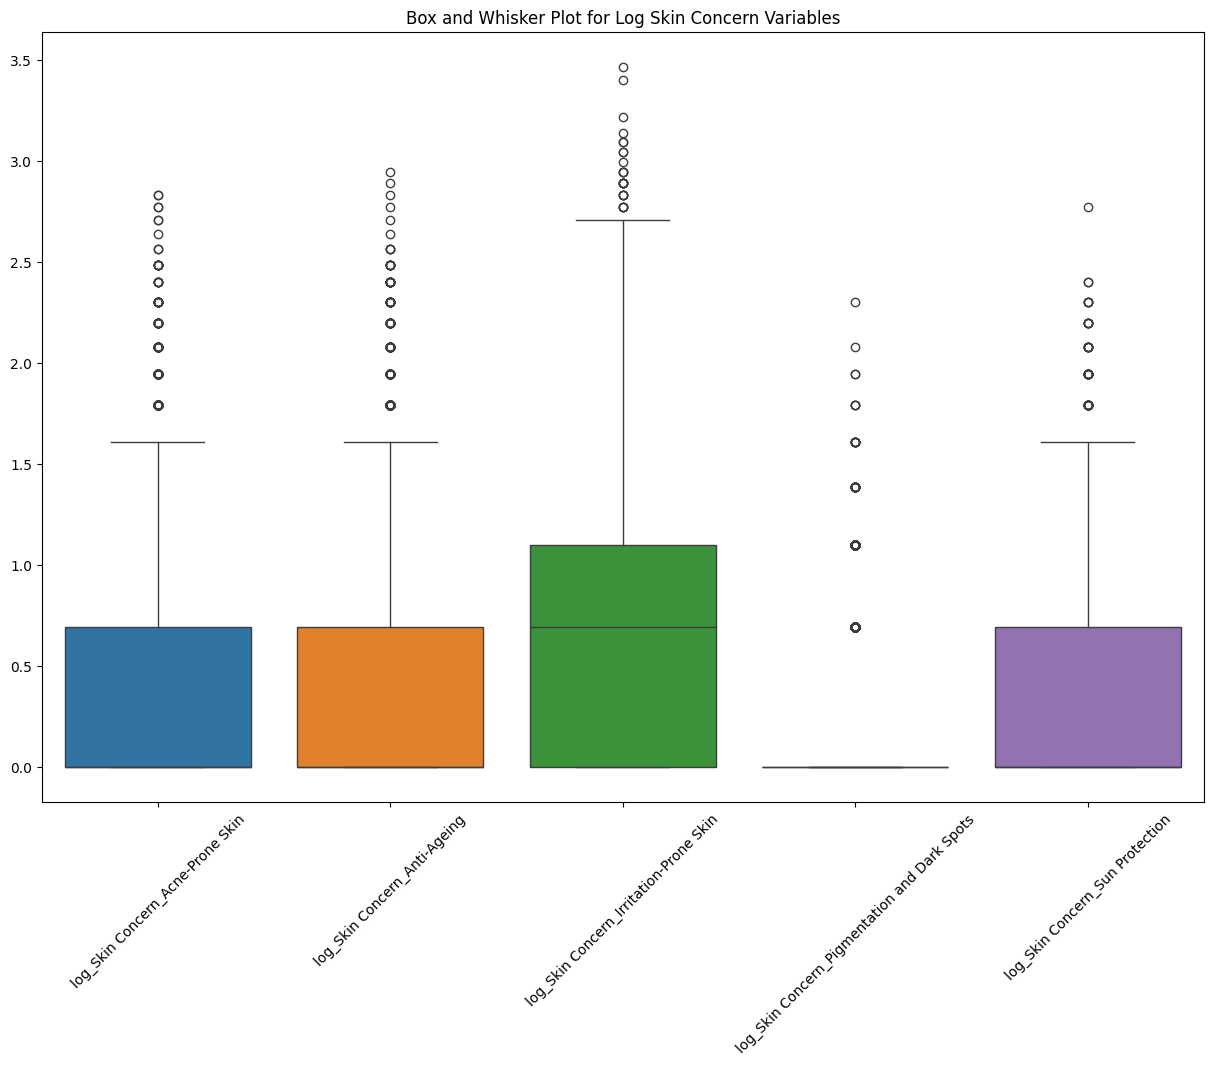

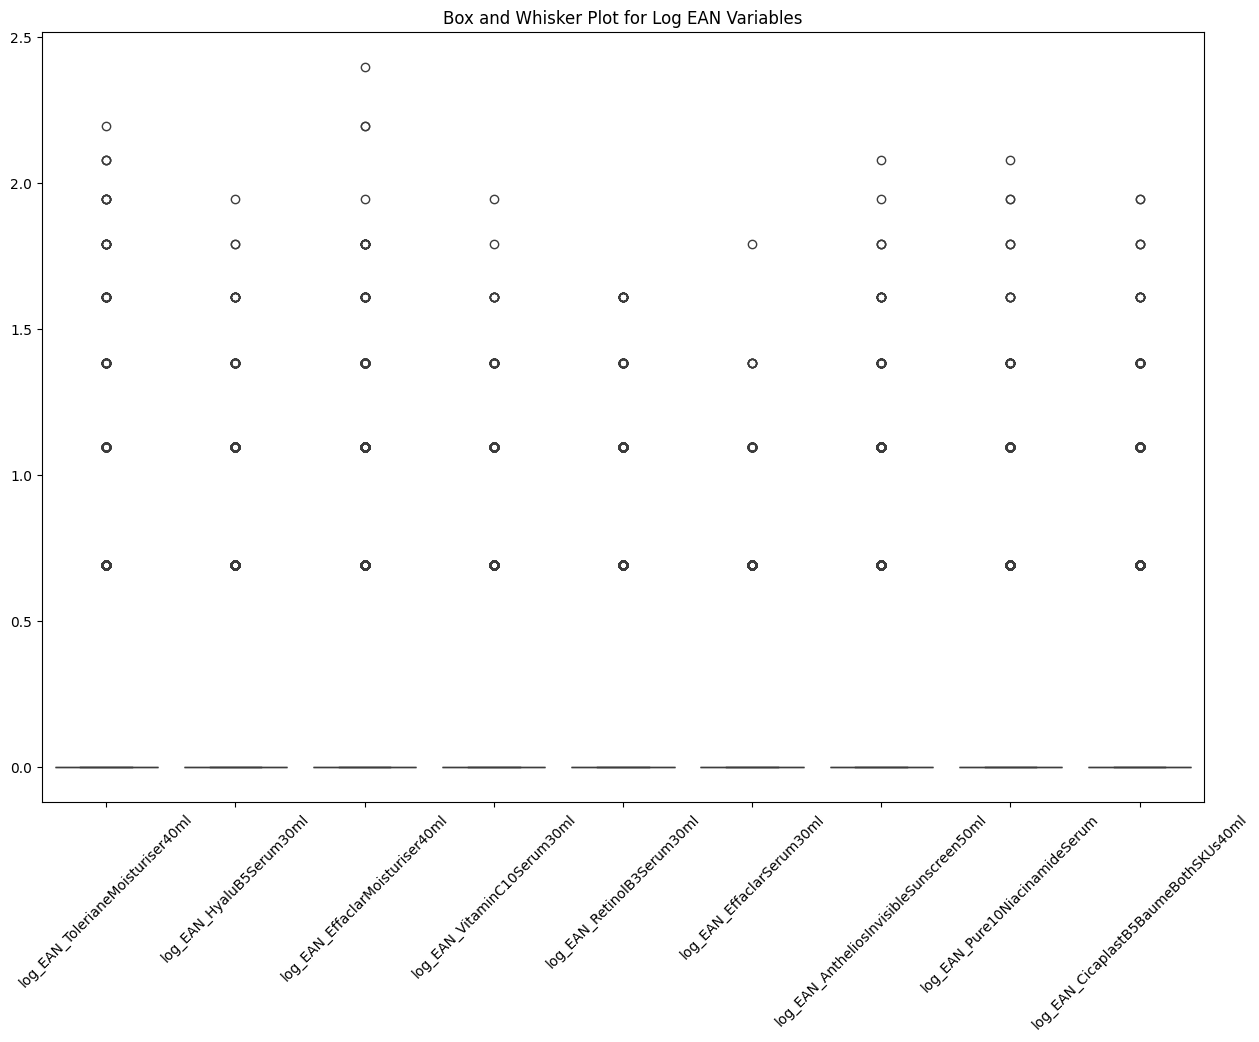

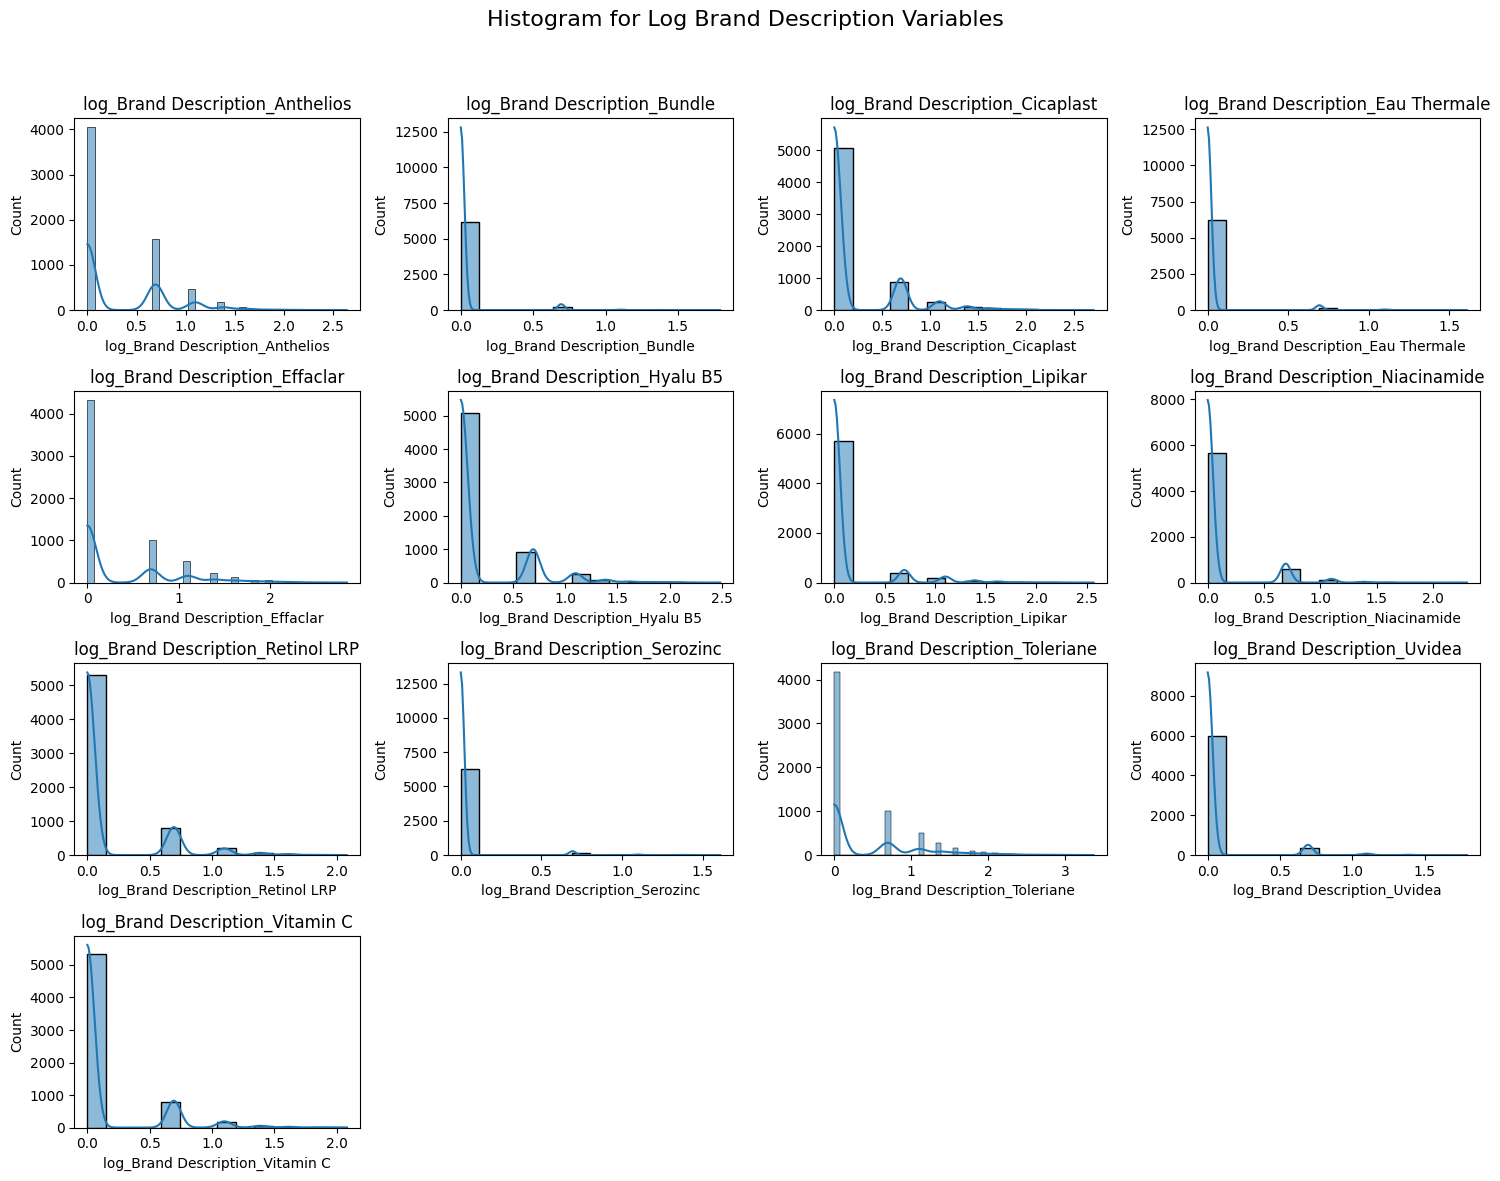

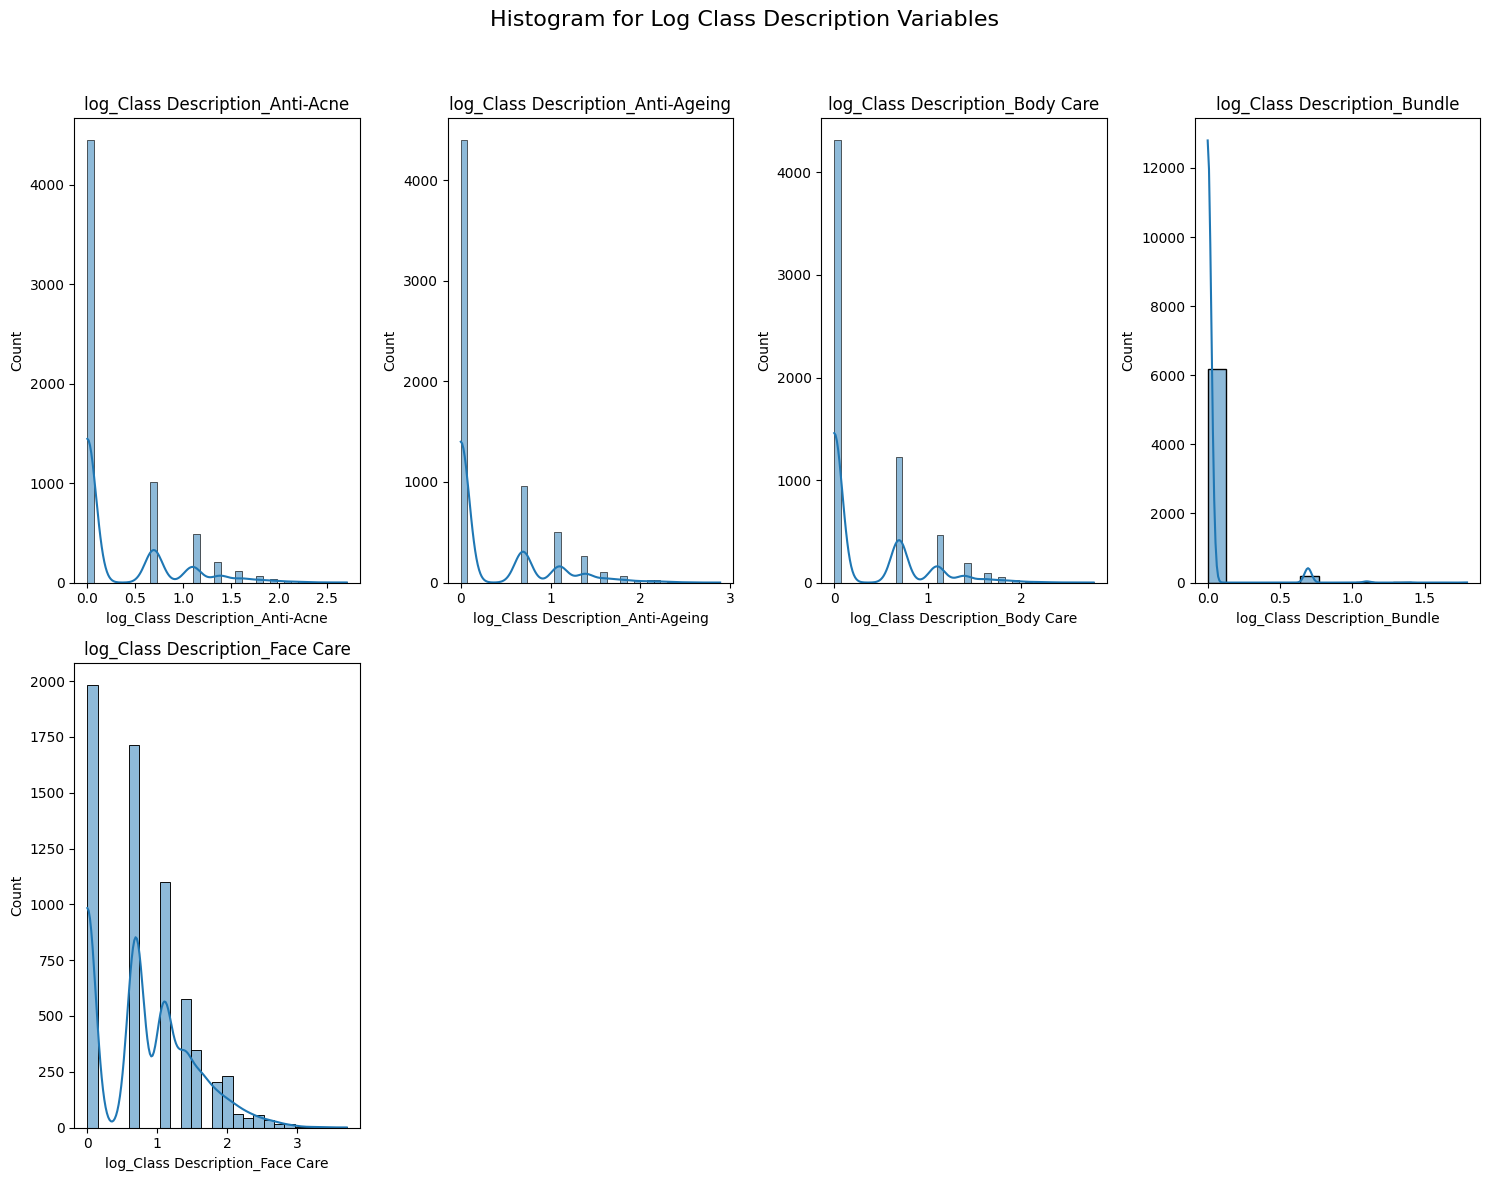

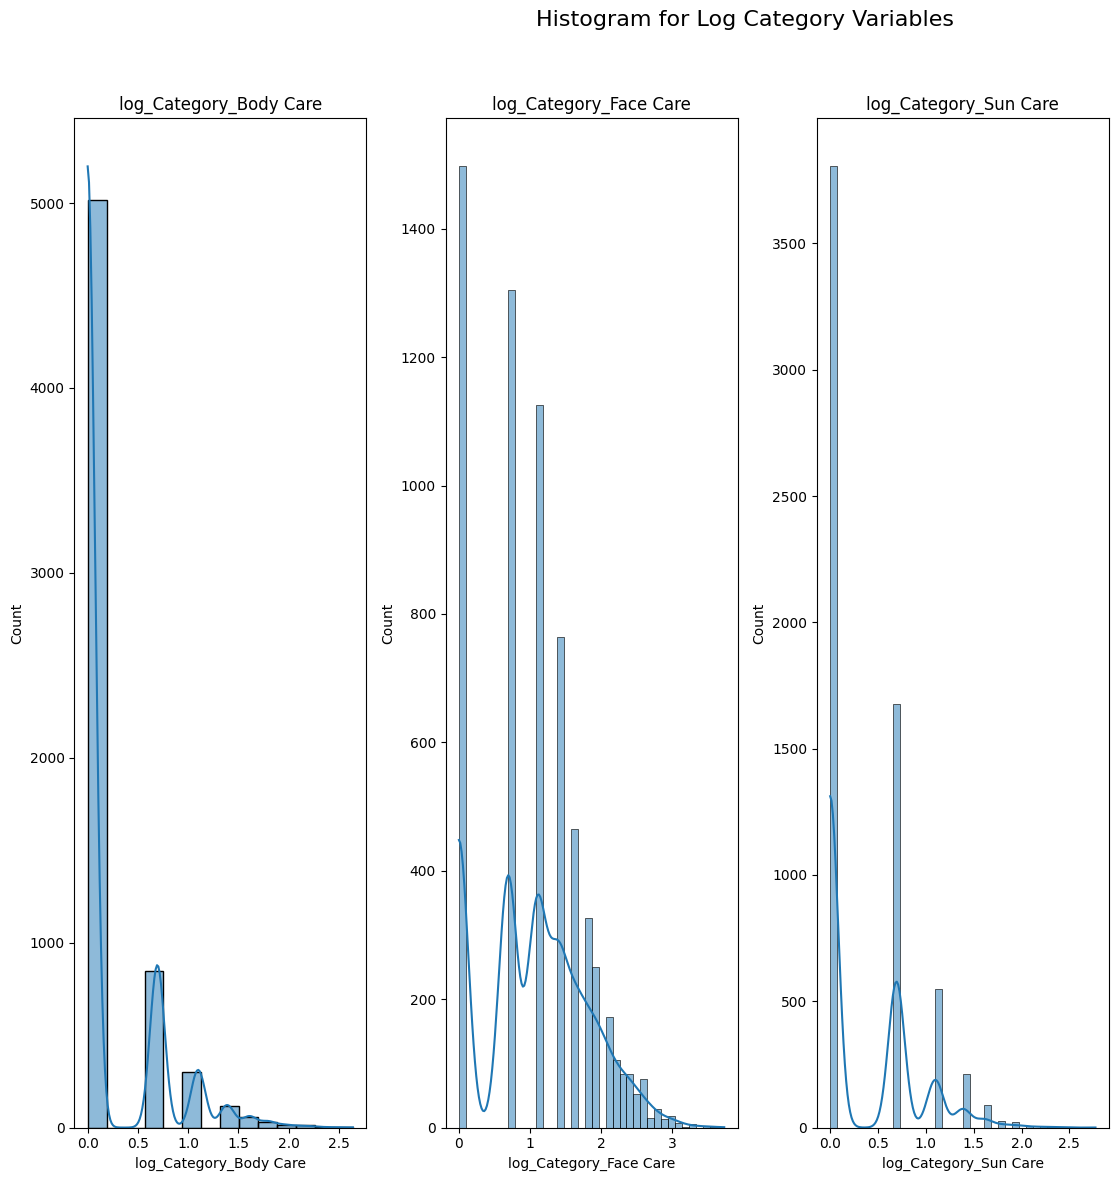

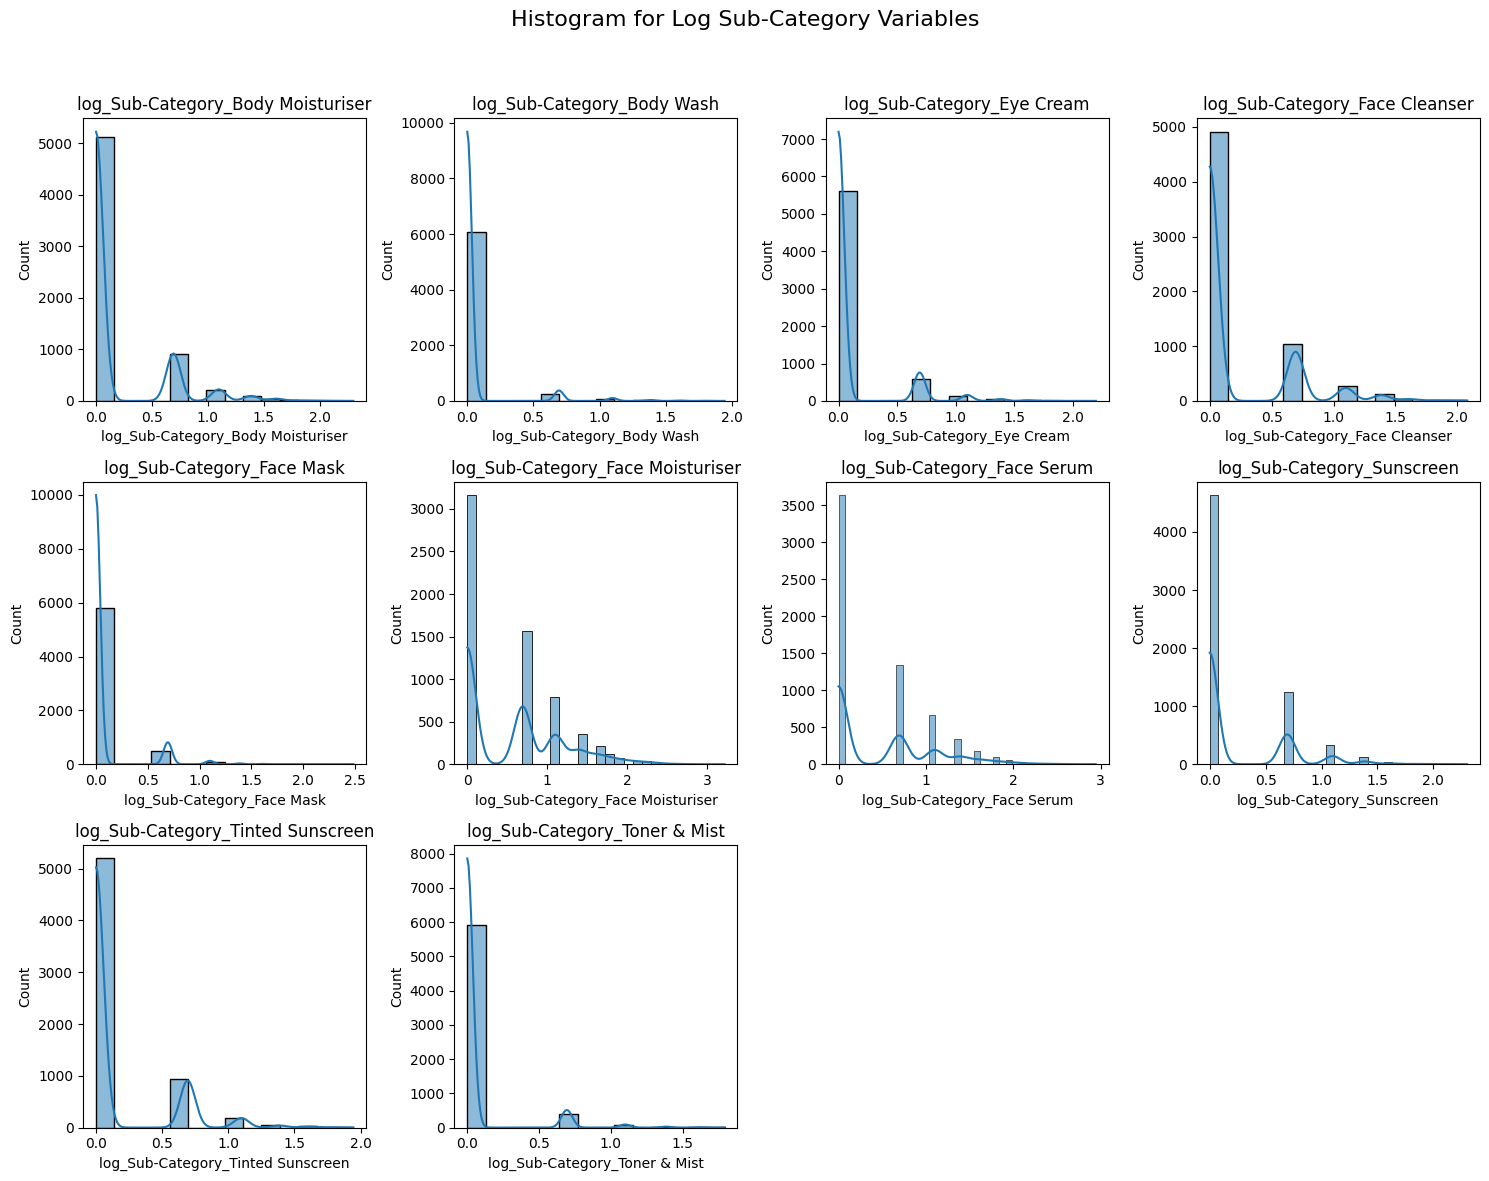

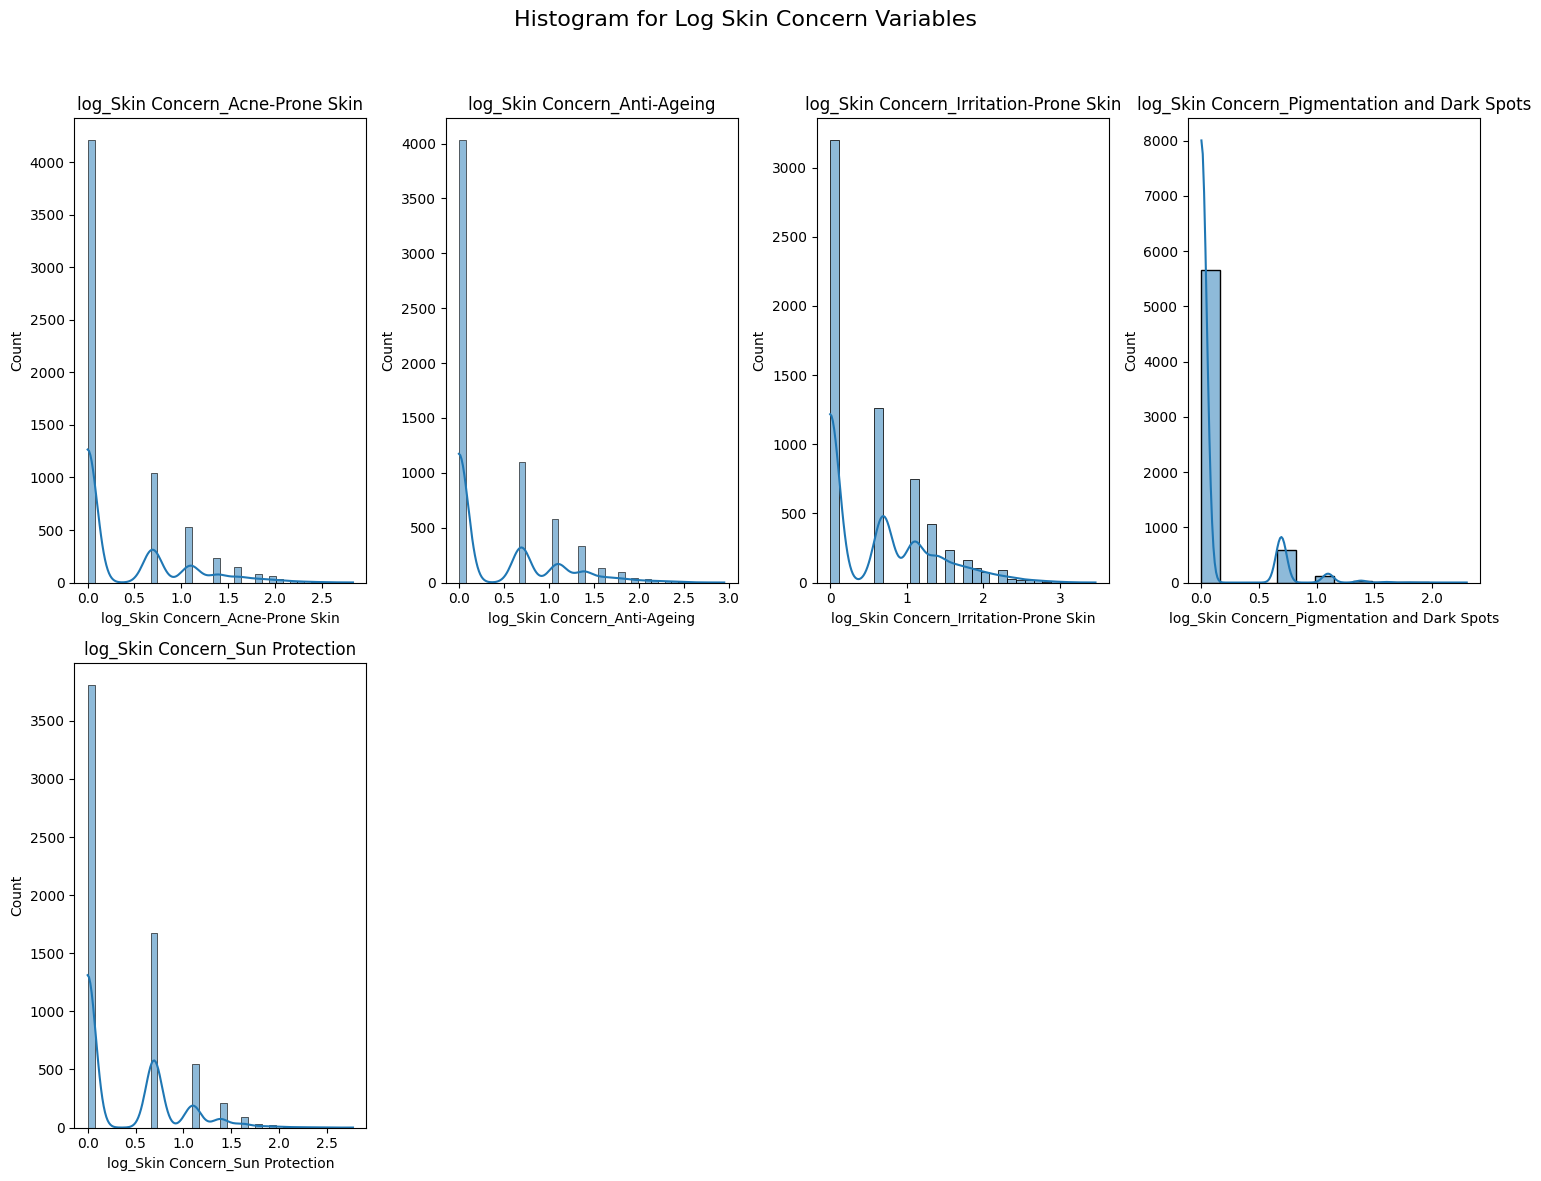

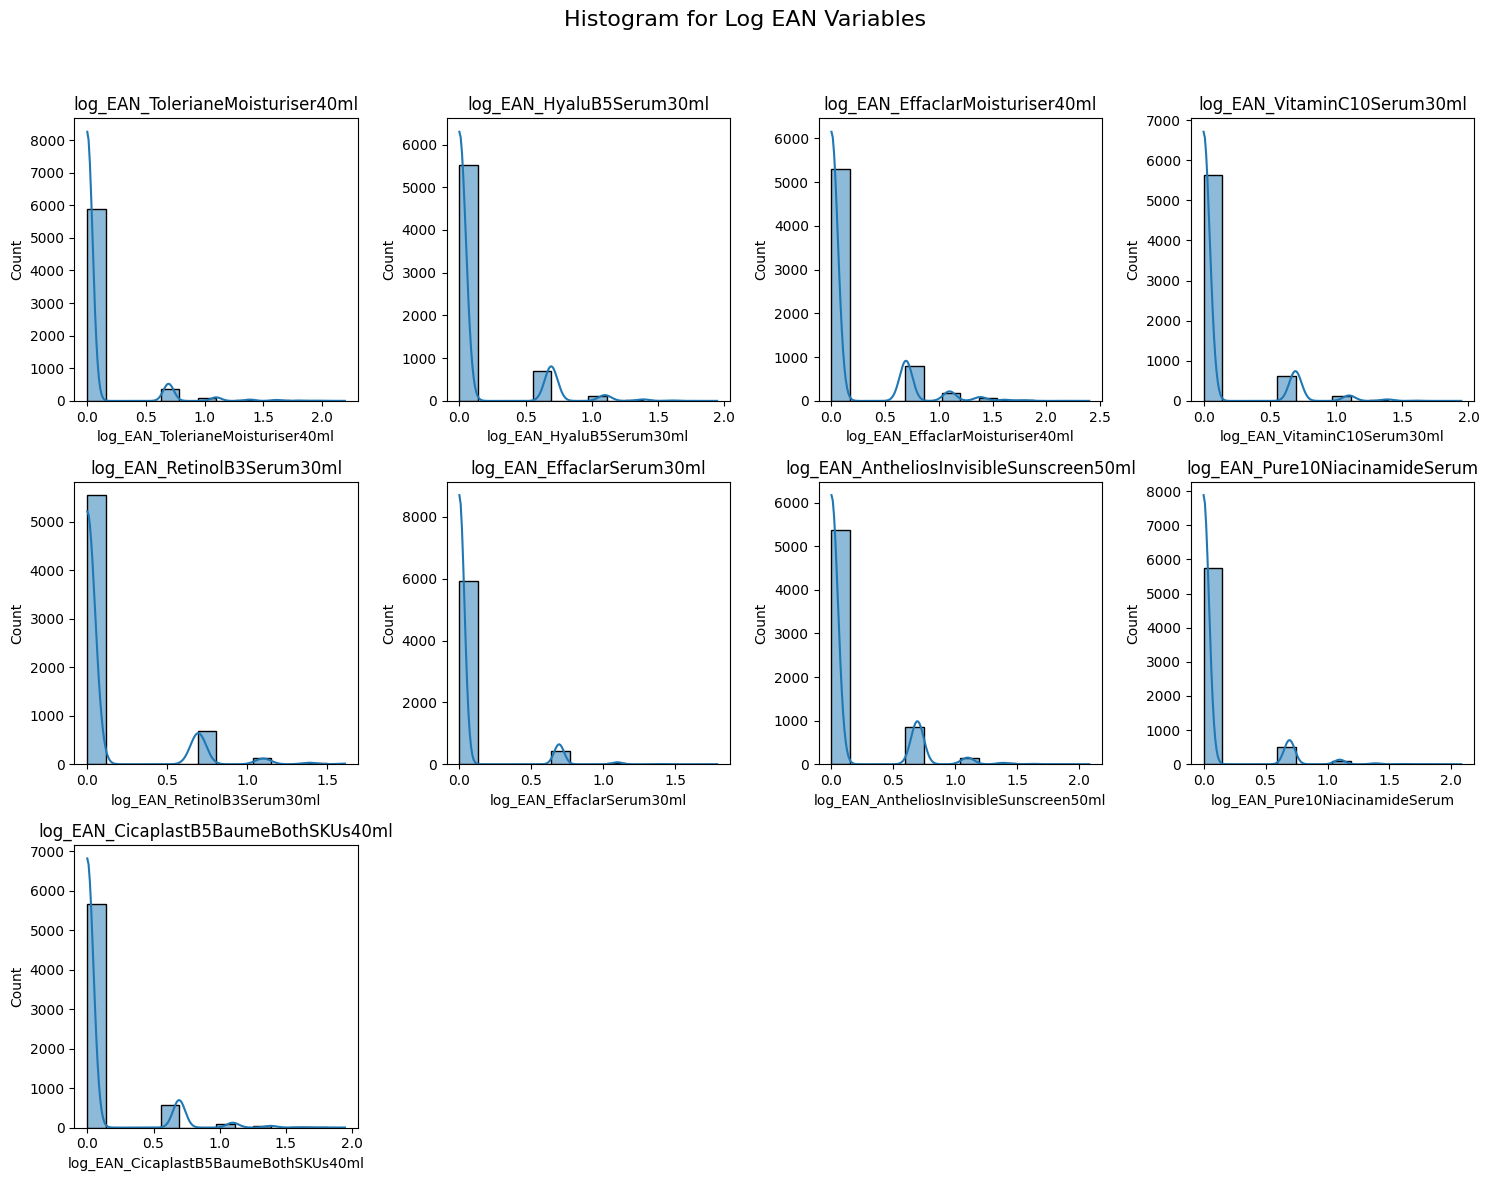

In [14]:
# Create a copy of the original dataframe to store log-transformed variables
data_log_transformed = data.copy()

# Lists of log-transformed variable names for each group
log_brand_vars = [f'log_{col}' for col in brand_vars]
log_class_vars = [f'log_{col}' for col in class_vars]
log_category_vars = [f'log_{col}' for col in category_vars]
log_sub_category_vars = [f'log_{col}' for col in sub_category_vars]
log_skin_concern_vars = [f'log_{col}' for col in skin_concern_vars]
log_ean_vars = [f'log_{col}' for col in ean_vars]

# Creating log1p-transformed columns in the new dataframe
for col in brand_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])  # log1p handles zero values appropriately

for col in class_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])

for col in category_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])

for col in sub_category_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])

for col in skin_concern_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])

for col in ean_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data_log_transformed[col])

# Function to plot box plots for a list of variables
def plot_boxplot(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=data_log_transformed[variable_list])
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()
    else:
        print(f"No variables found for {title}")

# Function to plot histograms for a list of variables
def plot_histogram(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 12))
        plt.suptitle(title, fontsize=16)
        num_plots = len(variable_list)
        for i, col in enumerate(variable_list):
            plt.subplot((num_plots // 4) + 1, 4, i + 1)  # Adjust rows and columns to fit plots
            sns.histplot(data_log_transformed[col], kde=True)
            plt.title(col)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"No variables found for {title}")

# Plotting box plots for each group of log-transformed variables
plot_boxplot(log_brand_vars, 'Box and Whisker Plot for Log Brand Description Variables')
plot_boxplot(log_class_vars, 'Box and Whisker Plot for Log Class Description Variables')
plot_boxplot(log_category_vars, 'Box and Whisker Plot for Log Category Variables')
plot_boxplot(log_sub_category_vars, 'Box and Whisker Plot for Log Sub-Category Variables')
plot_boxplot(log_skin_concern_vars, 'Box and Whisker Plot for Log Skin Concern Variables')
plot_boxplot(log_ean_vars, 'Box and Whisker Plot for Log EAN Variables')

# Plotting histograms for each group of log-transformed variables
plot_histogram(log_brand_vars, 'Histogram for Log Brand Description Variables')
plot_histogram(log_class_vars, 'Histogram for Log Class Description Variables')
plot_histogram(log_category_vars, 'Histogram for Log Category Variables')
plot_histogram(log_sub_category_vars, 'Histogram for Log Sub-Category Variables')
plot_histogram(log_skin_concern_vars, 'Histogram for Log Skin Concern Variables')
plot_histogram(log_ean_vars, 'Histogram for Log EAN Variables')



#### Boxplots & histograms of transaction variables

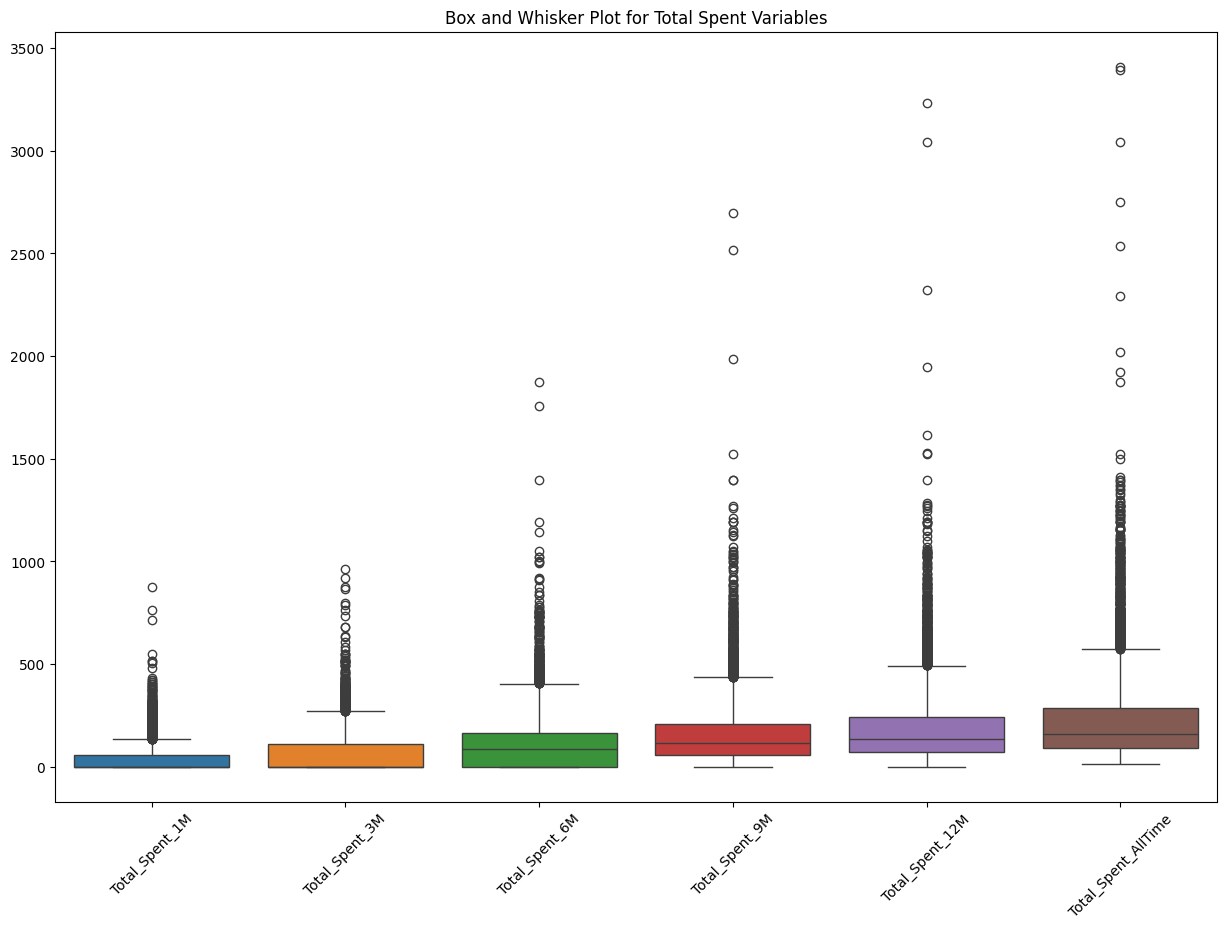

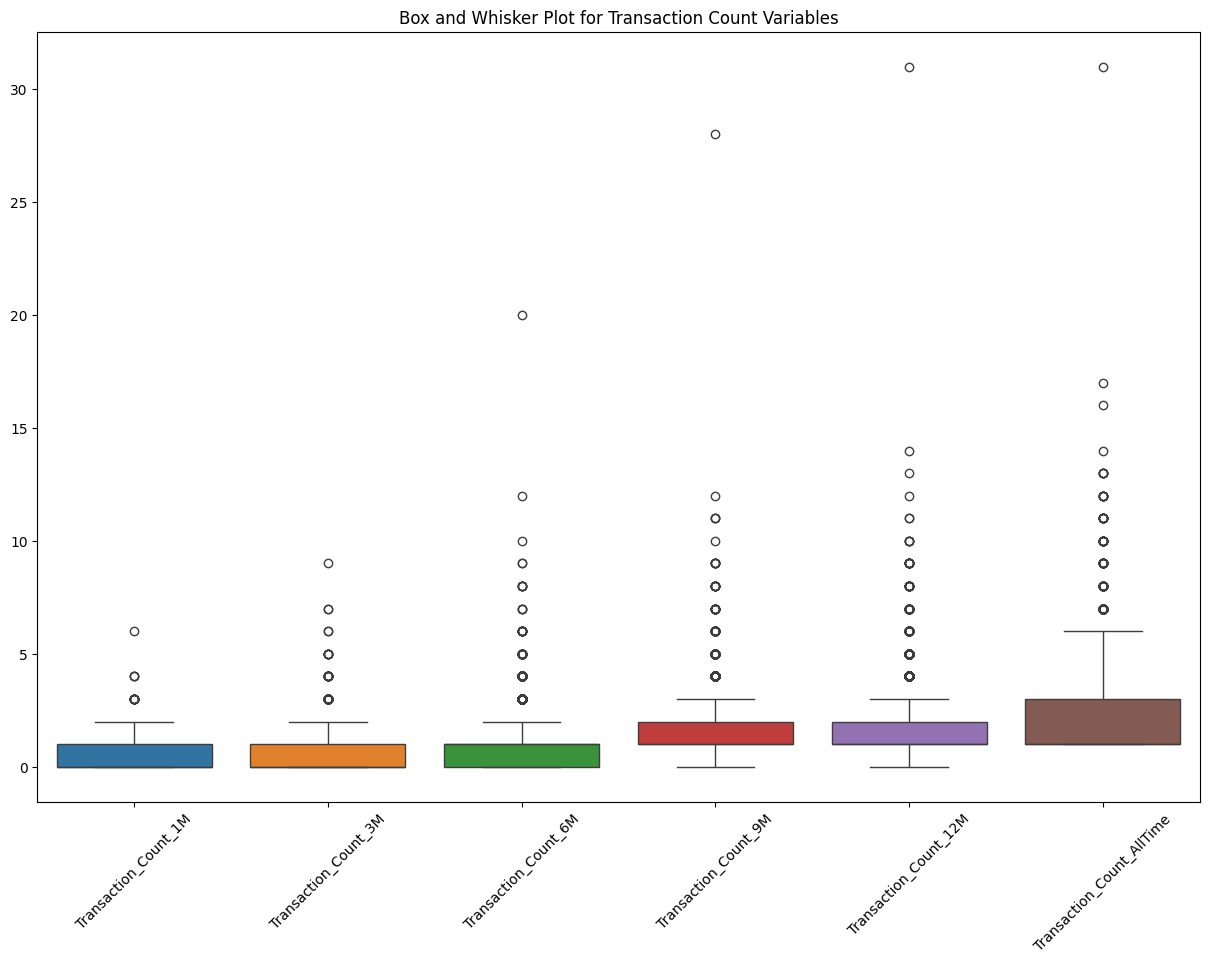

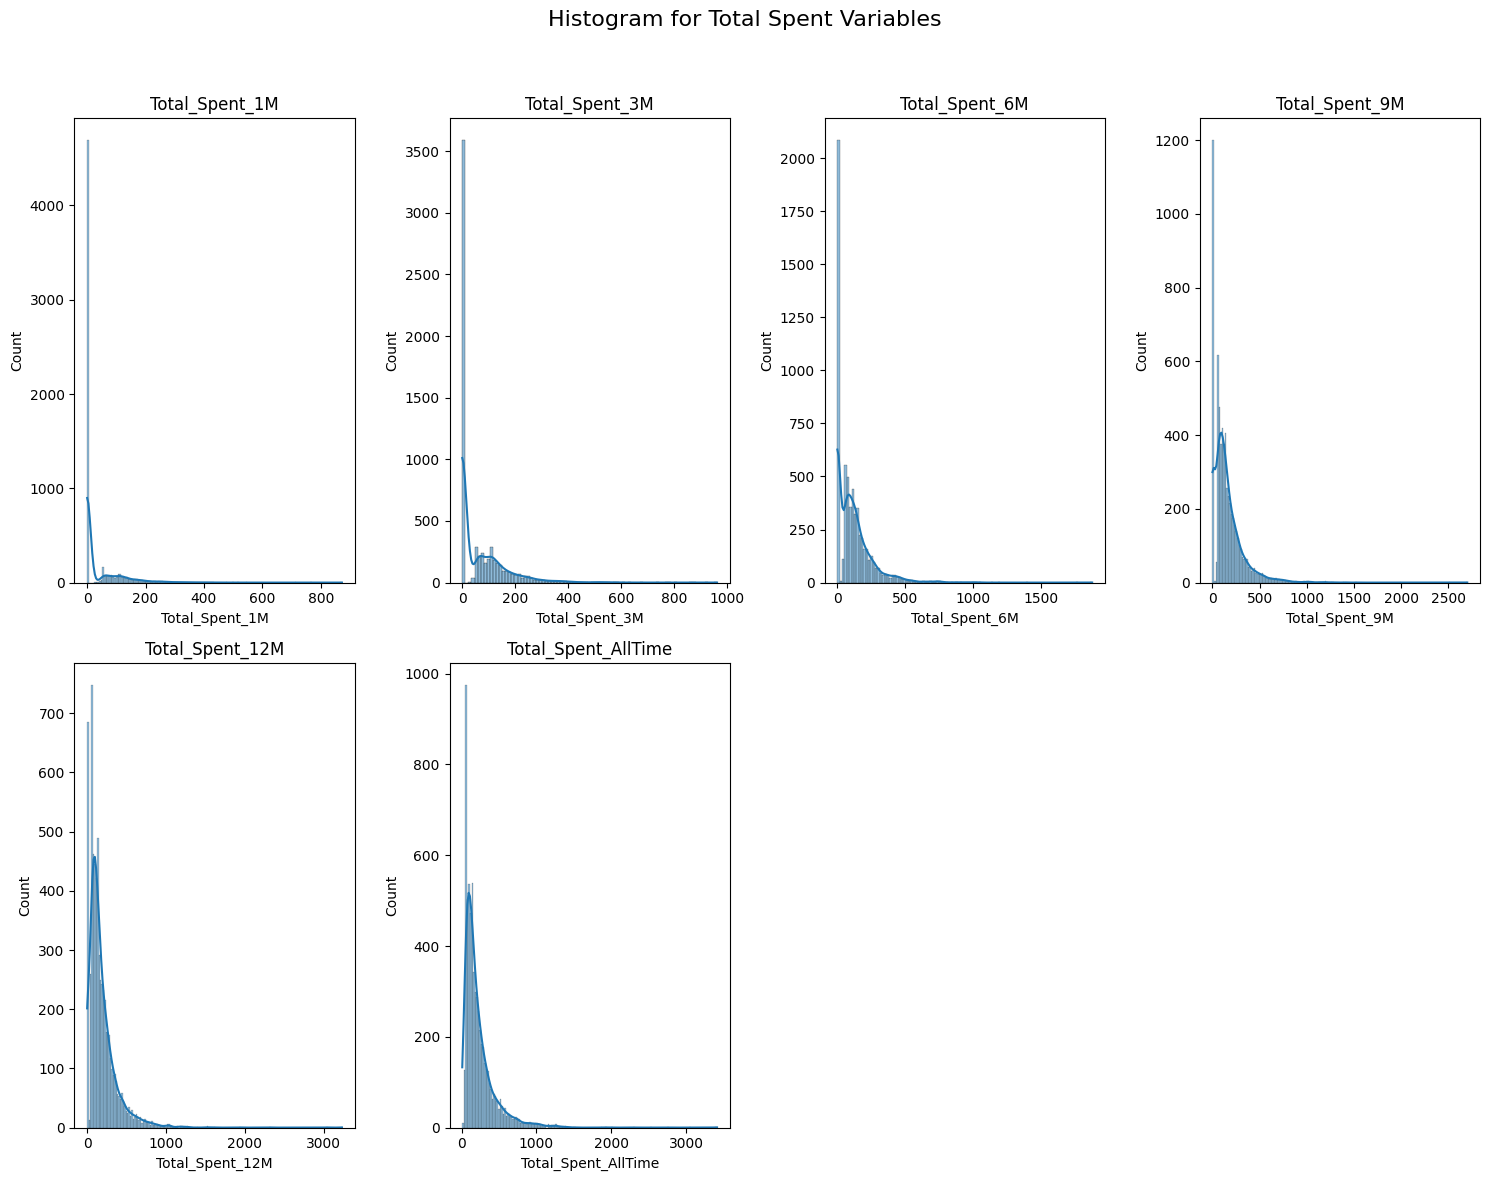

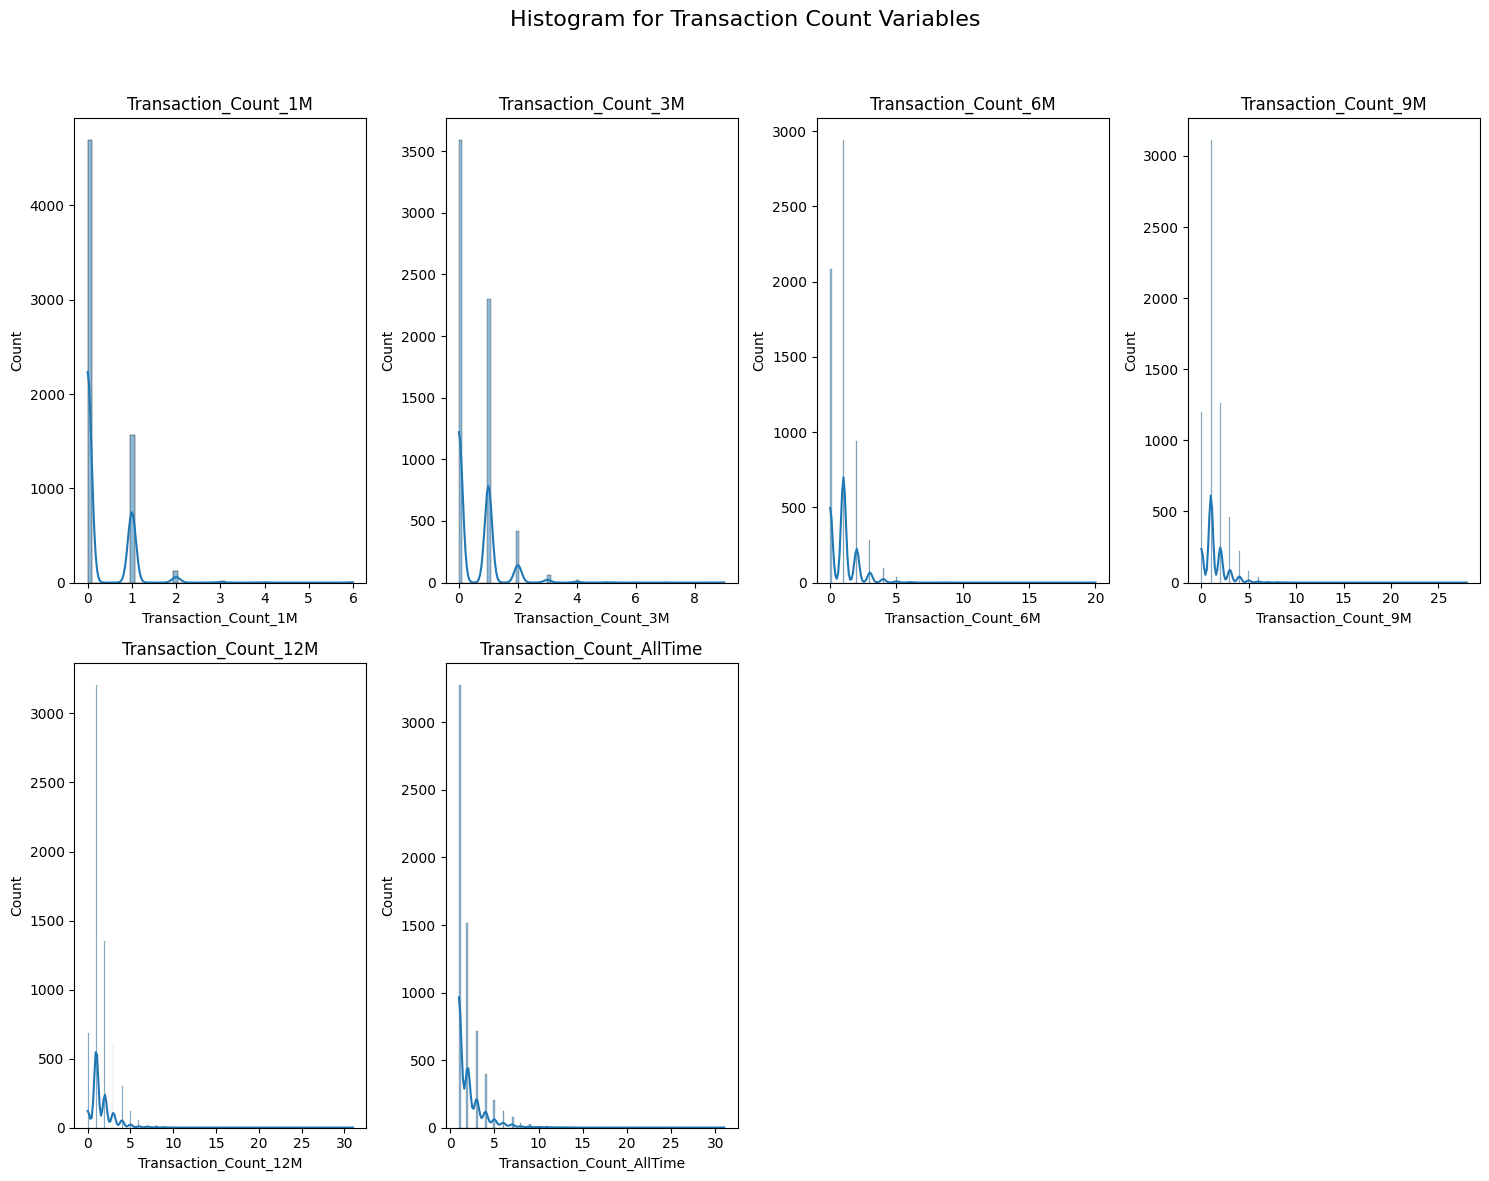

In [15]:
# Separate variables within numeric_var_transaction into those containing 'Total_Spent' and 'Transaction_Count'
total_spent_vars = [col for col in numeric_var_transaction if 'Total_Spent' in col]
transaction_count_vars = [col for col in numeric_var_transaction if 'Transaction_Count' in col]

# Function to plot box plots for a list of variables
def plot_boxplot(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=data[variable_list])
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()
    else:
        print(f"No variables found for {title}")

# Function to plot histograms for a list of variables
def plot_histogram(variable_list, title):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 12))
        plt.suptitle(title, fontsize=16)
        num_plots = len(variable_list)
        for i, col in enumerate(variable_list):
            plt.subplot((num_plots // 4) + 1, 4, i + 1)  # Adjust rows and columns to fit plots
            sns.histplot(data[col], kde=True)
            plt.title(col)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"No variables found for {title}")

# Plotting box plots for 'Total_Spent' variables
plot_boxplot(total_spent_vars, 'Box and Whisker Plot for Total Spent Variables')

# Plotting box plots for 'Transaction_Count' variables
plot_boxplot(transaction_count_vars, 'Box and Whisker Plot for Transaction Count Variables')

# Plotting histograms for 'Total_Spent' variables
plot_histogram(total_spent_vars, 'Histogram for Total Spent Variables')

# Plotting histograms for 'Transaction_Count' variables
plot_histogram(transaction_count_vars, 'Histogram for Transaction Count Variables')


#### Boxplots & histograms of log-transformed transaction variables

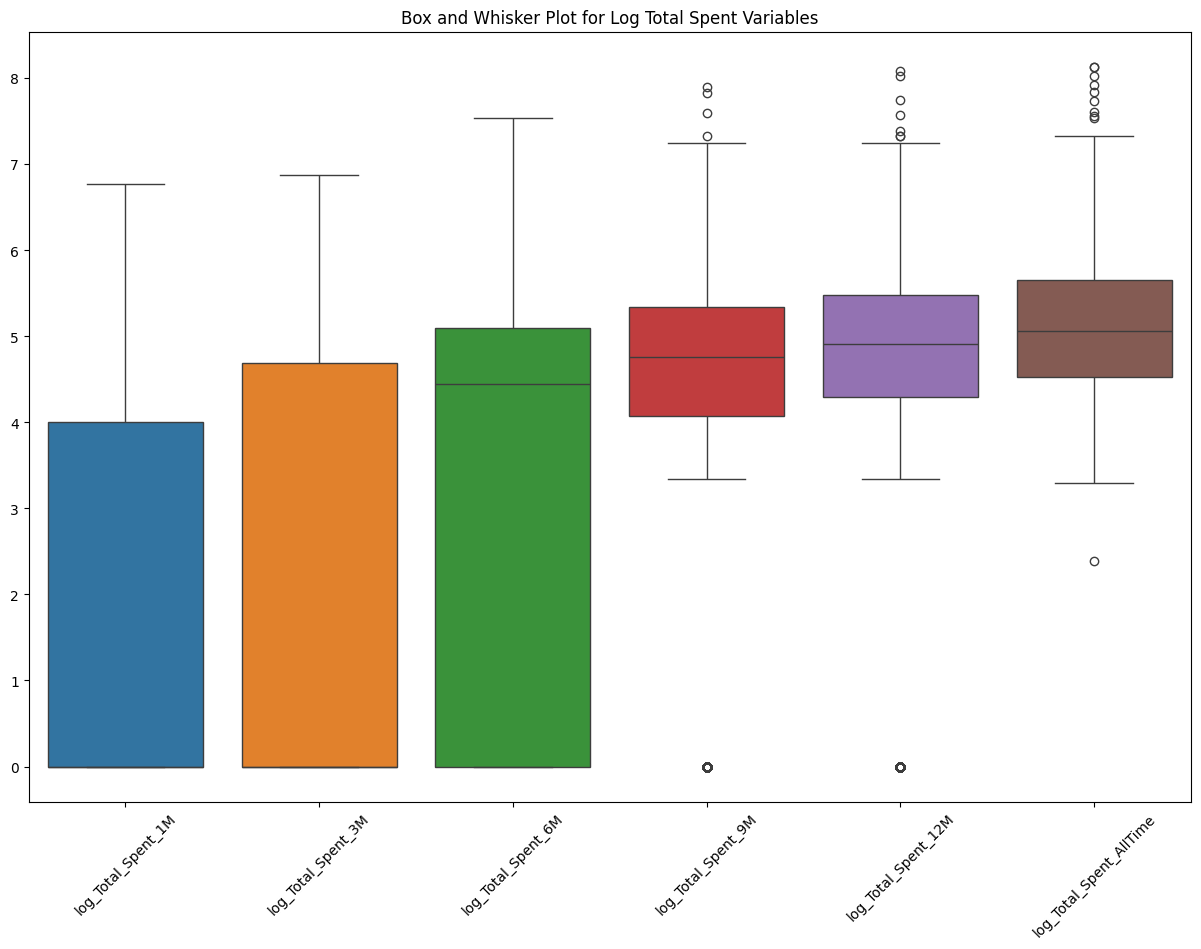

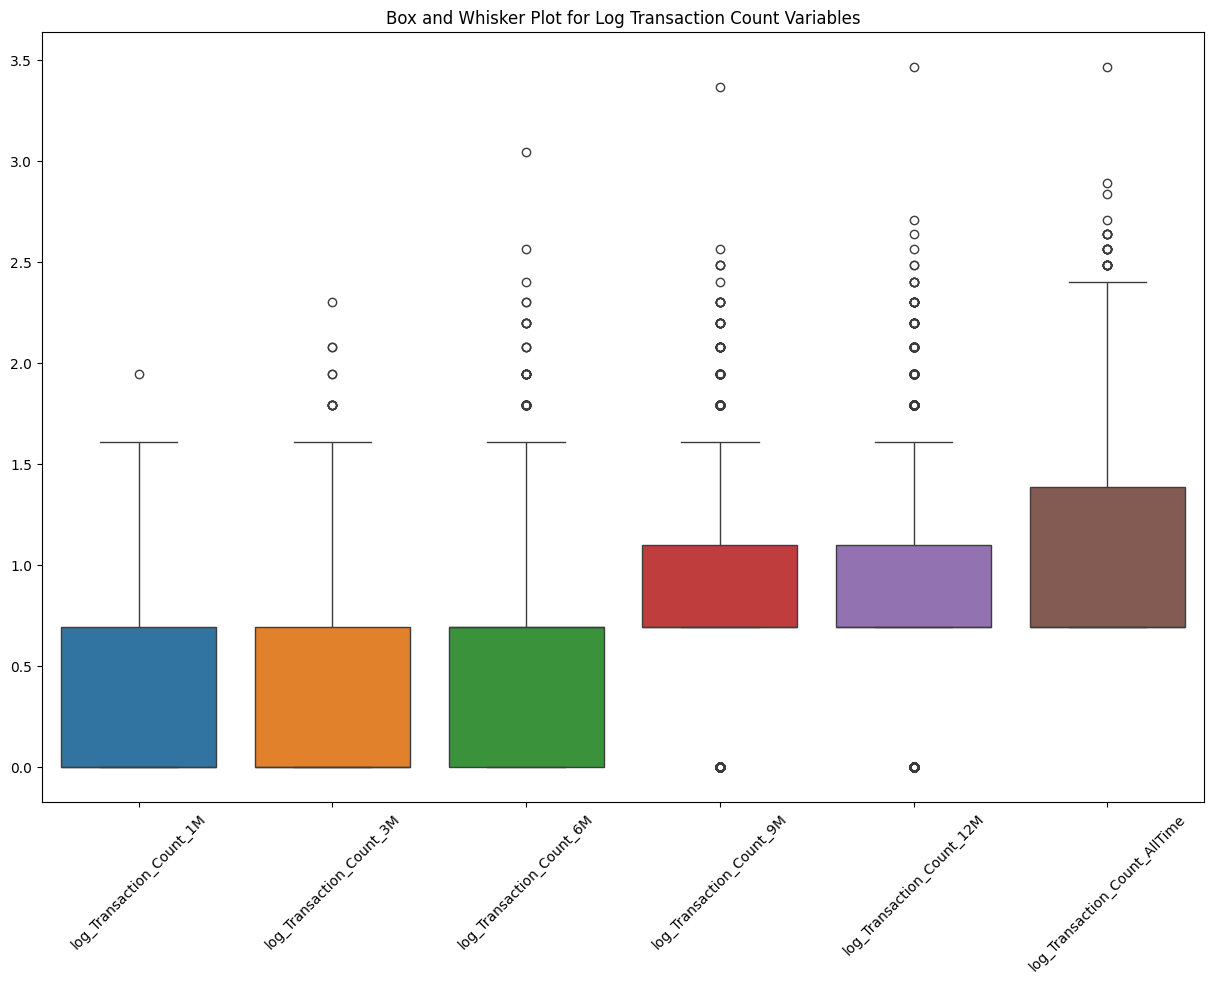

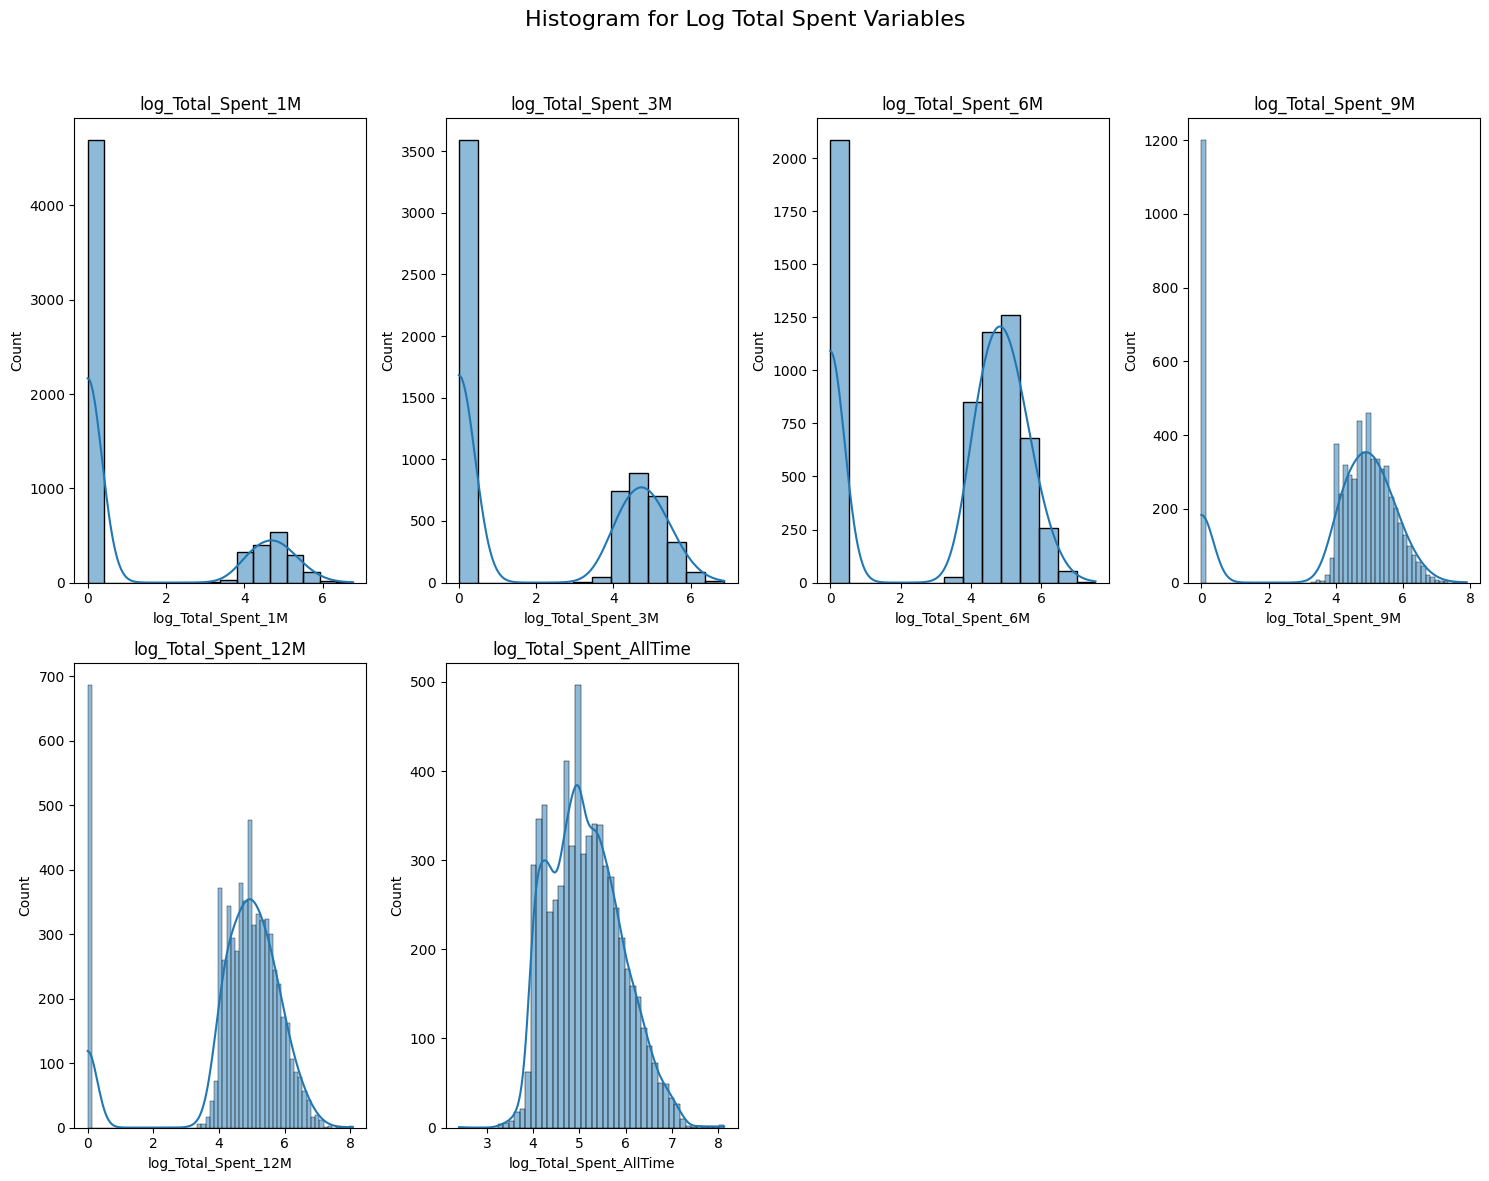

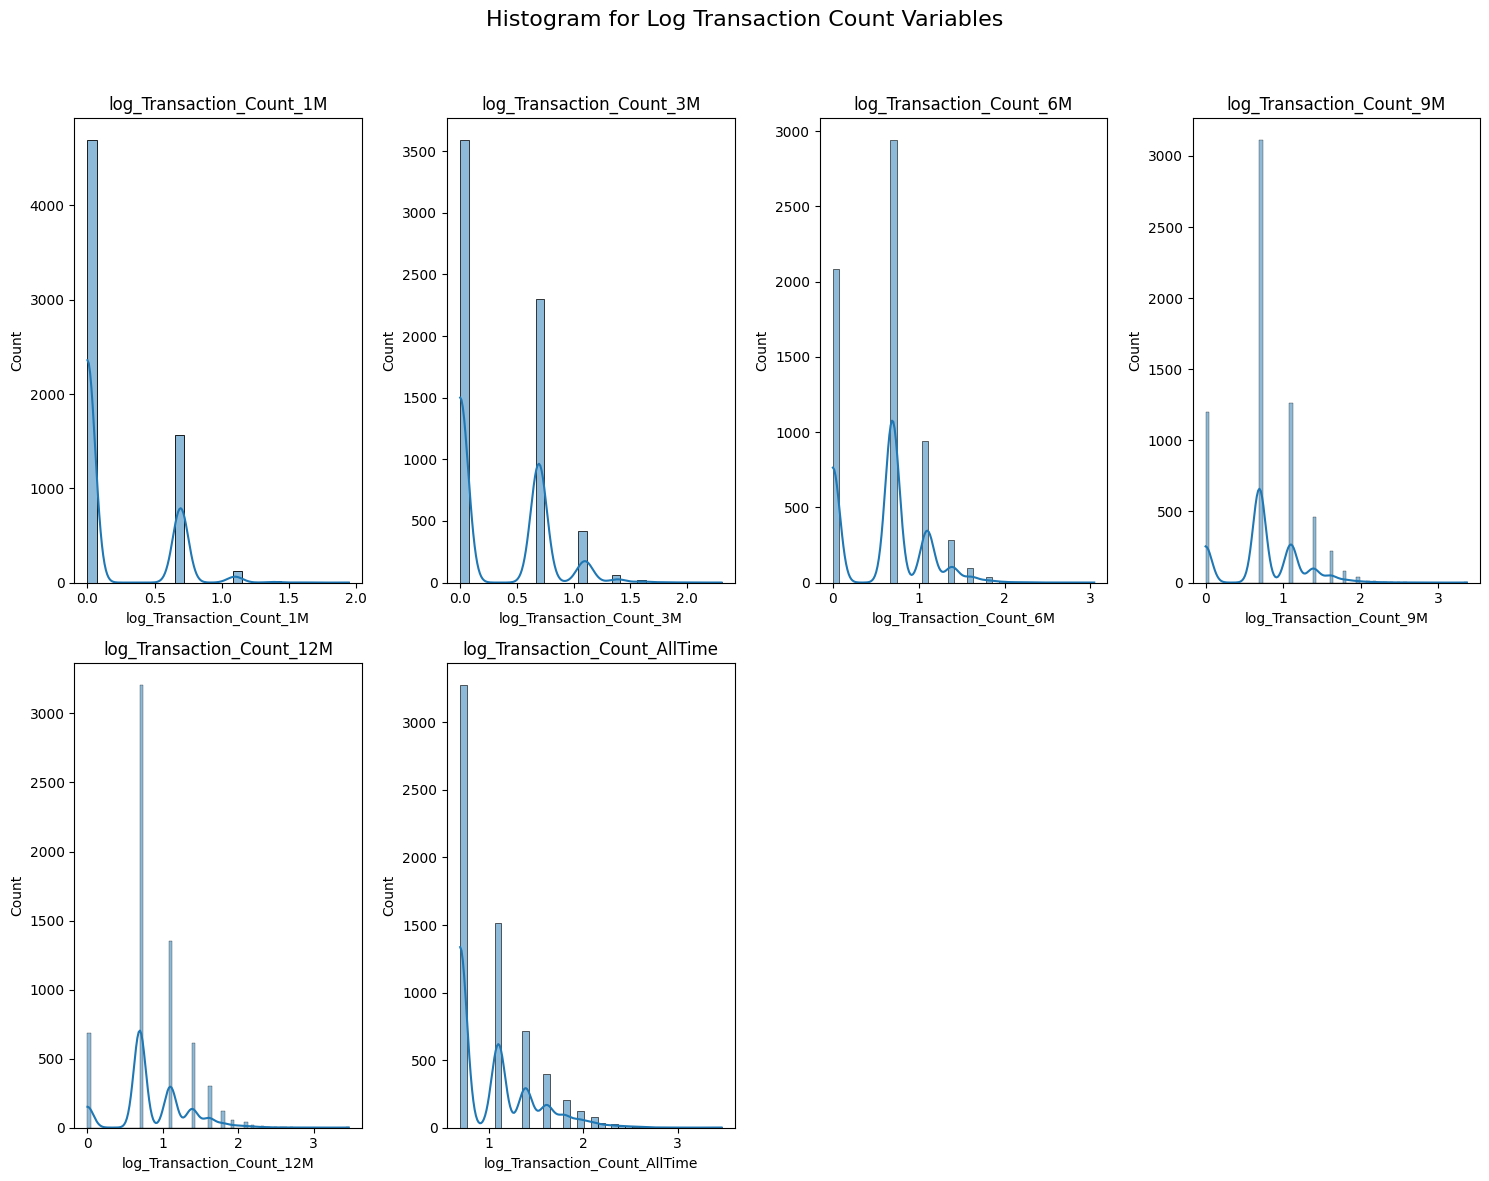

In [16]:
# Separate variables within numeric_var_transaction into those containing 'Total_Spent' and 'Transaction_Count'
total_spent_vars = [col for col in numeric_var_transaction if 'Total_Spent' in col]
transaction_count_vars = [col for col in numeric_var_transaction if 'Transaction_Count' in col]

# Applying log1p transformation to 'Total_Spent' and 'Transaction_Count' variables
log_total_spent_vars = [f'log_{col}' for col in total_spent_vars]
log_transaction_count_vars = [f'log_{col}' for col in transaction_count_vars]

# Adding log1p-transformed columns to the existing dataframe
for col in total_spent_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data[col])  # log1p handles zero values appropriately

for col in transaction_count_vars:
    data_log_transformed[f'log_{col}'] = np.log1p(data[col])

# Function to plot box plots for a list of variables
def plot_boxplot(variable_list, title, df):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 10))
        sns.boxplot(data=df[variable_list])
        plt.xticks(rotation=45)
        plt.title(title)
        plt.show()
    else:
        print(f"No variables found for {title}")

# Function to plot histograms for a list of variables
def plot_histogram(variable_list, title, df):
    if variable_list:  # Check if the list is not empty
        plt.figure(figsize=(15, 12))
        plt.suptitle(title, fontsize=16)
        num_plots = len(variable_list)
        for i, col in enumerate(variable_list):
            plt.subplot((num_plots // 4) + 1, 4, i + 1)  # Adjust rows and columns to fit plots
            sns.histplot(df[col], kde=True)
            plt.title(col)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()
    else:
        print(f"No variables found for {title}")

# Plotting box plots for log-transformed 'Total_Spent' variables using the new dataframe
plot_boxplot(log_total_spent_vars, 'Box and Whisker Plot for Log Total Spent Variables', data_log_transformed)

# Plotting box plots for log-transformed 'Transaction_Count' variables using the new dataframe
plot_boxplot(log_transaction_count_vars, 'Box and Whisker Plot for Log Transaction Count Variables', data_log_transformed)

# Plotting histograms for log-transformed 'Total_Spent' variables using the new dataframe
plot_histogram(log_total_spent_vars, 'Histogram for Log Total Spent Variables', data_log_transformed)

# Plotting histograms for log-transformed 'Transaction_Count' variables using the new dataframe
plot_histogram(log_transaction_count_vars, 'Histogram for Log Transaction Count Variables', data_log_transformed)


### Analysis of transaction variables

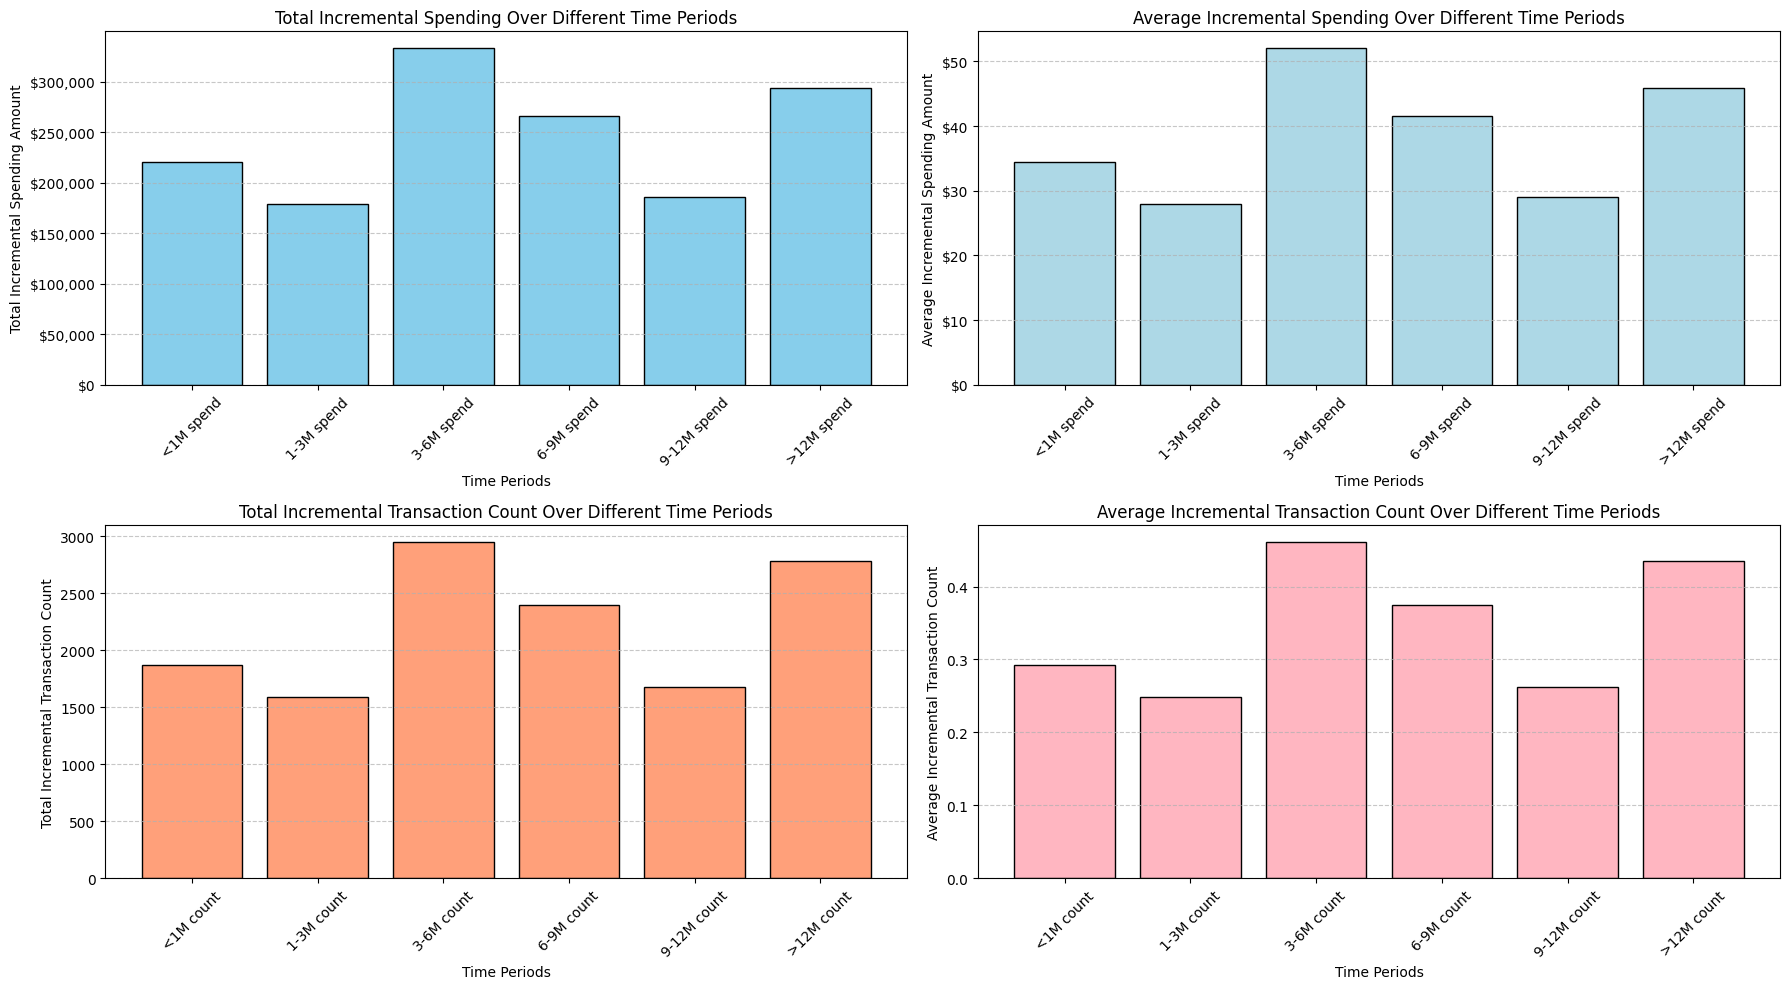

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate incremental (non-cumulative) spending for each period by decomposing the cumulative data
data['<1M spend'] = data['Total_Spent_1M']
data['1-3M spend'] = data['Total_Spent_3M'] - data['Total_Spent_1M']
data['3-6M spend'] = data['Total_Spent_6M'] - data['Total_Spent_3M']
data['6-9M spend'] = data['Total_Spent_9M'] - data['Total_Spent_6M']
data['9-12M spend'] = data['Total_Spent_12M'] - data['Total_Spent_9M']
data['>12M spend'] = data['Total_Spent_AllTime'] - data['Total_Spent_12M']

# Calculate incremental (non-cumulative) transaction counts for each period
data['<1M count'] = data['Transaction_Count_1M']
data['1-3M count'] = data['Transaction_Count_3M'] - data['Transaction_Count_1M']
data['3-6M count'] = data['Transaction_Count_6M'] - data['Transaction_Count_3M']
data['6-9M count'] = data['Transaction_Count_9M'] - data['Transaction_Count_6M']
data['9-12M count'] = data['Transaction_Count_12M'] - data['Transaction_Count_9M']
data['>12M count'] = data['Transaction_Count_AllTime'] - data['Transaction_Count_12M']

# Define the correct columns for incremental spending and transaction counts
spending_columns = ['<1M spend', '1-3M spend', '3-6M spend', '6-9M spend', '9-12M spend', '>12M spend']
transaction_columns = ['<1M count', '1-3M count', '3-6M count', '6-9M count', '9-12M count', '>12M count']

# Calculate the sum and average of incremental spending and transaction counts for each period
total_spending = data[spending_columns].sum()
average_spending = data[spending_columns].mean()
total_transaction_count = data[transaction_columns].sum()
average_transaction_count = data[transaction_columns].mean()

# Create a figure with four bar charts: sum and average for spending and transaction counts
plt.figure(figsize=(18, 10))

# Bar chart for total incremental spending
plt.subplot(2, 2, 1)
plt.bar(total_spending.index, total_spending.values, color='#87CEEB', edgecolor='black')  # Light sky blue
plt.title('Total Incremental Spending Over Different Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Total Incremental Spending Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format y-axis with dollar signs

# Bar chart for average incremental spending with a slightly different shade of blue
plt.subplot(2, 2, 2)
plt.bar(average_spending.index, average_spending.values, color='#ADD8E6', edgecolor='black')  # Lighter blue
plt.title('Average Incremental Spending Over Different Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Average Incremental Spending Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))  # Format y-axis with dollar signs

# Bar chart for total incremental transaction counts
plt.subplot(2, 2, 3)
plt.bar(total_transaction_count.index, total_transaction_count.values, color='#FFA07A', edgecolor='black')  # Light coral
plt.title('Total Incremental Transaction Count Over Different Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Total Incremental Transaction Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Bar chart for average incremental transaction counts with a similar shade
plt.subplot(2, 2, 4)
plt.bar(average_transaction_count.index, average_transaction_count.values, color='#FFB6C1', edgecolor='black')  # Lighter coral
plt.title('Average Incremental Transaction Count Over Different Time Periods')
plt.xlabel('Time Periods')
plt.ylabel('Average Incremental Transaction Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Analysis of brand variables

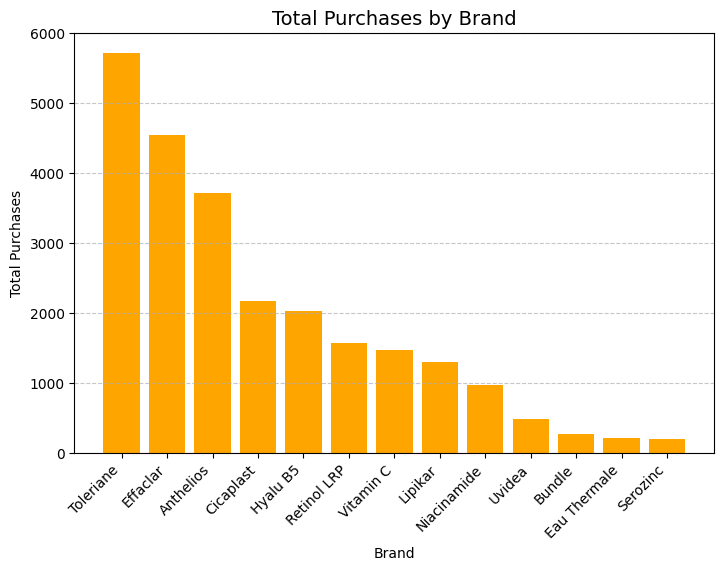

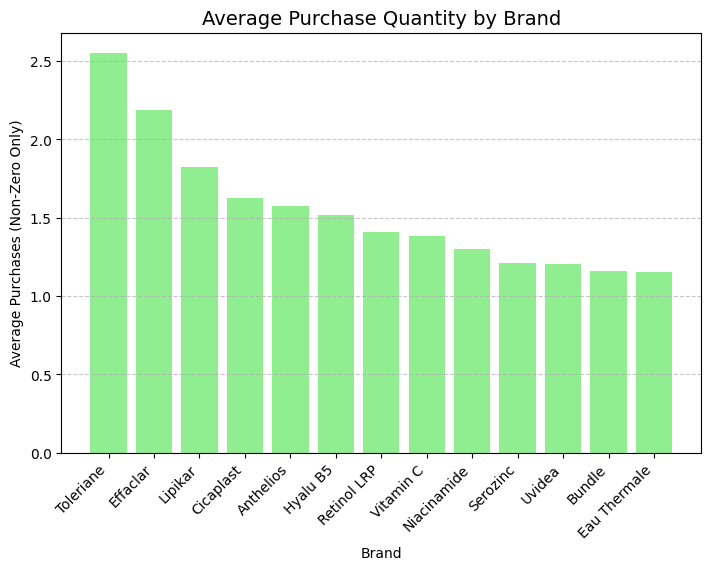

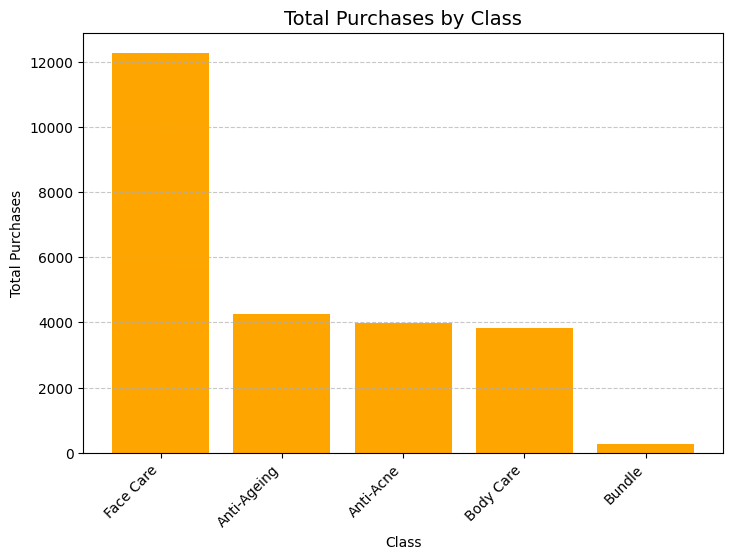

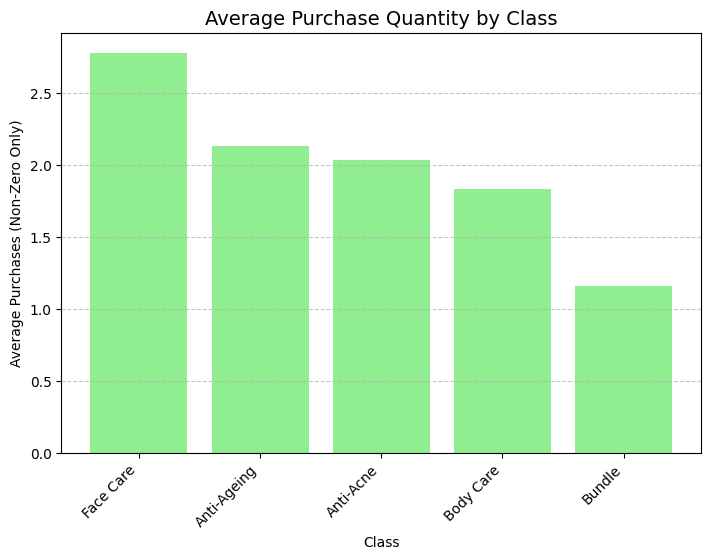

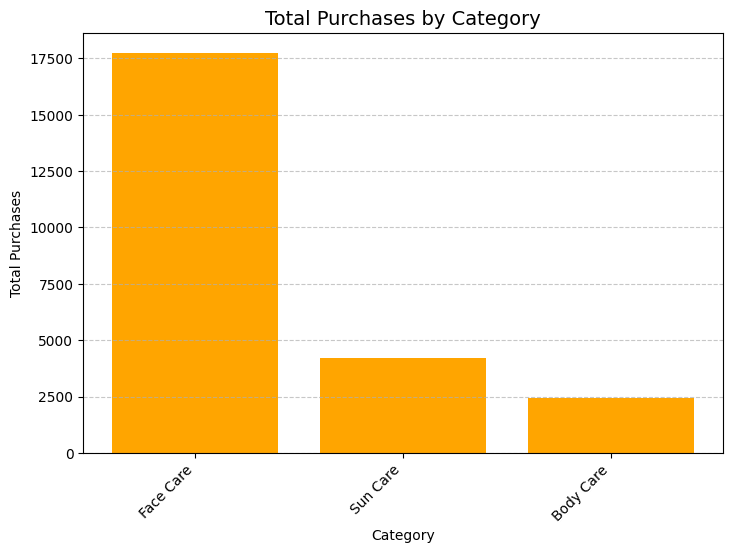

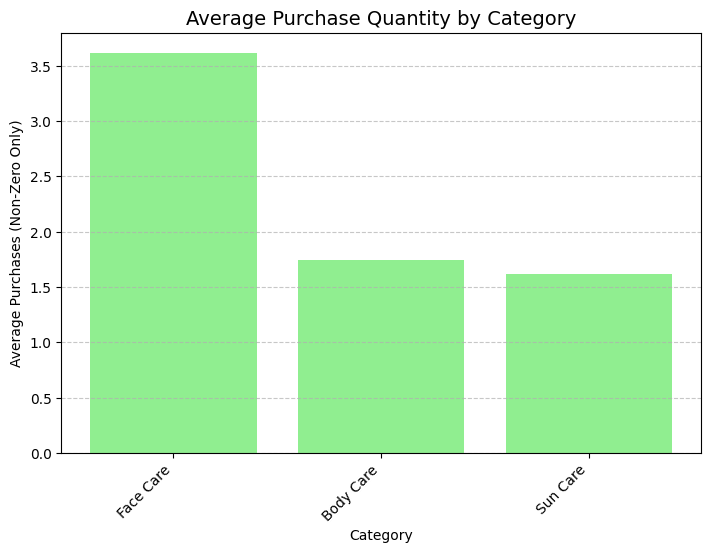

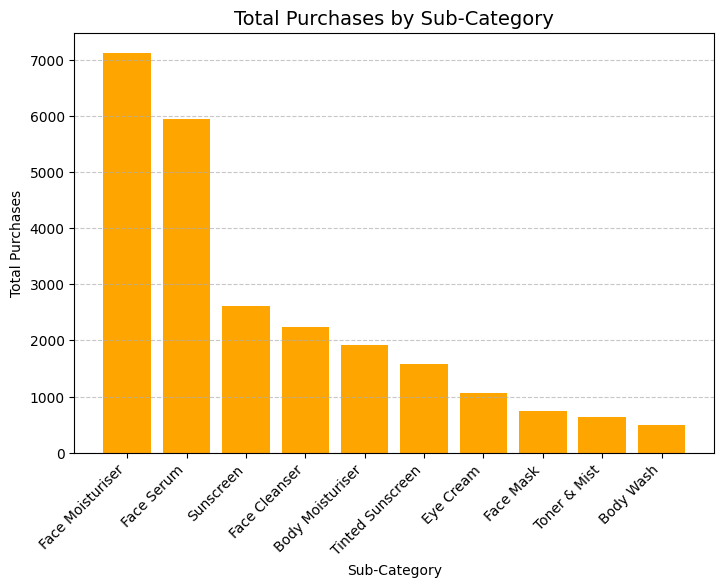

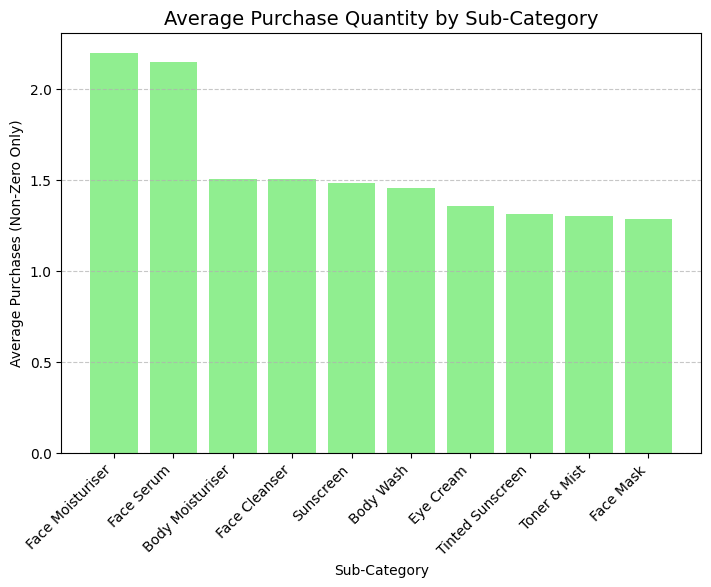

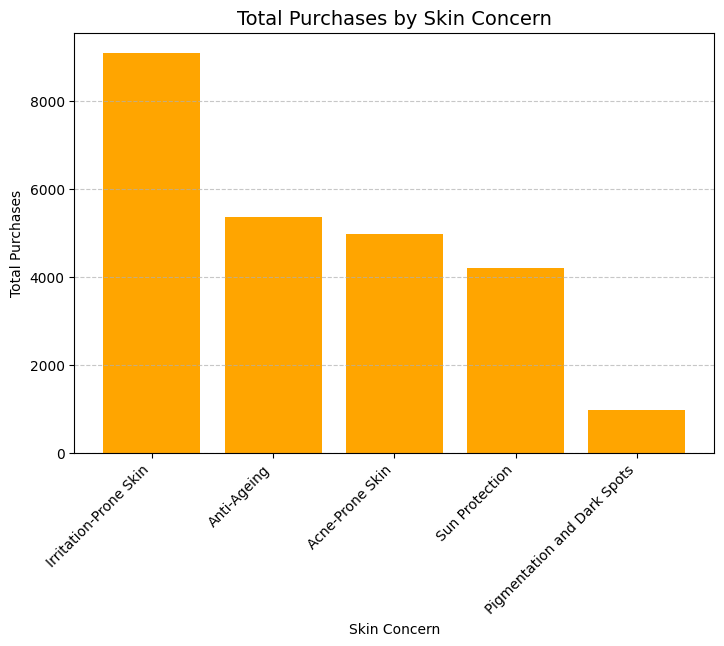

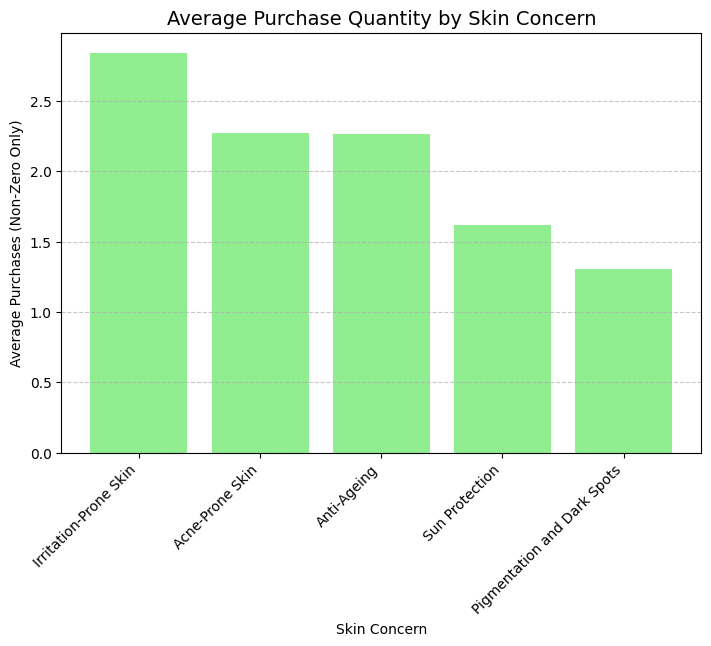

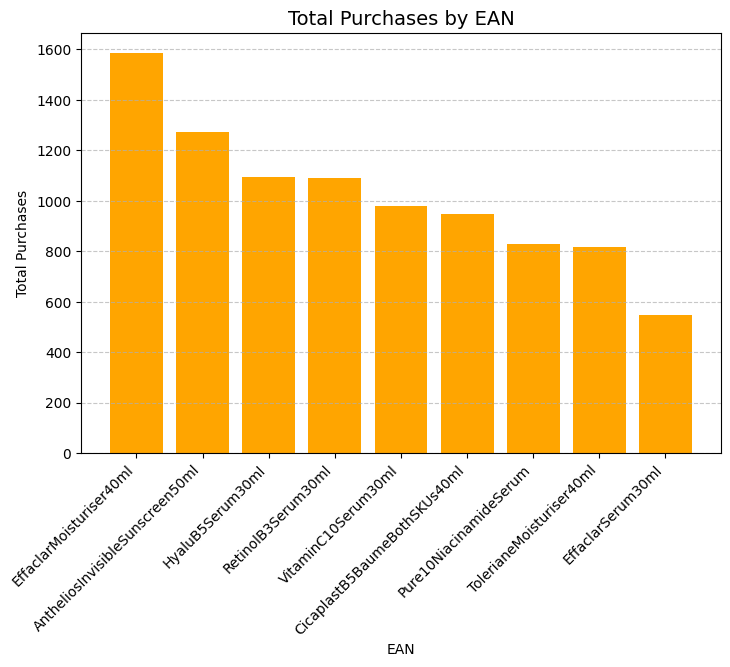

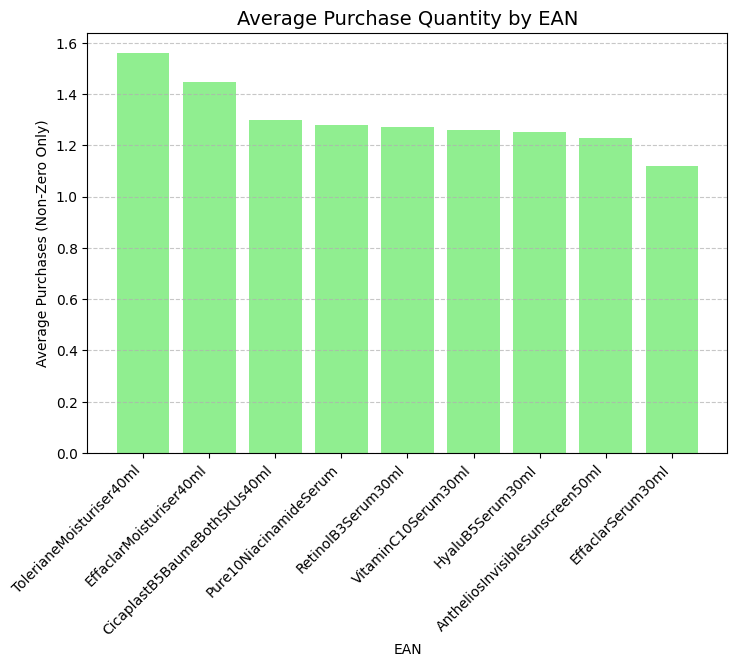

In [18]:
import matplotlib.pyplot as plt

# Define a function to create bar charts for different variable groups
def create_bar_chart(data, prefix, title, xlabel, filename, exclude_output=False, aggregation='sum'):
    # Identify all columns that start with the given prefix
    columns = [col for col in data.columns if col.startswith(prefix)]

    # Optionally exclude columns that contain '_Output'
    if exclude_output:
        columns = [col for col in columns if '_Output' not in col]

    # Aggregate the values for the selected columns based on the specified aggregation method
    if aggregation == 'sum':
        purchases = data[columns].sum()
        ylabel = 'Total Purchases'
        label = 'Total Purchases'
    elif aggregation == 'mean':
        # Calculate the average only for rows with non-zero purchases in each column
        purchases = data[columns].apply(lambda x: x[x > 0].mean())
        ylabel = 'Average Purchases (Non-Zero Only)'
        label = 'Average Purchases'

    # Clean the index names by removing the prefix
    purchases.index = [col.replace(prefix, '') for col in columns]

    # Sort the values from high to low
    purchases = purchases.sort_values(ascending=False)

    # Create the bar plot with sorted values
    plt.figure(figsize=(8, 6))
    plt.bar(purchases.index, purchases.values, label=label, color='orange' if aggregation == 'sum' else 'lightgreen')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)
    plt.savefig(filename)
    plt.show()

# Create bar charts for total and average purchases for each variable group using the function
create_bar_chart(data, 'Brand Description_', 'Total Purchases by Brand', 'Brand', 'total_purchases_brands.pdf', exclude_output=True, aggregation='sum')
create_bar_chart(data, 'Brand Description_', 'Average Purchase Quantity by Brand', 'Brand', 'average_purchases_brands.pdf', exclude_output=True, aggregation='mean')

create_bar_chart(data, 'Class Description_', 'Total Purchases by Class', 'Class', 'total_purchases_classes.pdf', aggregation='sum')
create_bar_chart(data, 'Class Description_', 'Average Purchase Quantity by Class', 'Class', 'average_purchases_classes.pdf', aggregation='mean')

create_bar_chart(data, 'Category_', 'Total Purchases by Category', 'Category', 'total_purchases_categories.pdf', aggregation='sum')
create_bar_chart(data, 'Category_', 'Average Purchase Quantity by Category', 'Category', 'average_purchases_categories.pdf', aggregation='mean')

create_bar_chart(data, 'Sub-Category_', 'Total Purchases by Sub-Category', 'Sub-Category', 'total_purchases_sub_categories.pdf', aggregation='sum')
create_bar_chart(data, 'Sub-Category_', 'Average Purchase Quantity by Sub-Category', 'Sub-Category', 'average_purchases_sub_categories.pdf', aggregation='mean')

create_bar_chart(data, 'Skin Concern_', 'Total Purchases by Skin Concern', 'Skin Concern', 'total_purchases_skin_concerns.pdf', aggregation='sum')
create_bar_chart(data, 'Skin Concern_', 'Average Purchase Quantity by Skin Concern', 'Skin Concern', 'average_purchases_skin_concerns.pdf', aggregation='mean')

create_bar_chart(data, 'EAN_', 'Total Purchases by EAN', 'EAN', 'total_purchases_eans.pdf', aggregation='sum')
create_bar_chart(data, 'EAN_', 'Average Purchase Quantity by EAN', 'EAN', 'average_purchases_eans.pdf', aggregation='mean')


### II. Analysis of categorical variables

#### Post Code

In [19]:
mosaic = pd.read_csv('PostcodeData.csv', dtype={'Postcode \ MOSAIC code': str})
mosaic = mosaic.rename(columns={'Postcode \ MOSAIC code': 'Postcode'})
columns_to_extract = ['Postcode', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
mosaic = mosaic[columns_to_extract]
mosaic.head()

# Calculate the total population in each postcode (sum of all groups)
mosaic['Total'] = mosaic[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']].sum(axis=1)

# Calculate the proportion of each group within each postcode
for group in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']:
    mosaic[f'Prop_{group}'] = mosaic[group] / mosaic['Total']

In [20]:
# Columns to select from the main data
columns_to_select = [
    'Post Code',
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output',
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output'
]

# Selecting and renaming relevant columns
selected_data = data[columns_to_select]
selected_data = selected_data.rename(columns={'Post Code': 'Postcode'})

# Merge the customer data with demographic proportions based on Postcode
merged_data = pd.merge(selected_data, mosaic, on='Postcode', how='right')

# Define the group types and brands
group_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
brand_columns = {
    'Anthelios': 'Brand Description_Anthelios_Output',
    'Cicaplast': 'Brand Description_Cicaplast_Output',
    'Effaclar': 'Brand Description_Effaclar_Output',
    'Hyalu B5': 'Brand Description_Hyalu B5_Output',
    'Lipikar': 'Brand Description_Lipikar_Output',
    'Toleriane': 'Brand Description_Toleriane_Output',
    'Vitamin C': 'Brand Description_Vitamin C_Output'
}

# Initialize an empty dictionary to store results for each brand and Customer_Count
brand_counts = {brand: [] for brand in brand_columns.keys()}
customer_counts = []

# Calculate the number of customers per group type for each brand and the total contribution
for group in group_types:
    # Calculate the total contribution of each group type
    customer_count = merged_data[f'Prop_{group}'].sum()
    customer_counts.append(customer_count)

    # Calculate the weighted count of customers for each brand and group type
    for brand, brand_column in brand_columns.items():
        weighted_count = (merged_data[brand_column] * merged_data[f'Prop_{group}']).sum()
        brand_counts[brand].append(weighted_count)

# Create the DataFrame with Group_Type, brand counts, and Customer_Count
group_approximation = pd.DataFrame({
    'Group_Type': group_types,
    **brand_counts,  # Unpack the brand counts dictionary into columns
    'Customer_Count': customer_counts
})

# Display the group approximation DataFrame with brand-specific customer counts and Customer_Count
print(group_approximation)

# Sum and print the totals for Customer_Count
total_customer_count = group_approximation['Customer_Count'].sum()
print(f"Total of Customer_Count: {total_customer_count}")

   Group_Type  Anthelios  Cicaplast   Effaclar  Hyalu B5    Lipikar  \
0           A  35.516607  22.987207  40.147843  6.128645  20.386360   
1           B  36.521155  22.607911  33.579730  5.386539  20.884989   
2           C  53.135533  27.240028  46.546232  8.944314  23.830297   
3           D  36.556947  24.682891  39.646218  8.213806  19.642892   
4           E  24.889631  15.936634  26.416616  3.395121  13.948898   
5           F  38.324576  26.131789  35.203580  6.280243  19.334153   
6           G  47.271267  30.549111  51.975057  8.797088  25.647804   
7           H  33.619602  17.929900  29.265112  5.429267  12.985066   
8           I  42.171716  28.003453  39.093557  8.467172  20.440909   
9           J  34.913187  19.133909  29.726049  7.256243  14.546200   
10          K  40.433794  28.321599  38.516221  8.243824  22.745730   
11          L  23.013445  13.374681  21.306772  4.096535   7.751969   
12          M  37.955445  23.706763  36.560301  6.783724  16.722447   
13    

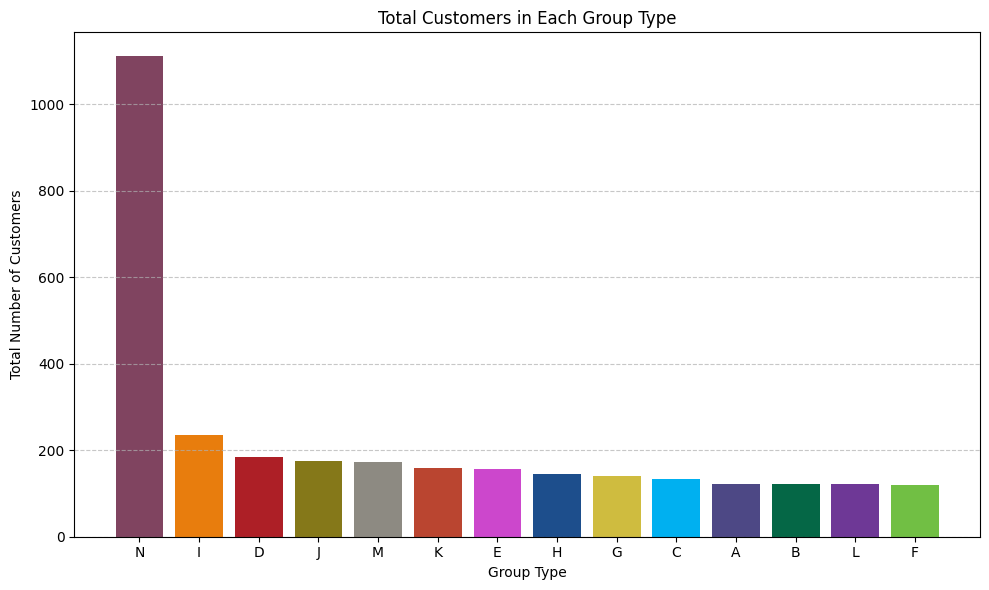

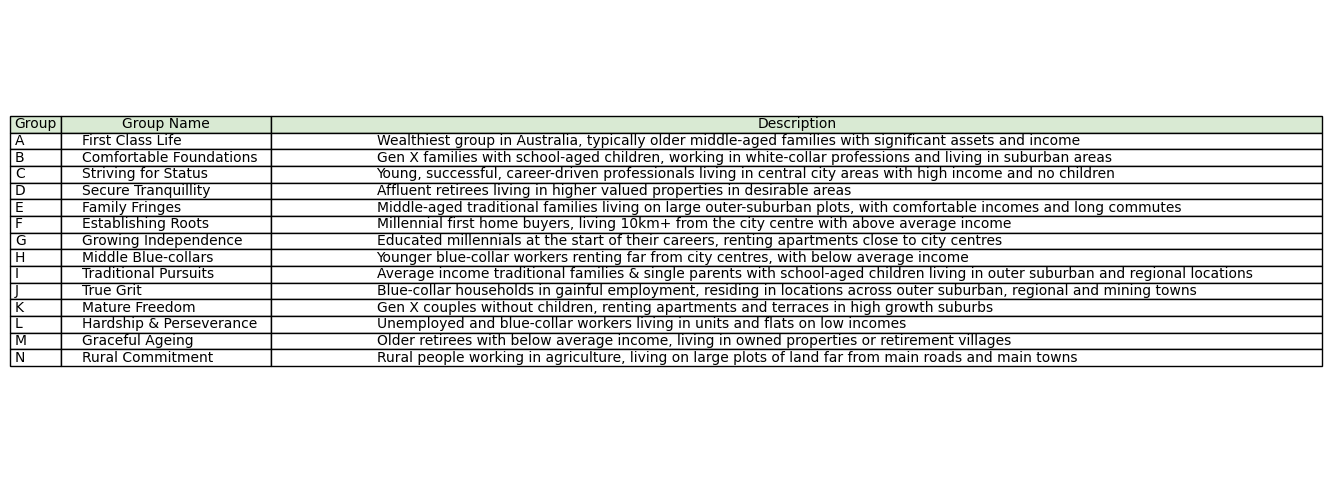

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort the DataFrame by Customer_Count in ascending order
sorted_group_approximation = group_approximation.sort_values(by='Customer_Count', ascending=False)

# Extract sorted group types and their corresponding customer counts
group_types = sorted_group_approximation['Group_Type']
customer_counts = sorted_group_approximation['Customer_Count']

# Define the group colors as per the specified mapping
group_colors = {
    'A': '#4D4885',
    'B': '#056746',
    'C': '#00B0F0',
    'D': '#AD1F26',
    'E': '#CC47CC',
    'F': '#71BF44',
    'G': '#CFBC3F',
    'H': '#1D4E8C',
    'I': '#E87D0D',
    'J': '#857819',
    'K': '#BA4530',
    'L': '#6E3896',
    'M': '#8D8A82',
    'N': '#804460'
}

# Create a list of colors corresponding to the sorted group types
bar_colors = [group_colors[group] for group in group_types]

# Create a bar graph with specified colors
plt.figure(figsize=(10, 6))
plt.bar(group_types, customer_counts, color=bar_colors)

# Add labels, title, and grid
plt.xlabel('Group Type')
plt.ylabel('Total Number of Customers')
plt.title('Total Customers in Each Group Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the bar graph
plt.tight_layout()
plt.show()

# Define the group data as a dictionary
group_data = {
    'Group': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'],
    'Group Name': [
        'First Class Life', 'Comfortable Foundations', 'Striving for Status', 'Secure Tranquillity',
        'Family Fringes', 'Establishing Roots', 'Growing Independence', 'Middle Blue-collars',
        'Traditional Pursuits', 'True Grit', 'Mature Freedom', 'Hardship & Perseverance',
        'Graceful Ageing', 'Rural Commitment'
    ],
    'Description': [
        'Wealthiest group in Australia, typically older middle-aged families with significant assets and income',
        'Gen X families with school-aged children, working in white-collar professions and living in suburban areas',
        'Young, successful, career-driven professionals living in central city areas with high income and no children',
        'Affluent retirees living in higher valued properties in desirable areas',
        'Middle-aged traditional families living on large outer-suburban plots, with comfortable incomes and long commutes',
        'Millennial first home buyers, living 10km+ from the city centre with above average income',
        'Educated millennials at the start of their careers, renting apartments close to city centres',
        'Younger blue-collar workers renting far from city centres, with below average income',
        'Average income traditional families & single parents with school-aged children living in outer suburban and regional locations',
        'Blue-collar households in gainful employment, residing in locations across outer suburban, regional and mining towns',
        'Gen X couples without children, renting apartments and terraces in high growth suburbs',
        'Unemployed and blue-collar workers living in units and flats on low incomes',
        'Older retirees with below average income, living in owned properties or retirement villages',
        'Rural people working in agriculture, living on large plots of land far from main roads and main towns'
    ]
}

# Convert to DataFrame
group_df = pd.DataFrame(group_data)

# Plot the table
plt.figure(figsize=(12, 6))
plt.axis('off')
table = plt.table(cellText=group_df.values, colLabels=group_df.columns, cellLoc='left', loc='center', colColours=['#D9EAD3']*3)

# Adjust table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=[0, 1, 2])

plt.show()

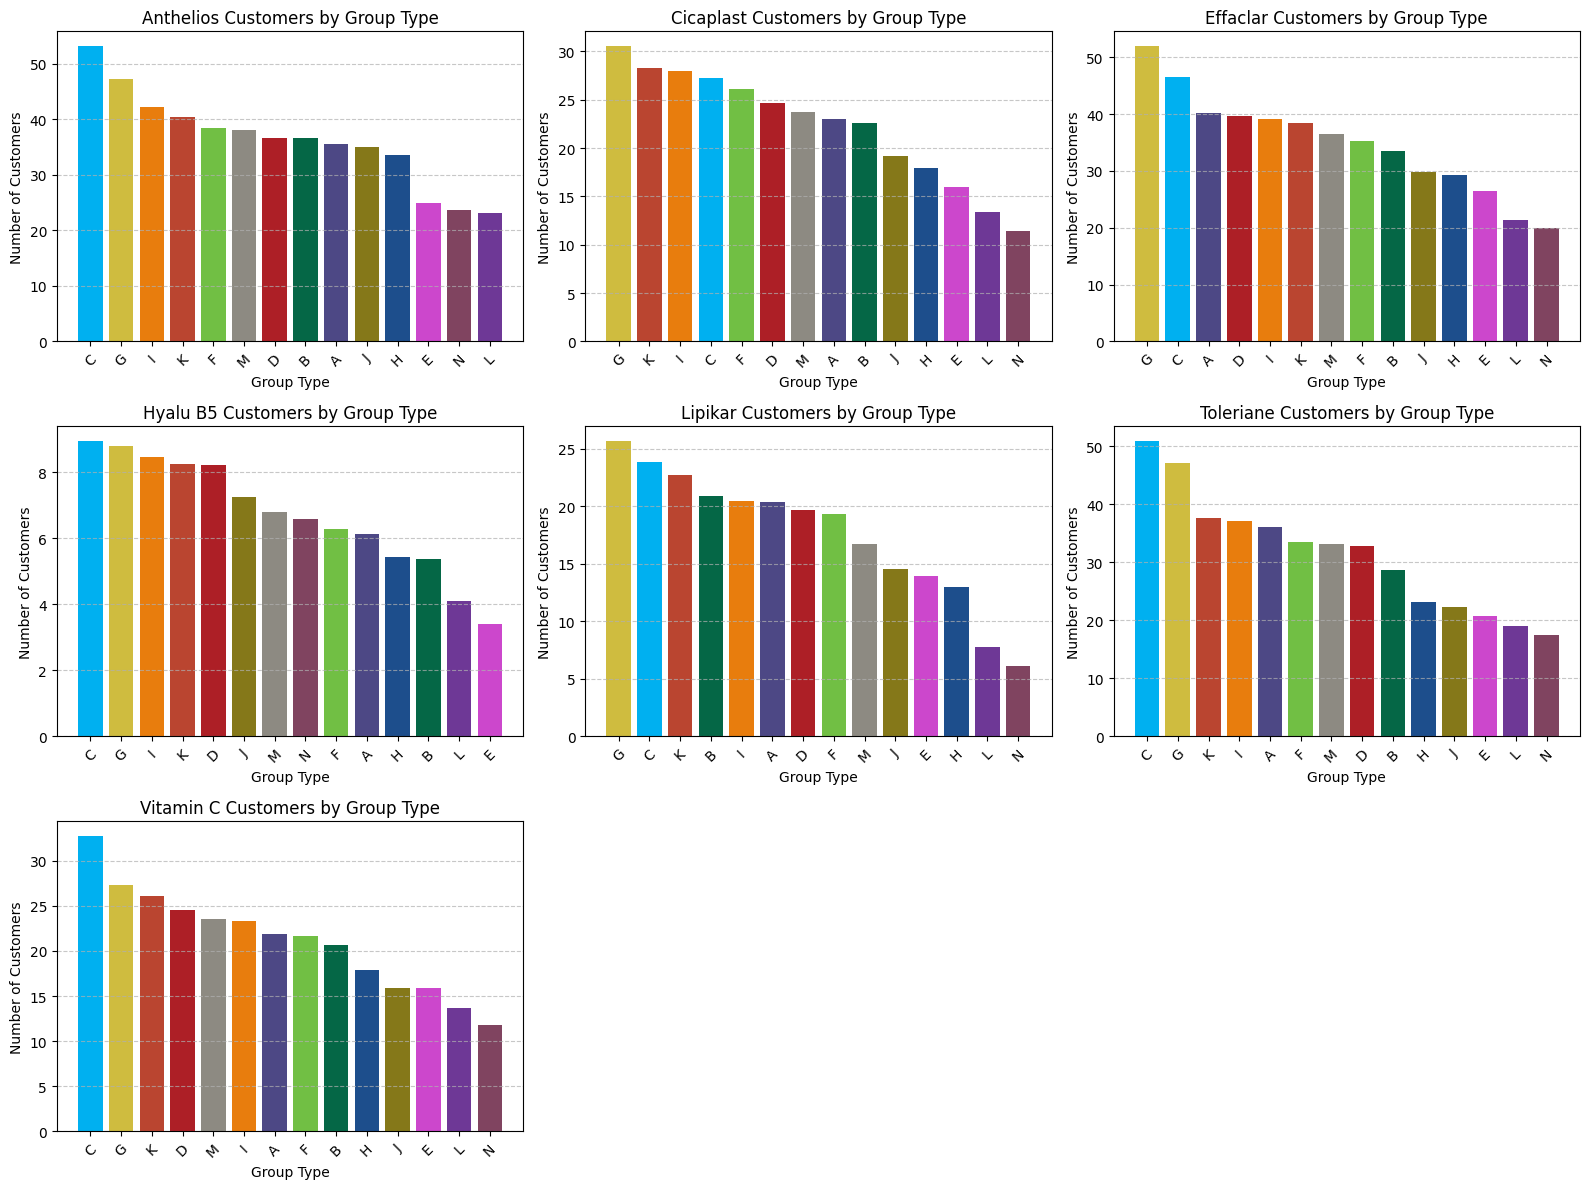

In [22]:
# Define the group types and assign colors with Group A set to #4D4885
group_colors = {
    'A': '#4D4885',  # Specified color for Group A
    'B': '#056746',  # Distinct colors for remaining groups
    'C': '#00B0F0',
    'D': '#AD1F26',
    'E': '#CC47CC',
    'F': '#71BF44',
    'G': '#CFBC3F',
    'H': '#1D4E8C',
    'I': '#E87D0D',
    'J': '#857819',
    'K': '#BA4530',
    'L': '#6E3896',
    'M': '#8D8A82',
    'N': '#804460'
}

# Define the brands for plotting
brands = ['Anthelios', 'Cicaplast', 'Effaclar', 'Hyalu B5', 'Lipikar', 'Toleriane', 'Vitamin C']

# Create a figure for bar charts
plt.figure(figsize=(16, 12))

# Create a bar chart for each brand, sorted from high to low
for i, brand in enumerate(brands):
    # Sort the data for the current brand from high to low
    sorted_data = group_approximation[['Group_Type', brand]].sort_values(by=brand, ascending=False)

    # Extract sorted group types and their corresponding customer counts
    sorted_group_types = sorted_data['Group_Type']
    sorted_customer_counts = sorted_data[brand]

    # Plot the sorted bar chart for the current brand
    plt.subplot(3, 3, i + 1)  # Arrange subplots in a 3x3 grid
    plt.bar(sorted_group_types, sorted_customer_counts, color=[group_colors[group] for group in sorted_group_types])
    plt.title(f'{brand} Customers by Group Type')
    plt.xlabel('Group Type')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap and display the charts
plt.tight_layout()
plt.show()


### III. Analysis of binary variables (output)

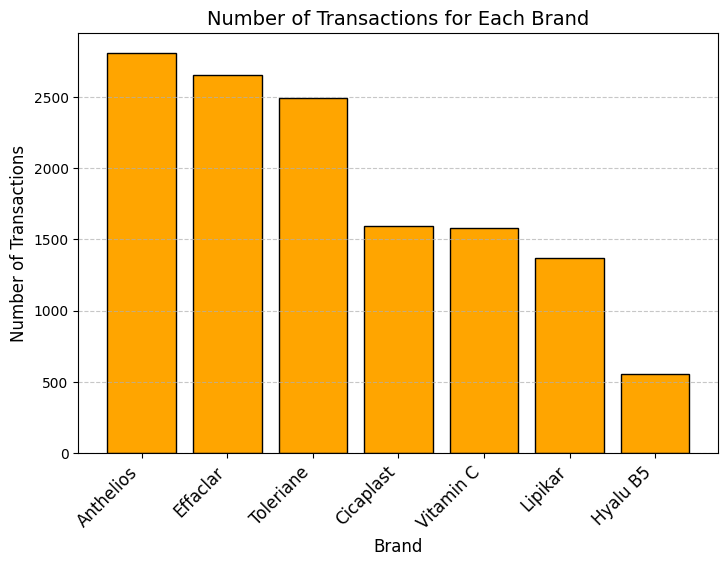

In [23]:
# Identify all columns that contain '_Output'
output_columns = [col for col in data.columns if '_Output' in col]

# Calculate the sum of values for each '_Output' column and sort from highest to lowest
output_sums = data[output_columns].sum().sort_values(ascending=False)

# Clean the column labels by removing 'Brand Description_' and '_Output'
cleaned_labels = [col.replace('Brand Description_', '').replace('_Output', '') for col in output_sums.index]

# Create a formatted bar chart
plt.figure(figsize=(8, 6))
plt.bar(cleaned_labels, output_sums, color='orange', edgecolor='black')
plt.title('Number of Transactions for Each Brand', fontsize=14)
plt.xlabel('Brand',fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9)
plt.savefig('transactions_per_brand.pdf')
plt.show()

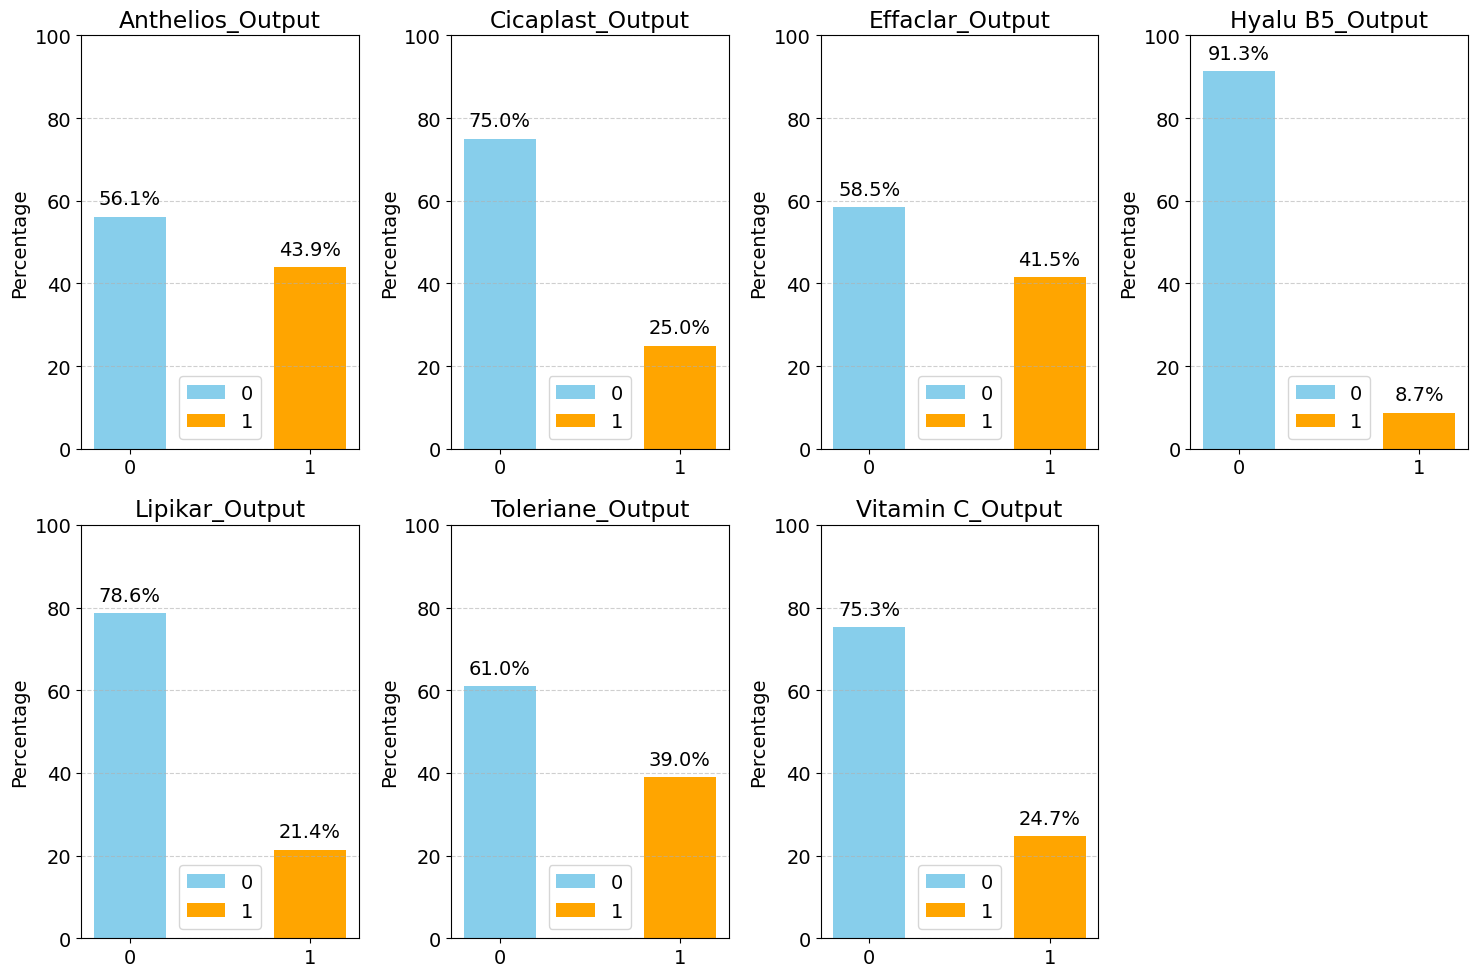

In [24]:
# Adjust figure size and font size
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 14})

# Loop through each output variable and create a bar chart
for i, output in enumerate(output_columns):
    plt.subplot(2, 4, i + 1)

    # Calculate the percentage of 1's and 0's
    counts = data[output].value_counts(normalize=True) * 100
    counts = counts.reindex([0, 1], fill_value=0)

    # Create side-by-side bar chart
    bars_0 = plt.bar([0], [counts[0]], width=0.4, label='0', color='skyblue')
    bars_1 = plt.bar([1], [counts[1]], width=0.4, label='1', color='orange')

    # Add percentage labels above the bars
    for bar in bars_0:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{bar.get_height():.1f}%', ha='center', va='bottom')
    for bar in bars_1:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{bar.get_height():.1f}%', ha='center', va='bottom')

    # Format the plot
    plt.xticks([0, 1], ['0', '1'])  # Labels for the bars
    plt.ylabel('Percentage')
    plt.title(output.title().replace('Brand Description_', ''))
    plt.ylim(0, 100)  # Set the y-axis scale to be the same for all charts
    plt.legend(loc='lower center')
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add light gridlines on the y-axis

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

### IV. Correlation Analysis

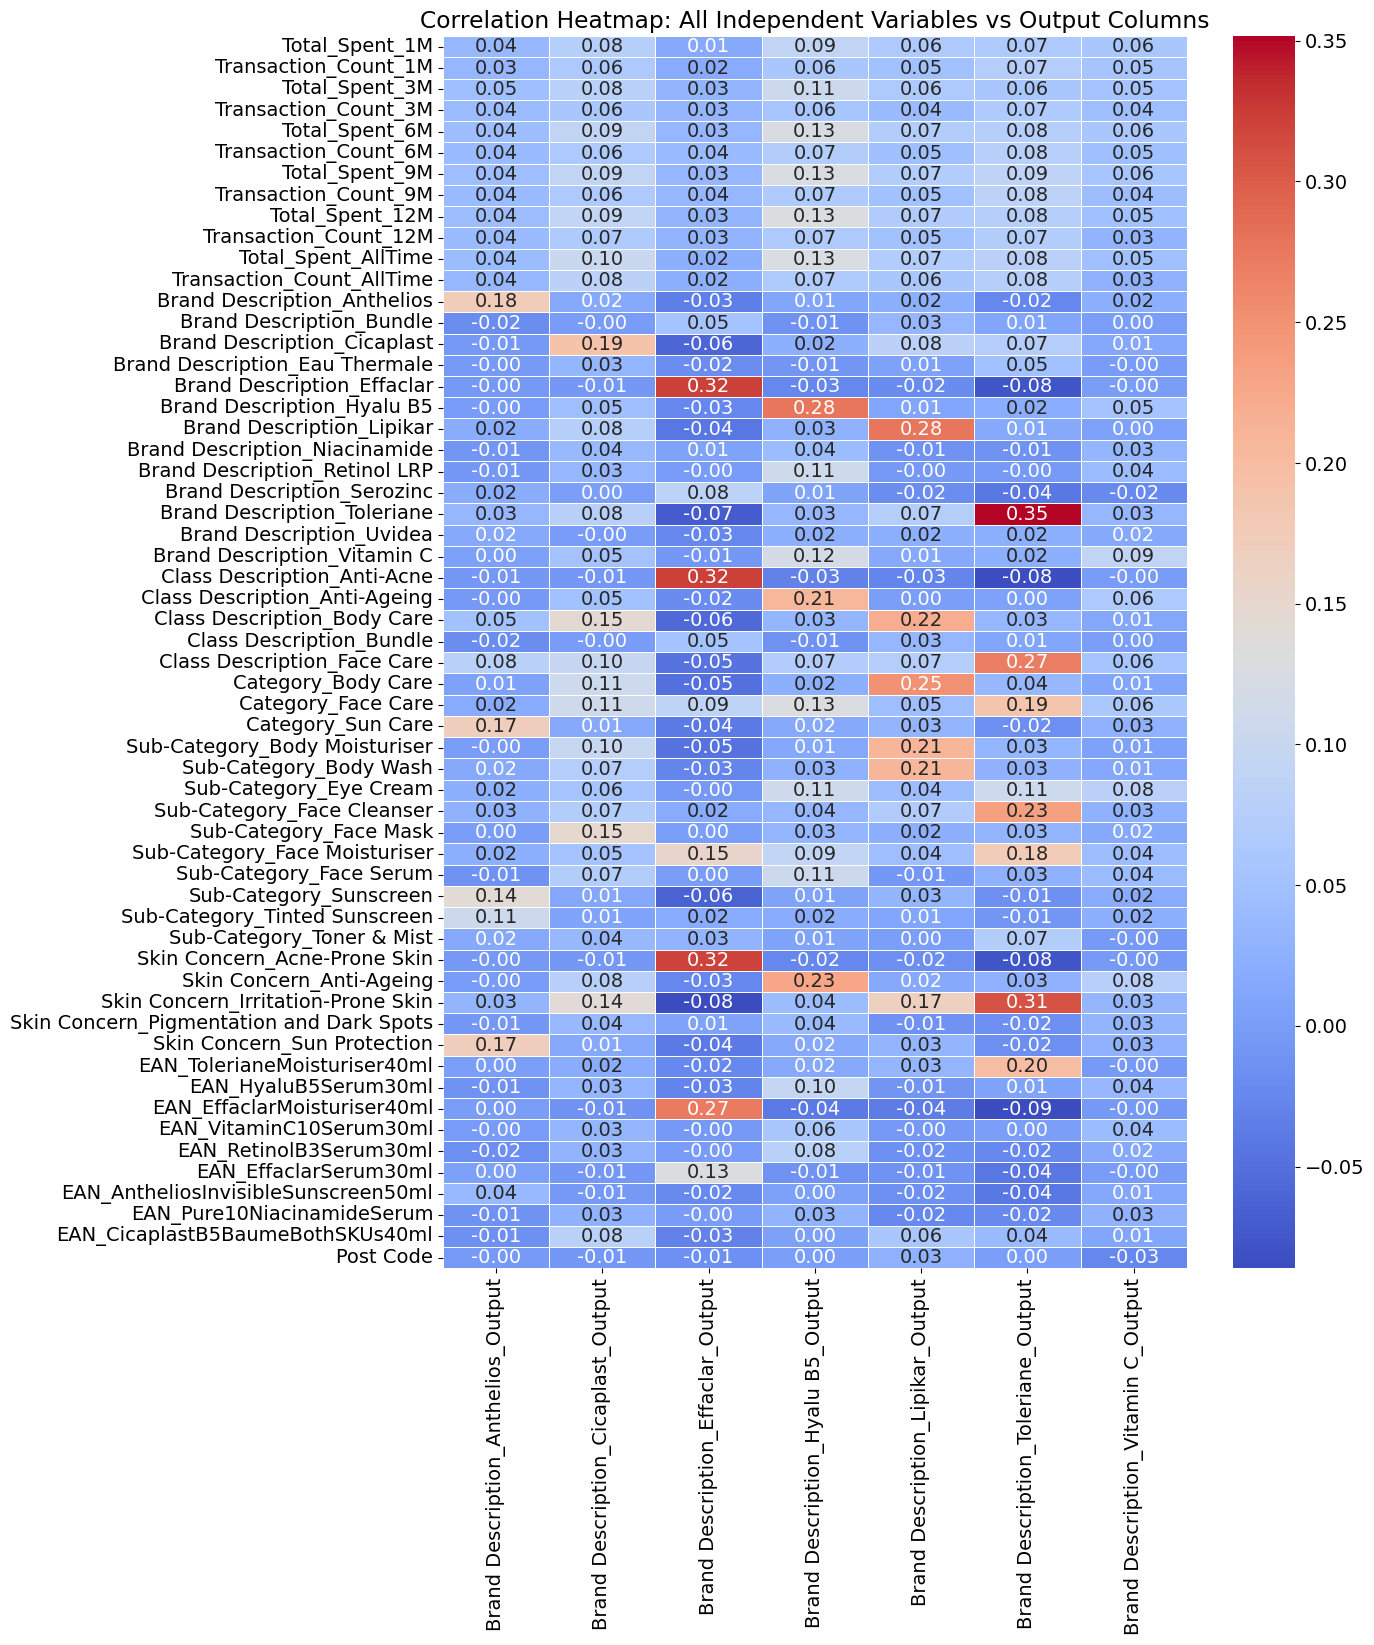

In [25]:
# List of output columns
output_columns = [
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output',
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output'
]

# Filter out independent variables excluding output columns and specific variables to remove
# Also remove columns that contain 'log_', end with 'Count', or end with 'Spend'
independent_columns = [
    col for col in data.columns
    if col not in output_columns
    and not col.startswith('log_')
    and not col.endswith('count')
    and not col.endswith('spend')
]

# Create a dataframe with the filtered independent variables and output columns
correlation_data = data[independent_columns + output_columns]

# Perform the correlation analysis
correlation_matrix = correlation_data.corr()

# Remove only the rows corresponding to the output columns from the correlation matrix
correlation_matrix_filtered = correlation_matrix[output_columns].drop(output_columns, axis=0, errors='ignore')

# Plotting the heatmap with a taller figure
plt.figure(figsize=(12, 16))  # Increase the height to 16 to avoid cutting off rows
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: All Independent Variables vs Output Columns")
plt.show()

In [26]:
corr = data.corr(numeric_only=True)['Brand Description_Anthelios_Output']
corr[np.abs(corr) > 0.1].sort_values(ascending=False)

Brand Description_Anthelios_Output    1.000000
Brand Description_Anthelios           0.175146
Category_Sun Care                     0.169639
Skin Concern_Sun Protection           0.169639
Sub-Category_Sunscreen                0.141770
Brand Description_Cicaplast_Output    0.126108
Sub-Category_Tinted Sunscreen         0.105733
Name: Brand Description_Anthelios_Output, dtype: float64

In [27]:
corr = data.corr(numeric_only=True)['Brand Description_Cicaplast_Output']
corr[(np.abs(corr) > 0.13) | (np.abs(corr) < -0.13)].sort_values(ascending=False)

Brand Description_Cicaplast_Output    1.000000
Brand Description_Cicaplast           0.190192
Brand Description_Hyalu B5_Output     0.186089
Sub-Category_Face Mask                0.148156
Class Description_Body Care           0.145178
Skin Concern_Irritation-Prone Skin    0.140006
Brand Description_Lipikar_Output      0.131914
Name: Brand Description_Cicaplast_Output, dtype: float64

In [28]:
corr = data.corr(numeric_only=True)['Brand Description_Effaclar_Output']
corr[(np.abs(corr) > 0.2) | (np.abs(corr) < -0.2)].sort_values(ascending=False)

Brand Description_Effaclar_Output    1.000000
Class Description_Anti-Acne          0.321141
Brand Description_Effaclar           0.320822
Skin Concern_Acne-Prone Skin         0.319745
EAN_EffaclarMoisturiser40ml          0.271398
Name: Brand Description_Effaclar_Output, dtype: float64

In [29]:
corr = data.corr(numeric_only=True)['Brand Description_Hyalu B5_Output']
corr[(np.abs(corr) > 0.2) | (np.abs(corr) < -0.2)].sort_values(ascending=False)

Brand Description_Hyalu B5_Output    1.000000
Brand Description_Hyalu B5           0.276862
Skin Concern_Anti-Ageing             0.227799
Class Description_Anti-Ageing        0.206937
Name: Brand Description_Hyalu B5_Output, dtype: float64

In [30]:
corr = data.corr(numeric_only=True)['Brand Description_Lipikar_Output']
corr[(np.abs(corr) > 0.2) | (np.abs(corr) < -0.2)].sort_values(ascending=False)

Brand Description_Lipikar_Output    1.000000
Brand Description_Lipikar           0.276971
Category_Body Care                  0.249684
Class Description_Body Care         0.219521
Sub-Category_Body Wash              0.209531
Sub-Category_Body Moisturiser       0.208668
Name: Brand Description_Lipikar_Output, dtype: float64

In [31]:
corr = data.corr(numeric_only=True)['Brand Description_Toleriane_Output']
corr[(np.abs(corr) > 0.2) | (np.abs(corr) < -0.2)].sort_values(ascending=False)

Brand Description_Toleriane_Output    1.000000
Brand Description_Toleriane           0.351582
Skin Concern_Irritation-Prone Skin    0.307622
Class Description_Face Care           0.269817
Sub-Category_Face Cleanser            0.234007
Name: Brand Description_Toleriane_Output, dtype: float64

In [32]:
corr = data.corr(numeric_only=True)['Brand Description_Vitamin C_Output']
corr[(np.abs(corr) > 0.1) | (np.abs(corr) < -0.1)].sort_values(ascending=False)

Brand Description_Vitamin C_Output    1.000000
Brand Description_Hyalu B5_Output     0.145026
Brand Description_Cicaplast_Output    0.129576
Brand Description_Effaclar_Output     0.105027
Name: Brand Description_Vitamin C_Output, dtype: float64

*Correlations between products

# Feature Engineering

### Brand Diversity

Create a variable that is the sum of all of the brands they purchased (should it be the historical transactions or the output?)

count    6400.000000
mean        2.011563
std         1.396597
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Brands_Purchased, dtype: float64


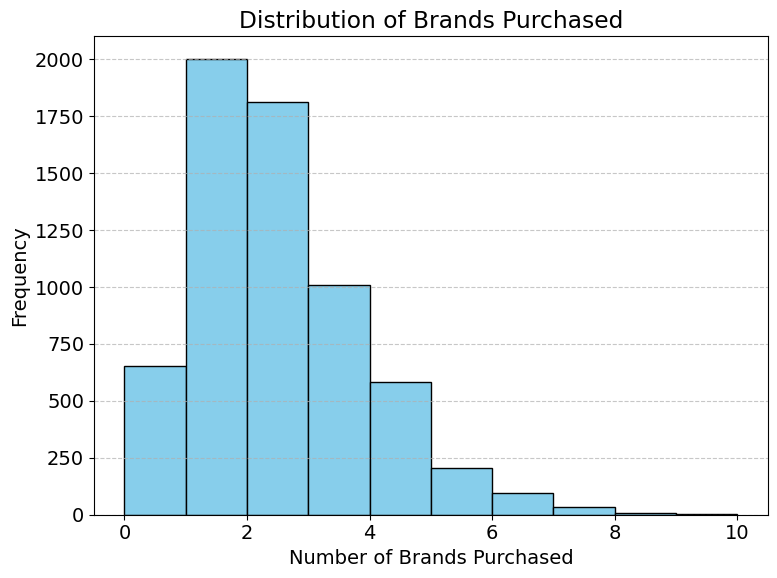

In [33]:
# List of relevant brand description columns
brand_columns = [
    'Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast',
    'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
    'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
    'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea'
]

# Create a new column 'Brands_Purchased' that counts the number of brands purchased by each customer
data['Brands_Purchased'] = data[brand_columns].gt(0).sum(axis=1)

# Print summary statistics for 'Brands_Purchased'
print(data['Brands_Purchased'].describe())

# Plot a histogram of the 'Brands_Purchased' column
plt.figure(figsize=(8, 6))
plt.hist(data['Brands_Purchased'], bins=range(int(data['Brands_Purchased'].min()), int(data['Brands_Purchased'].max()) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Brands Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Brands Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


count    6400.000000
mean        2.041406
std         1.391490
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         7.000000
Name: Brands_Purchased_Output, dtype: float64


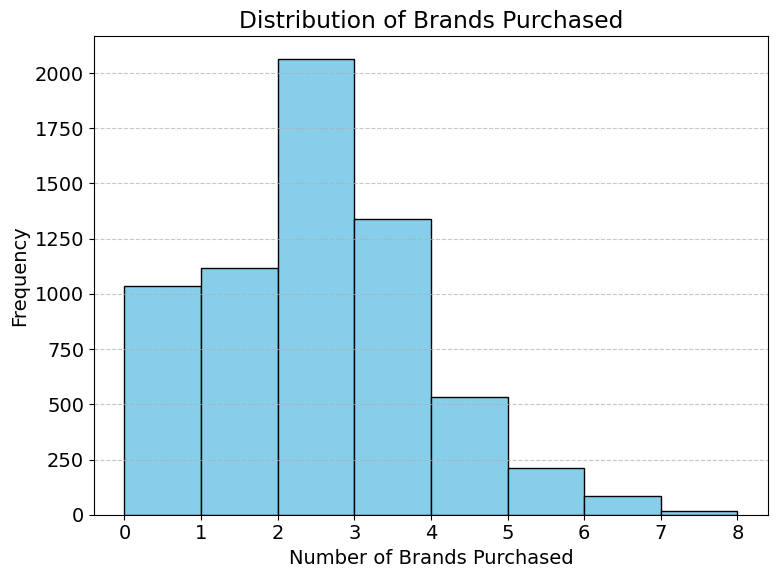

In [34]:
# Select columns that end with '_Output'
output_columns = [col for col in data.columns if col.endswith('_Output')]

# Create a new column 'Brands_Purchased' that sums across the selected binary columns
data['Brands_Purchased_Output'] = data[output_columns].sum(axis=1)

# Print summary statistics for 'Brands_Purchased'
print(data['Brands_Purchased_Output'].describe())

# Plot a histogram of the 'Brands_Purchased' column
plt.figure(figsize=(8, 6))
plt.hist(data['Brands_Purchased_Output'], bins=range(int(data['Brands_Purchased_Output'].min()), int(data['Brands_Purchased_Output'].max()) + 2), color='skyblue', edgecolor='black')
plt.xlabel('Number of Brands Purchased')
plt.ylabel('Frequency')
plt.title('Distribution of Brands Purchased')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [35]:
# Calculate incremental spend and transactions for each period
data['Incremental_Spent_3M'] = data['Total_Spent_3M']
data['Incremental_Spent_6M'] = data['Total_Spent_6M'] - data['Total_Spent_3M']
data['Incremental_Spent_9M'] = data['Total_Spent_9M'] - data['Total_Spent_6M']
data['Incremental_Spent_12M'] = data['Total_Spent_12M'] - data['Total_Spent_9M']

data['Incremental_Transactions_3M'] = data['Transaction_Count_3M']
data['Incremental_Transactions_6M'] = data['Transaction_Count_6M'] - data['Transaction_Count_3M']
data['Incremental_Transactions_9M'] = data['Transaction_Count_9M'] - data['Transaction_Count_6M']
data['Incremental_Transactions_12M'] = data['Transaction_Count_12M'] - data['Transaction_Count_9M']

# Calculate total spend and total transaction count by summing the incremental values
spend_columns = ['Incremental_Spent_3M', 'Incremental_Spent_6M', 'Incremental_Spent_9M', 'Incremental_Spent_12M']
transaction_columns = ['Incremental_Transactions_3M', 'Incremental_Transactions_6M', 'Incremental_Transactions_9M', 'Incremental_Transactions_12M']

data['Total_Spent'] = data[spend_columns].sum(axis=1)
data['Total_Transactions'] = data[transaction_columns].sum(axis=1)

# Segment into equal-sized bins using pd.qcut
data['Spend_Bin'], spend_bins = pd.qcut(data['Total_Spent'], q=4, retbins=True, labels=False, duplicates='drop')
data['Transaction_Bin'], transaction_bins = pd.qcut(data['Total_Transactions'], q=4, retbins=True, labels=False, duplicates='drop')

# Dynamically create labels for bins
data['Spend_Bin'] = pd.qcut(data['Total_Spent'], q=len(spend_bins)-1, labels=range(1, len(spend_bins)))
data['Transaction_Bin'] = pd.qcut(data['Total_Transactions'], q=len(transaction_bins)-1, labels=range(1, len(transaction_bins)))

# Define a function to segment customers based on their bin
def engagement_segmentation(row):
    if row['Spend_Bin'] == len(spend_bins)-1 and row['Transaction_Bin'] == len(transaction_bins)-1:
        return 'High Engagement'
    elif row['Spend_Bin'] == 1 and row['Transaction_Bin'] == 1:
        return 'Low Engagement'
    else:
        return 'Medium Engagement'

# Apply segmentation to each customer
data['Engagement_Level'] = data.apply(engagement_segmentation, axis=1)

# Summarize the segmentation results
engagement_summary = data.groupby('Engagement_Level').agg({
    'Total_Spent': 'mean',
    'Total_Transactions': 'mean',
}).assign(Customer_Count=lambda x: x.index.map(data['Engagement_Level'].value_counts()))

# Display the segmentation summary
print(engagement_summary)


                   Total_Spent  Total_Transactions  Customer_Count
Engagement_Level                                                  
High Engagement     487.734299            4.097881             991
Low Engagement       34.925433            0.584997            1653
Medium Engagement   171.191025            1.455538            3756


In [36]:
# Print the column names of the DataFrame
print(data.columns)

Index(['Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M',
       'Transaction_Count_3M', 'Total_Spent_6M', 'Transaction_Count_6M',
       'Total_Spent_9M', 'Transaction_Count_9M', 'Total_Spent_12M',
       'Transaction_Count_12M', 'Total_Spent_AllTime',
       'Transaction_Count_AllTime', 'Brand Description_Anthelios',
       'Brand Description_Bundle', 'Brand Description_Cicaplast',
       'Brand Description_Eau Thermale', 'Brand Description_Effaclar',
       'Brand Description_Hyalu B5', 'Brand Description_Lipikar',
       'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
       'Brand Description_Serozinc', 'Brand Description_Toleriane',
       'Brand Description_Uvidea', 'Brand Description_Vitamin C',
       'Class Description_Anti-Acne', 'Class Description_Anti-Ageing',
       'Class Description_Body Care', 'Class Description_Bundle',
       'Class Description_Face Care', 'Category_Body Care',
       'Category_Face Care', 'Category_Sun Care',
       'Sub-C

# Modelling

In [37]:
data.columns

Index(['Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M',
       'Transaction_Count_3M', 'Total_Spent_6M', 'Transaction_Count_6M',
       'Total_Spent_9M', 'Transaction_Count_9M', 'Total_Spent_12M',
       'Transaction_Count_12M', 'Total_Spent_AllTime',
       'Transaction_Count_AllTime', 'Brand Description_Anthelios',
       'Brand Description_Bundle', 'Brand Description_Cicaplast',
       'Brand Description_Eau Thermale', 'Brand Description_Effaclar',
       'Brand Description_Hyalu B5', 'Brand Description_Lipikar',
       'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
       'Brand Description_Serozinc', 'Brand Description_Toleriane',
       'Brand Description_Uvidea', 'Brand Description_Vitamin C',
       'Class Description_Anti-Acne', 'Class Description_Anti-Ageing',
       'Class Description_Body Care', 'Class Description_Bundle',
       'Class Description_Face Care', 'Category_Body Care',
       'Category_Face Care', 'Category_Sun Care',
       'Sub-C

In [38]:
#original
X = data.drop(columns=['Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M',
       'Transaction_Count_3M', 'Total_Spent_6M', 'Transaction_Count_6M',
       'Total_Spent_9M', 'Transaction_Count_9M', 'Total_Spent_12M',
       'Transaction_Count_12M', 'Total_Spent_AllTime','Transaction_Count_AllTime',
       '<1M spend', '1-3M spend',
       '3-6M spend', '6-9M spend', '9-12M spend', '>12M spend', '<1M count',
       '1-3M count', '3-6M count', '6-9M count', '9-12M count', '>12M count',
       'Incremental_Spent_3M',
       'Incremental_Spent_6M', 'Incremental_Spent_9M', 'Incremental_Spent_12M',
       'Incremental_Transactions_3M', 'Incremental_Transactions_6M',
       'Incremental_Transactions_9M', 'Incremental_Transactions_12M',
       'Total_Spent', 'Total_Transactions',
       'Spend_Bin', 'Transaction_Bin',
       'Brand Description_Anthelios_Output',
       'Brand Description_Cicaplast_Output',
       'Brand Description_Effaclar_Output',
       'Brand Description_Hyalu B5_Output', 'Brand Description_Lipikar_Output',
       'Brand Description_Toleriane_Output',
       'Brand Description_Vitamin C_Output','Post Code','Brands_Purchased_Output']) #removed Post Code, Brands_Purchased_Output
y = data[[ 'Brand Description_Anthelios_Output',
       'Brand Description_Cicaplast_Output',
       'Brand Description_Effaclar_Output',
       'Brand Description_Hyalu B5_Output', 'Brand Description_Lipikar_Output',
       'Brand Description_Toleriane_Output',
       'Brand Description_Vitamin C_Output']]

In [39]:
print(X.columns)

Index(['Brand Description_Anthelios', 'Brand Description_Bundle',
       'Brand Description_Cicaplast', 'Brand Description_Eau Thermale',
       'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
       'Brand Description_Lipikar', 'Brand Description_Niacinamide',
       'Brand Description_Retinol LRP', 'Brand Description_Serozinc',
       'Brand Description_Toleriane', 'Brand Description_Uvidea',
       'Brand Description_Vitamin C', 'Class Description_Anti-Acne',
       'Class Description_Anti-Ageing', 'Class Description_Body Care',
       'Class Description_Bundle', 'Class Description_Face Care',
       'Category_Body Care', 'Category_Face Care', 'Category_Sun Care',
       'Sub-Category_Body Moisturiser', 'Sub-Category_Body Wash',
       'Sub-Category_Eye Cream', 'Sub-Category_Face Cleanser',
       'Sub-Category_Face Mask', 'Sub-Category_Face Moisturiser',
       'Sub-Category_Face Serum', 'Sub-Category_Sunscreen',
       'Sub-Category_Tinted Sunscreen', 'Sub-Category_Ton

In [40]:
X = pd.get_dummies(X, columns=['Engagement_Level'])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #training 20%

In [41]:
columns_to_count = [
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output', #highly imbalanced
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output'
]

value_counts_dict = {col: data[col].value_counts() for col in columns_to_count}

for col, counts in value_counts_dict.items():
    print(f"{col}:\n{counts}\n")

Brand Description_Anthelios_Output:
Brand Description_Anthelios_Output
0    3592
1    2808
Name: count, dtype: int64

Brand Description_Cicaplast_Output:
Brand Description_Cicaplast_Output
0    4803
1    1597
Name: count, dtype: int64

Brand Description_Effaclar_Output:
Brand Description_Effaclar_Output
0    3746
1    2654
Name: count, dtype: int64

Brand Description_Hyalu B5_Output:
Brand Description_Hyalu B5_Output
0    5841
1     559
Name: count, dtype: int64

Brand Description_Lipikar_Output:
Brand Description_Lipikar_Output
0    5029
1    1371
Name: count, dtype: int64

Brand Description_Toleriane_Output:
Brand Description_Toleriane_Output
0    3904
1    2496
Name: count, dtype: int64

Brand Description_Vitamin C_Output:
Brand Description_Vitamin C_Output
0    4820
1    1580
Name: count, dtype: int64



In [42]:
columns_to_count = [
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output',
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output'
]

# Getting value counts for each specified column
value_counts_dict = {col: data[col].value_counts() for col in columns_to_count}

# Preparing data for a table format
table_data = {}
for col, counts in value_counts_dict.items():
    for index, count in counts.items():
        if index not in table_data:
            table_data[index] = [0] * len(columns_to_count)
        table_data[index][columns_to_count.index(col)] = count

# Creating a DataFrame from the table data
table_df = pd.DataFrame(table_data, index=columns_to_count).fillna(0).astype(int)
table_df['Ratio'] = table_df[0] / table_df[1].replace(0, 1)
#table_df.index.name = 'Brands'

# Displaying the table
table_df

0     1      Ratio
Brand Description_Anthelios_Output  3592  2808   1.279202
Brand Description_Cicaplast_Output  4803  1597   3.007514
Brand Description_Effaclar_Output   3746  2654   1.411454
Brand Description_Hyalu B5_Output   5841   559  10.449016
Brand Description_Lipikar_Output    5029  1371   3.668125
Brand Description_Toleriane_Output  3904  2496   1.564103
Brand Description_Vitamin C_Output  4820  1580   3.050633

In [43]:
#stratified split Hyalu B5
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data[['Brand Description_Cicaplast_Output','Brand Description_Hyalu B5_Output','Brand Description_Lipikar_Output','Brand Description_Vitamin C_Output' ]], random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data[['Brand Description_Hyalu B5_Output']], random_state=0)

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## Multi-output Classification Model

In [46]:
logistic_model = LogisticRegression(solver='lbfgs', max_iter=1000)
multi_output_model = MultiOutputClassifier(logistic_model, n_jobs=-1)
multi_output_model.fit(X_train_scaled, y_train)

y_pred_prob = multi_output_model.predict_proba(X_test_scaled)
y_pred_prob = np.column_stack([prob[:, 1] for prob in y_pred_prob])
print(y_pred_prob)

[[0.46425841 0.41257126 0.23379527 ... 0.37224885 0.74845759 0.63515445]
 [0.1203899  0.3182637  0.44957881 ... 0.28163704 0.56543547 0.42861317]
 [0.55462157 0.19217179 0.29166232 ... 0.16668566 0.22087197 0.24254826]
 ...
 [0.39600395 0.27142319 0.40503826 ... 0.19192166 0.3383517  0.37458766]
 [0.62250239 0.24834098 0.34931188 ... 0.23365495 0.56774577 0.32742277]
 [0.4469113  0.28360348 0.30120426 ... 0.2064236  0.32546137 0.6224057 ]]


In [47]:
brand_description_names = y.columns
predictions_df = pd.DataFrame(y_pred_prob, columns=brand_description_names)
print(predictions_df.head())

   Brand Description_Anthelios_Output  Brand Description_Cicaplast_Output  \
0                            0.464258                            0.412571   
1                            0.120390                            0.318264   
2                            0.554622                            0.192172   
3                            0.423145                            0.251241   
4                            0.486278                            0.213008   

   Brand Description_Effaclar_Output  Brand Description_Hyalu B5_Output  \
0                           0.233795                           0.218414   
1                           0.449579                           0.070940   
2                           0.291662                           0.048591   
3                           0.372486                           0.086966   
4                           0.371769                           0.047012   

   Brand Description_Lipikar_Output  Brand Description_Toleriane_Output  \
0          

In [48]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, classification_report, confusion_matrix

accuracies = []
f1_scores = []
rf_recalls = []
precision_scores = []
auc_scores = []

for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int))  # Convert probabilities to binary outcomes using 0.5 as the threshold
    accuracies.append(accuracy)
    f1 = f1_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    f1_scores.append(f1)
    rf_recall = recall_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)
    precision = precision_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    precision_scores.append(precision)
    auc = roc_auc_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    auc_scores.append(auc)
    cm = confusion_matrix(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5))
    print(f"Confusion Matrix for target {y_test.columns[i]}:\n{cm}\n")

print(f"Average Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Average F1-Score: {sum(f1_scores)/len(f1_scores):.4f}")
print(f"Average Recall: {sum(rf_recalls)/len(rf_recalls):.4f}")
print(f"Average AUC: {sum(auc_scores)/len(auc_scores):.4f}")
print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.4f}")

for i in range(y_test.shape[1]):
    print(f"Classification report for target {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int)))

Confusion Matrix for target Brand Description_Anthelios_Output:
[[607  93]
 [423 157]]

Confusion Matrix for target Brand Description_Cicaplast_Output:
[[955  21]
 [281  23]]

Confusion Matrix for target Brand Description_Effaclar_Output:
[[690  72]
 [295 223]]

Confusion Matrix for target Brand Description_Hyalu B5_Output:
[[1165    3]
 [  97   15]]

Confusion Matrix for target Brand Description_Lipikar_Output:
[[988  22]
 [232  38]]

Confusion Matrix for target Brand Description_Toleriane_Output:
[[711  75]
 [269 225]]

Confusion Matrix for target Brand Description_Vitamin C_Output:
[[972   9]
 [292   7]]

Average Accuracy: 0.7562
Average F1-Score: 0.7096
Average Recall: 0.7562
Average AUC: 0.5823
Average Precision: 0.7368
Classification report for target Brand Description_Anthelios_Output:
              precision    recall  f1-score   support

           0       0.59      0.87      0.70       700
           1       0.63      0.27      0.38       580

    accuracy                    

## Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=56, random_state=0) #criterion = 'entropy'
#decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_features=56, min_samples_leaf=38, random_state=0)
multi_output_dt = MultiOutputClassifier(decision_tree)
multi_output_dt.fit(X_train_scaled, y_train)

#stimator__min_samples_leaf': 38, 'estimator__max_features': 56

# Make predictions
dt_y_pred_prob = multi_output_dt.predict_proba(X_test_scaled)
dt_y_pred_prob = np.column_stack([prob[:, 1] for prob in dt_y_pred_prob])

# Calculate accuracies and F1-scores for each target variable
from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracies = []
f1_scores = []
rf_recalls = []
precision_scores = []
auc_scores = []

for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int))
    accuracies.append(accuracy)
    f1 = f1_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    f1_scores.append(f1)
    rf_recall = recall_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)
    precision = precision_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    precision_scores.append(precision)
    auc = roc_auc_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    auc_scores.append(auc)

# Print average accuracy and F1-score
print(f"Average Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Average F1-Score: {sum(f1_scores)/len(f1_scores):.4f}")
print(f"Average Recall: {sum(rf_recalls)/len(rf_recalls):.4f}")
print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.4f}")
print(f"Average AUC: {sum(auc_scores)/len(auc_scores):.4f}")

# Print classification reports for each target variable
for i in range(y_test.shape[1]):
    print(f"\
Classification report for target {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int)))

Average Accuracy: 0.7544
Average F1-Score: 0.7125
Average Recall: 0.7544
Average Precision: 0.7262
Average AUC: 0.5823
Classification report for target Brand Description_Anthelios_Output:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       700
           1       0.60      0.30      0.40       580

    accuracy                           0.59      1280
   macro avg       0.60      0.57      0.55      1280
weighted avg       0.60      0.59      0.56      1280

Classification report for target Brand Description_Cicaplast_Output:
              precision    recall  f1-score   support

           0       0.77      0.98      0.87       976
           1       0.61      0.08      0.13       304

    accuracy                           0.77      1280
   macro avg       0.69      0.53      0.50      1280
weighted avg       0.73      0.77      0.69      1280

Classification report for target Brand Description_Effaclar_Output:
              precisi

In [50]:
#original
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=38, random_state=0)
multi_output_dt = MultiOutputClassifier(decision_tree)
multi_output_dt.fit(X_train_scaled, y_train)

# Feature names and class names
feature_names = [
    'Total_Spent_1M', 'Transaction_Count_1M', 'Total_Spent_3M', 'Transaction_Count_3M',
    'Total_Spent_6M', 'Transaction_Count_6M', 'Total_Spent_9M', 'Transaction_Count_9M',
    'Total_Spent_12M', 'Transaction_Count_12M', 'Total_Spent_AllTime', 'Transaction_Count_AllTime',
    'Brand Description_Anthelios', 'Brand Description_Bundle', 'Brand Description_Cicaplast',
    'Brand Description_Eau Thermale', 'Brand Description_Effaclar', 'Brand Description_Hyalu B5',
    'Brand Description_Lipikar', 'Brand Description_Niacinamide', 'Brand Description_Retinol LRP',
    'Brand Description_Serozinc', 'Brand Description_Toleriane', 'Brand Description_Uvidea',
    'Brand Description_Vitamin C', 'Class Description_Anti-Acne', 'Class Description_Anti-Ageing',
    'Class Description_Body Care', 'Class Description_Bundle', 'Class Description_Face Care',
    'Category_Body Care', 'Category_Face Care', 'Category_Sun Care', 'Sub-Category_Body Moisturiser',
    'Sub-Category_Body Wash', 'Sub-Category_Eye Cream', 'Sub-Category_Face Cleanser',
    'Sub-Category_Face Mask', 'Sub-Category_Face Moisturiser', 'Sub-Category_Face Serum',
    'Sub-Category_Sunscreen', 'Sub-Category_Tinted Sunscreen', 'Sub-Category_Toner & Mist',
    'Skin Concern_Acne-Prone Skin', 'Skin Concern_Anti-Ageing', 'Skin Concern_Irritation-Prone Skin',
    'Skin Concern_Pigmentation and Dark Spots', 'Skin Concern_Sun Protection',
    'EAN_TolerianeMoisturiser40ml', 'EAN_HyaluB5Serum30ml', 'EAN_EffaclarMoisturiser40ml',
    'EAN_VitaminC10Serum30ml', 'EAN_RetinolB3Serum30ml', 'EAN_EffaclarSerum30ml',
    'EAN_AntheliosInvisibleSunscreen50ml', 'EAN_Pure10NiacinamideSerum',
    'EAN_CicaplastB5BaumeBothSKUs40ml', 'Post Code','Output 1', 'Output 2'
    '<1M spend', '1-3M spend', '3-6M spend', '6-9M spend', '9-12M spend', '>12M spend',
    '<1M count', '1-3M count', '3-6M count', '6-9M count', '9-12M count', '>12M count',
    'Brands_Purchased', 'Incremental_Spent_3M', 'Incremental_Spent_6M', 'Incremental_Spent_9M',
    'Incremental_Spent_12M', 'Incremental_Transactions_3M', 'Incremental_Transactions_6M',
    'Incremental_Transactions_9M', 'Incremental_Transactions_12M', 'Total_Spent',
    'Total_Transactions', 'Spend_Bin', 'Transaction_Bin', 'Engagement_Level'
]

#drop 'Brands_Purchased_Output'

class_names = ['Anthelios', 'Cicaplast', 'Effaclar', 'Hyalu B5', 'Lipikar', 'Toleriane', 'Vitamin C']

# Loop through each tree in the multi-output classifier and visualize it
for idx, estimator in enumerate(multi_output_dt.estimators_):
    dot_data = export_graphviz(estimator,
                               max_depth=4,
                               impurity=False,
                               feature_names=feature_names,
                               class_names=class_names,
                               rounded=True,
                               filled=True)

    # Generate and render the graph for each output
    graph = graphviz.Source(dot_data)
    graph.render(f'Tree_{idx}', format='pdf', cleanup=True)

ValueError: Length of feature_names, 85 does not match number of features, 49

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Create the multi-output classifier
multi_output_dt = MultiOutputClassifier(decision_tree)

# Define the parameter grid
parameters = {
    'estimator__min_samples_leaf': np.arange(1, 50),
    'estimator__max_features': np.arange(1, X_train_scaled.shape[1] + 1)  # Use shape for number of features
}

# Set up the randomized search
random_search = RandomizedSearchCV(multi_output_dt,  # Use the multi-output classifier
                                   parameters,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=0,
                                   n_jobs=-1)  # Use all available cores

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)  # Fit the model on your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# If you want to use the best estimator
best_estimator = random_search.best_estimator_ #{'estimator__min_samples_leaf': 38, 'estimator__max_features': 56}

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
#visualization
feature_importances = multi_output_dt.estimators_[0].feature_importances_

# Assuming X_train_scaled is a DataFrame and has feature names
features = X_train_scaled_df.columns  # Get feature names

# Create a DataFrame for better visualization
importance_df = pd.Series(feature_importances, index=features).sort_values(ascending=False)

# Plotting feature importance
plt.figure(figsize=(9, 6))
plt.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Top 10 Feature Importance for\nDecision Tree Classifier', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.savefig('feature_importances_decision_tree.pdf')  # Save the figure
plt.show()

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

#bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'), n_estimators=1000, random_state=0)
#bag.fit(X_train_scaled, y_train)

In [ ]:
# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are defined

# Create the Bagging classifier with a shallow Decision Tree
# hyperparameter optimisation using RandomizedSearchCV done
#bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=9,), n_estimators=100, n_jobs=-1, random_state=0) #based on RandomizedSearchCV
bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_leaf=38,max_features=56), n_estimators=100, n_jobs=-1, random_state=0)
#{'estimator__min_samples_leaf': 38, 'estimator__max_features': 56}

multi_output_dt = MultiOutputClassifier(bag)

# Fit the model
multi_output_dt.fit(X_train_scaled, y_train)

# Make predictions (probabilities)
dt_y_pred_prob = multi_output_dt.predict_proba(X_test_scaled)
dt_y_pred_prob = np.column_stack([prob[:, 1] for prob in dt_y_pred_prob])

# Initialize metrics lists
accuracies = []
f1_scores = []
rf_recalls = []
precision_scores = []
auc_scores = []

# Calculate metrics in a single loop

for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int))
    accuracies.append(accuracy)

    f1 = f1_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    f1_scores.append(f1)

    rf_recall = recall_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)

    precision = precision_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    precision_scores.append(precision)

    auc = roc_auc_score(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    auc_scores.append(auc)

    cm = confusion_matrix(y_test.iloc[:, i], (y_pred_prob[:, i] > 0.5).astype(int))
    print(f"Confusion Matrix for target {y_test.columns[i]}:\n{cm}\n")


# Print average metrics
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average Recall: {np.mean(rf_recalls):.4f}")
print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.4f}")
print(f"Average AUC: {np.mean(auc_scores):.4f}")

# Print classification reports for each target variable
for i in range(y_test.shape[1]):
    print(f"Classification report for target {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int)))

In [ ]:
#dont run super slow
#pip install optuna
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini']) #cost function use both
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20) #how to stop tree
    max_features = trial.suggest_int('max_features', 1, 20) #K = 1-20


    model = RandomForestClassifier(n_estimators = 100,  #don't use too big bootstrap sample avoid high computational cost (100-200 is enough)
                                  criterion = criterion,
                                  max_features = max_features,
                                  min_samples_leaf= min_samples_leaf,
                                  random_state = 1)

    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    loss = 1 - np.mean(scores)

    return loss

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials = 100, timeout = 120)

In [ ]:
params = study.best_params
params #{'criterion': 'gini', 'min_samples_leaf': 9, 'max_features': 6}

In [ ]:
# Create the Bagging classifier with a shallow Decision Tree
bag = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=5), n_estimators=100, n_jobs=-1, random_state=0)
multi_output_dt = MultiOutputClassifier(bag)

# Fit the model
multi_output_dt.fit(X_train_scaled, y_train)

# Define the parameter grid
parameters = {
    'estimator__min_samples_leaf': np.arange(1, 50),
    'estimator__max_features': np.arange(1, X_train_scaled.shape[1] + 1)  # Use shape for number of features
}

# Set up the randomized search
random_search = RandomizedSearchCV(multi_output_dt,  # Use the multi-output classifier
                                   parameters,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=0,
                                   n_jobs=-1)  # Use all available cores

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)  # Fit the model on your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

#{'estimator__min_samples_leaf': 38, 'estimator__max_features': 56}

In [ ]:
X_train_scaled_df

In [ ]:
# Initialize and fit a multi-output classifier
multi_output_dt = MultiOutputClassifier(DecisionTreeClassifier())
multi_output_dt.fit(X_train_scaled_df, y_train)

# Visualize feature importances for the first estimator in the MultiOutputClassifier
estimator_index = 0  # Change this to visualize different outputs

# Check if the specified estimator index exists
if len(multi_output_dt.estimators_) > estimator_index:
    estimator = multi_output_dt.estimators_[estimator_index]

    # Check if the estimator has the feature_importances_ attribute
    if hasattr(estimator, 'feature_importances_'):
        feature_importances = estimator.feature_importances_

        # Create a Series for the importances with feature names
        importance_df = pd.Series(feature_importances, index=X_train_scaled_df.columns).sort_values(ascending=False)

        # Plotting feature importance
        plt.figure(figsize=(9, 6))
        plt.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.title(f'Top 10 Feature Importance for\nDecision Tree Classifier Output {estimator_index + 1}', fontsize=14)
        plt.gca().invert_yaxis()  # Invert y-axis for better readability
        plt.tight_layout()
        plt.savefig(f'feature_importances_decision_tree_output_{estimator_index + 1}.pdf')  # Save the figure
        plt.show()
    else:
        print("Selected estimator does not have feature importances.")
else:
    print("No estimator found at the specified index.")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.multioutput import MultiOutputClassifier
rf_classifier = RandomForestClassifier(criterion='gini', max_features=34, min_samples_leaf=37, random_state=0)
multi_output_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

#{'estimator__min_samples_leaf': 37, 'estimator__max_features': 34}

# Train the Random Forest model
multi_output_rf.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred_prob = multi_output_rf.predict_proba(X_test_scaled)
rf_y_pred_prob = np.column_stack([prob[:, 1] for prob in rf_y_pred_prob])

# Evaluate the model
rf_accuracies = []
rf_f1_scores = []
rf_recalls = []
precision_scores = []
auc_scores = []

for i in range(y_test.shape[1]):
    rf_accuracy = accuracy_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int))
    rf_accuracies.append(rf_accuracy)

    rf_f1 = f1_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_f1_scores.append(rf_f1)

    rf_recall = recall_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)

    precision = precision_score(y_test.iloc[:, i], (y_pred_prob[:, i]> 0.5).astype(int), average='weighted')
    precision_scores.append(precision)

    auc = roc_auc_score(y_test.iloc[:, i], (y_pred_prob[:, i]> 0.5).astype(int), average='weighted')
    auc_scores.append(auc)

    cm = confusion_matrix(y_test.iloc[:, i], (y_pred_prob[:, i]> 0.5).astype(int))
    print(f"Confusion Matrix for target {y_test.columns[i]}:\n{cm}\n")

# Print the evaluation results
print("Random Forest Model Evaluation:")
print("Average Accuracy: " + str(sum(rf_accuracies)/len(rf_accuracies)))
print("Average F1-Score: " + str(sum(rf_f1_scores)/len(rf_f1_scores)))
print("Average Recall: " + str(sum(rf_recalls)/len(rf_recalls)))
print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.4f}")
print(f"Average AUC: {sum(auc_scores)/len(auc_scores):.4f}")

# Display classification report for each target
for i in range(y_test.shape[1]):
    print("Classification report for target " + y_test.columns[i] + ":")
    print(classification_report(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int)))

In [ ]:
pip install optuna

In [ ]:
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score

def objective(trial):

    criterion = trial.suggest_categorical('criterion', ['entropy', 'gini']) #cost function use both
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20) #how to stop tree
    max_features = trial.suggest_int('max_features', 1, 20) #K = 1-20


    model = RandomForestClassifier(n_estimators = 100,  #don't use too big bootstrap sample avoid high computational cost (100-200 is enough)
                                  criterion = criterion,
                                  max_features = max_features,
                                  min_samples_leaf= min_samples_leaf,
                                  random_state = 1)

    scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy')
    loss = 1 - np.mean(scores)

    return loss

sampler = TPESampler(seed=42)
study = optuna.create_study(direction='minimize', sampler=sampler)
study.optimize(objective, n_trials = 100, timeout = 120)

In [ ]:
params = study.best_params
params #{'criterion': 'gini', 'min_samples_leaf': 9, 'max_features': 6}

In [ ]:
# Create the Bagging classifier with a shallow Decision Tree
rf_classifier = RandomForestClassifier(criterion='entropy', max_depth=5)
multi_output_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Fit the model
multi_output_rf.fit(X_train_scaled, y_train)

# Define the parameter grid
parameters = {
    'estimator__min_samples_leaf': np.arange(1, 50),
    'estimator__max_features': np.arange(1, X_train_scaled.shape[1] + 1)  # Use shape for number of features
}

# Set up the randomized search
random_search = RandomizedSearchCV(multi_output_rf,  # Use the multi-output classifier
                                   parameters,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=0,
                                   n_jobs=-1)  # Use all available cores

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)  # Fit the model on your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

#{'estimator__min_samples_leaf': 37, 'estimator__max_features': 34}

In [ ]:
#after hyperparameter optimization
rf_classifier = RandomForestClassifier(criterion='gini', max_features=6, min_samples_leaf=9, random_state=0)

multi_output_rf = MultiOutputClassifier(rf_classifier, n_jobs=-1)

# Train the Random Forest model
multi_output_rf.fit(X_train_scaled, y_train)

# Make predictions
rf_y_pred_prob = multi_output_rf.predict_proba(X_test_scaled)
rf_y_pred_prob = np.column_stack([prob[:, 1] for prob in rf_y_pred_prob])

# Evaluate the model
rf_accuracies = []
rf_f1_scores = []
rf_recalls = []

for i in range(y_test.shape[1]):
    rf_accuracy = accuracy_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int))
    rf_accuracies.append(rf_accuracy)

    rf_f1 = f1_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_f1_scores.append(rf_f1)

    rf_recall = recall_score(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)

# Print the evaluation results
print("Random Forest Model Evaluation:")
print("Average Accuracy: " + str(sum(rf_accuracies)/len(rf_accuracies)))
print("Average F1-Score: " + str(sum(rf_f1_scores)/len(rf_f1_scores)))
print("Average Recall: " + str(sum(rf_recalls)/len(rf_recalls)))

# Display classification report for each target
for i in range(y_test.shape[1]):
    print("Classification report for target " + y_test.columns[i] + ":")
    print(classification_report(y_test.iloc[:, i], (rf_y_pred_prob[:, i] > 0.5).astype(int)))

## XG Boost

In [51]:
pip install xgboost

In [52]:
import xgboost as xgb

In [55]:
from xgboost import XGBClassifier #use XGBClassifier

# Create the Bagging classifier with a shallow Decision Tree
xgb_classifier = xgb.XGBClassifier(criterion='entropy', max_depth=9, random_state=0)
multi_output_xgb = MultiOutputClassifier(xgb_classifier, n_jobs=-1)

# Fit the model
multi_output_xgb.fit(X_train_scaled, y_train)

# Make predictions (probabilities)
dt_y_pred_prob = multi_output_xgb.predict_proba(X_test_scaled)
dt_y_pred_prob = np.column_stack([prob[:, 1] for prob in dt_y_pred_prob])

# Initialize metrics lists
accuracies = []
f1_scores = []
rf_recalls = []
precision_scores = []
auc_scores = []

# Calculate metrics in a single loop
for i in range(y_test.shape[1]):
    predictions = (dt_y_pred_prob[:, i] > 0.5).astype(int)

    accuracy = accuracy_score(y_test.iloc[:, i], predictions)
    f1 = f1_score(y_test.iloc[:, i], predictions, average='weighted')
    rf_recall = recall_score(y_test.iloc[:, i], predictions, average='weighted')
    precision = precision_score(y_test.iloc[:, i], predictions, average='weighted')
    auc = roc_auc_score(y_test.iloc[:, i], predictions, average='weighted')

    accuracies.append(accuracy)
    f1_scores.append(f1)
    rf_recalls.append(rf_recall)
    precision_scores.append(precision)
    auc_scores.append(auc)

# Print average metrics
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average F1-Score: {np.mean(f1_scores):.4f}")
print(f"Average Recall: {np.mean(rf_recalls):.4f}")
print(f"Average Precision: {sum(precision_scores)/len(precision_scores):.4f}")
print(f"Average AUC: {sum(auc_scores)/len(auc_scores):.4f}")

# Print classification reports for each target variable
for i in range(y_test.shape[1]):
    print(f"Classification report for target {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int)))

Average Accuracy: 0.7267
Average F1-Score: 0.6998
Average Recall: 0.7267
Average Precision: 0.6936
Average AUC: 0.5738
Classification report for target Brand Description_Anthelios_Output:
              precision    recall  f1-score   support

           0       0.58      0.71      0.64       700
           1       0.53      0.39      0.45       580

    accuracy                           0.56      1280
   macro avg       0.56      0.55      0.54      1280
weighted avg       0.56      0.56      0.55      1280

Classification report for target Brand Description_Cicaplast_Output:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       976
           1       0.37      0.16      0.22       304

    accuracy                           0.74      1280
   macro avg       0.57      0.54      0.53      1280
weighted avg       0.68      0.74      0.69      1280

Classification report for target Brand Description_Effaclar_Output:
              precisi

# Post Code Modelling (Trees)

In [ ]:
#most of the customers -> C & G
merged_data.fillna(0, inplace=True)
columns_to_convert = [
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output',
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output',
]

merged_data[columns_to_convert] = merged_data[columns_to_convert].astype('int64')

In [ ]:
#create new DF (Post Code + Output)
merged_data

In [ ]:
#original
X = merged_data.drop(columns=[
       'Brand Description_Anthelios_Output',
       'Brand Description_Cicaplast_Output',
       'Brand Description_Effaclar_Output',
       'Brand Description_Hyalu B5_Output', 'Brand Description_Lipikar_Output',
       'Brand Description_Toleriane_Output',
       'Brand Description_Vitamin C_Output',
       'Prop_A', 'Prop_B',
       'Prop_C', 'Prop_D', 'Prop_E', 'Prop_F', 'Prop_G', 'Prop_H', 'Prop_I',
       'Prop_J', 'Prop_K', 'Prop_L', 'Prop_M', 'Prop_N','Total']) #removed Post Code, Brands_Purchased_Output
y = merged_data[['Brand Description_Anthelios_Output',
       'Brand Description_Cicaplast_Output',
       'Brand Description_Effaclar_Output',
       'Brand Description_Hyalu B5_Output', 'Brand Description_Lipikar_Output',
       'Brand Description_Toleriane_Output',
       'Brand Description_Vitamin C_Output']]

In [ ]:
print(f"X shape: {X.shape}")  # Should match the number of rows in y
print(f"y shape: {y.shape}")  # Should match the number of rows in X

In [ ]:
columns_to_count = [
    'Brand Description_Anthelios_Output',
    'Brand Description_Cicaplast_Output',
    'Brand Description_Effaclar_Output',
    'Brand Description_Hyalu B5_Output',
    'Brand Description_Lipikar_Output',
    'Brand Description_Toleriane_Output',
    'Brand Description_Vitamin C_Output'
]

# Getting value counts for each specified column
value_counts_dict = {col: merged_data[col].value_counts() for col in columns_to_count}

# Preparing data for a table format
table_data = {}
for col, counts in value_counts_dict.items():
    for index, count in counts.items():
        if index not in table_data:
            table_data[index] = [0] * len(columns_to_count)
        table_data[index][columns_to_count.index(col)] = count

# Creating a DataFrame from the table data
table_df2 = pd.DataFrame(table_data, index=columns_to_count).fillna(0).astype(int)
#table_df.index.name = 'Brands'

# Displaying the table
table_df2

In [ ]:
stratify_target = merged_data[['Brand Description_Anthelios_Output',
                               'Brand Description_Hyalu B5_Output',
                               'Brand Description_Lipikar_Output',
                               #'Brand Description_Toleriane_Output',
                               'Brand Description_Vitamin C_Output']].apply(lambda row: tuple(row), axis=1)

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=stratify_target, random_state=0)

# Check the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

In [ ]:
#stratified split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=data[['Brand Description_Anthelios_Output',
    #'Brand Description_Hyalu B5_Output',
    #'Brand Description_Lipikar_Output',
    #'Brand Description_Toleriane_Output',
    #'Brand Description_Vitamin C_Output']], random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=56, random_state=0) #criterion = 'entropy'
multi_output_dt = MultiOutputClassifier(decision_tree)
multi_output_dt.fit(X_train_scaled, y_train)

# Make predictions
dt_y_pred_prob = multi_output_dt.predict_proba(X_test_scaled)
dt_y_pred_prob = np.column_stack([prob[:, 1] for prob in dt_y_pred_prob])

# Calculate accuracies and F1-scores for each target variable
from sklearn.metrics import accuracy_score, f1_score, classification_report

accuracies = []
f1_scores = []
rf_recalls = []

for i in range(y_test.shape[1]):
    accuracy = accuracy_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int))
    accuracies.append(accuracy)

    f1 = f1_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    f1_scores.append(f1)

    rf_recall = recall_score(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int), average='weighted')
    rf_recalls.append(rf_recall)

# Print average accuracy and F1-score
print(f"Average Accuracy: {sum(accuracies)/len(accuracies):.4f}")
print(f"Average F1-Score: {sum(f1_scores)/len(f1_scores):.4f}")
print(f"Average Recall: {sum(rf_recalls)/len(rf_recalls):.4f}")

# Print classification reports for each target variable
for i in range(y_test.shape[1]):
    print(f"\
Classification report for target {y_test.columns[i]}:")
    print(classification_report(y_test.iloc[:, i], (dt_y_pred_prob[:, i] > 0.5).astype(int)))

In [ ]:
merged_data.columns

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Create the multi-output classifier
multi_output_dt = MultiOutputClassifier(decision_tree)

# Define the parameter grid
parameters = {
    'estimator__min_samples_leaf': np.arange(1, 50),
    'estimator__max_features': np.arange(1, X_train_scaled.shape[1] + 1)  # Use shape for number of features
}

# Set up the randomized search
random_search = RandomizedSearchCV(multi_output_dt,  # Use the multi-output classifier
                                   parameters,
                                   n_iter=20,
                                   cv=5,
                                   scoring='f1',
                                   random_state=0,
                                   n_jobs=-1)  # Use all available cores

# Fit the randomized search
random_search.fit(X_train_scaled, y_train)  # Fit the model on your training data

# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# If you want to use the best estimator
best_estimator = random_search.best_estimator_

In [ ]:
#original
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=38, random_state=0)
multi_output_dt = MultiOutputClassifier(decision_tree)
multi_output_dt.fit(X_train_scaled, y_train)

# Feature names and class names
feature_names = ['Postcode',
    'A', 'B', 'C', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'K', 'L', 'M', 'N']

class_names = ['Anthelios', 'Cicaplast', 'Effaclar', 'Hyalu B5', 'Lipikar', 'Toleriane', 'Vitamin C']

# Loop through each tree in the multi-output classifier and visualize it
for idx, estimator in enumerate(multi_output_dt.estimators_):
    dot_data = export_graphviz(estimator,
                               max_depth=4,
                               impurity=False,
                               feature_names=feature_names,
                               class_names=class_names,
                               rounded=True,
                               filled=True)

    # Generate and render the graph for each output
    graph = graphviz.Source(dot_data)
    graph.render(f'PostCodeTree_{idx}', format='pdf', cleanup=True)

In [ ]:
# Initialize and fit the multi-output classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2, max_features = 5, random_state=0)
multi_output_dt = MultiOutputClassifier(decision_tree)
multi_output_dt.fit(X_train_scaled, y_train)

# Feature names
feature_names = ['Postcode', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N']
class_names = ['Anthelios', 'Cicaplast', 'Effaclar', 'Hyalu B5', 'Lipikar', 'Toleriane', 'Vitamin C']

# Loop through each tree in the multi-output classifier and visualize it
for idx, estimator in enumerate(multi_output_dt.estimators_):
    dot_data = export_graphviz(estimator,
                               max_depth=4,
                               impurity=False,
                               feature_names=feature_names,
                               class_names=class_names,
                               rounded=True,
                               filled=True)

    # Generate and render the graph for each output
    graph = graphviz.Source(dot_data)
    graph.render(f'PostCodeTree_{idx}', format='pdf', cleanup=True)

print("Decision trees have been generated and saved as PDFs.")

# Feature Importance (Decision Tree)

In [ ]:
# Initialize and fit a multi-output classifier
multi_output_dt = MultiOutputClassifier(DecisionTreeClassifier())
multi_output_dt.fit(X_train_scaled_df, y_train)

# Visualize feature importances for the first estimator in the MultiOutputClassifier
estimator_index = 0  # Change this to visualize different outputs

# Check if the specified estimator index exists
if len(multi_output_dt.estimators_) > estimator_index:
    estimator = multi_output_dt.estimators_[estimator_index]

    # Check if the estimator has the feature_importances_ attribute
    if hasattr(estimator, 'feature_importances_'):
        feature_importances = estimator.feature_importances_

        # Create a Series for the importances with feature names
        importance_df = pd.Series(feature_importances, index=X_train_scaled_df.columns).sort_values(ascending=False)

        # Plotting feature importance
        plt.figure(figsize=(9, 6))
        plt.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
        plt.title(f'Top 10 Feature Importance for\nDecision Tree Classifier Anthelios', fontsize=14)
        plt.gca().invert_yaxis()  # Invert y-axis for better readability
        plt.tight_layout()
        plt.savefig(f'feature_importances_decision_tree_output_{estimator_index + 1}.pdf')  # Save the figure
        plt.show()
    else:
        print("Selected estimator does not have feature importances.")
else:
    print("No estimator found at the specified index.")

In [ ]:
#Baggiing Feature Importance
num_estimators = len(multi_output_dt.estimators_)
num_plots = min(num_estimators, 21)  # Limit to 21 for 3 rows of 7 plots

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))  # Increased figure size

custom_titles = [
    'Feature Importance for Anthelios',
    'Feature Importance for Cicaplast',
    'Feature Importance for Effaclar',
    'Feature Importance for Hyalu B5',
    'Feature Importance for Lipikar',
    'Feature Importance for Toleriane',
    'Feature Importance for Vitamin C'
]

for estimator_index in range(num_plots):
    estimator = multi_output_dt.estimators_[estimator_index]

    if hasattr(estimator, 'feature_importances_'):
        feature_importances = estimator.feature_importances_

        # Create a Series for the importances with feature names
        importance_df = pd.Series(feature_importances, index=X_train_scaled_df.columns).sort_values(ascending=False)

        # Plotting feature importance in the corresponding subplot
        ax = axes.flatten()[estimator_index]
        ax.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
        ax.set_yticklabels(importance_df.index[:10], ha='right',fontsize=6)
        ax.set_xlabel('Importance', fontsize=8)
        ax.set_ylabel('Feature', fontsize=8)
        ax.set_title(custom_titles[estimator_index], fontsize=12) #ADD TITLE NAME
        ax.invert_yaxis()  # Invert y-axis for better readability

        # Rotate x-axis labels if needed
        #ax.set_xticklabels(importance_df.values[:10], rotation=45, ha='right')

        ax.tick_params(axis='x', labelsize=8)

plt.subplots_adjust(hspace=0.7, wspace=0.7)
plt.savefig('featimpbagging.pdf',bbox_inches='tight')  # Save the figure
plt.show()

In [ ]:
num_estimators = len(multi_output_rf.estimators_)
num_plots = min(num_estimators, 21)  # Limit to 21 for 3 rows of 7 plots

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))  # Increased figure size

custom_titles = [
    'Feature Importance for Anthelios',
    'Feature Importance for Cicaplast',
    'Feature Importance for Effaclar',
    'Feature Importance for Hyalu B5',
    'Feature Importance for Lipikar',
    'Feature Importance for Toleriane',
    'Feature Importance for Vitamin C'
]

for estimator_index in range(num_plots):
    estimator = multi_output_rf.estimators_[estimator_index]

    if hasattr(estimator, 'feature_importances_'):
        feature_importances = estimator.feature_importances_

        # Create a Series for the importances with feature names
        importance_df = pd.Series(feature_importances, index=X_train_scaled_df.columns).sort_values(ascending=False)

        # Plotting feature importance in the corresponding subplot
        ax = axes.flatten()[estimator_index]
        ax.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
        ax.set_yticklabels(importance_df.index[:10], ha='right',fontsize=6)
        ax.set_xlabel('Importance', fontsize=8)
        ax.set_ylabel('Feature', fontsize=8)
        ax.set_title(custom_titles[estimator_index], fontsize=12) #ADD TITLE NAME
        ax.invert_yaxis()  # Invert y-axis for better readability

        # Rotate x-axis labels if needed
        #ax.set_xticklabels(importance_df.values[:10], rotation=45, ha='right')

        ax.tick_params(axis='x', labelsize=8)

plt.subplots_adjust(hspace=0.7, wspace=0.7)
plt.savefig('featimpforest.pdf',bbox_inches='tight')  # Save the figure
plt.show()

In [ ]:
num_estimators = len(multi_output_dt.estimators_)
num_plots = min(num_estimators, 21)  # Limit to 21 for 3 rows of 7 plots

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))  # Increased figure size

custom_titles = [
    'Feature Importance for Anthelios',
    'Feature Importance for Cicaplast',
    'Feature Importance for Effaclar',
    'Feature Importance for Hyalu B5',
    'Feature Importance for Lipikar',
    'Feature Importance for Toleriane',
    'Feature Importance for Vitamin C'
]

for estimator_index in range(num_plots):
    estimator = multi_output_dt.estimators_[estimator_index]

    if hasattr(estimator, 'feature_importances_'):
        feature_importances = estimator.feature_importances_

        # Create a Series for the importances with feature names
        importance_df = pd.Series(feature_importances, index=X_train_scaled_df.columns).sort_values(ascending=False)

        # Plotting feature importance in the corresponding subplot
        ax = axes.flatten()[estimator_index]
        ax.barh(importance_df.index[:10], importance_df.values[:10])  # Plot top 10 features
        ax.set_yticklabels(importance_df.index[:10], ha='right',fontsize=6)
        ax.set_xlabel('Importance', fontsize=8)
        ax.set_ylabel('Feature', fontsize=8)
        ax.set_title(custom_titles[estimator_index], fontsize=12) #ADD TITLE NAME
        ax.invert_yaxis()  # Invert y-axis for better readability

        # Rotate x-axis labels if needed
        #ax.set_xticklabels(importance_df.values[:10], rotation=45, ha='right')

        ax.tick_params(axis='x', labelsize=8)

plt.subplots_adjust(hspace=0.7, wspace=0.7)
#plt.savefig('feature_importances_decision_tree_outputs.pdf',bbox_inches='tight')  # Save the figure
plt.show()